In [2]:
# Created by: Jessica Gallo
# CSC 732 Pattern Recognition & Neural Networks
# Final Project
# Part 1 
# Image Classification with Convolutional Neural Networks
# Problem 1

# Created: 4/22/2020
# Last Modified: 4/27/2020

In [24]:
# --------
# IMPORTS |
# --------

# A
import os, shutil  # DOWNLOADING & SPLITTING DATA
# B
from keras import layers  # INSTANTIATING A SMALL CONVNET
from keras import models  # INSTANTIATING A SMALL CONVNET
from keras import optimizers  # CONFIGURING THE MODEL FOR TRAINING
from keras.preprocessing.image import ImageDataGenerator  # USING IMAGEDATAGENERATOR TO READ IMAGES FROM DIRECTORIES
import matplotlib.pyplot as plt  # DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING
# C
from keras.preprocessing import image  # DISPLAYING SOME RANDOMLY AUGMENTED TRAINGING IMAGES
from keras.models import load_model  # VISUALIZING INTERMEDIATE ACTIVATIONS
from keras.preprocessing import image  # preprocessing a single image
import numpy as np  # preprocessing a single image
import matplotlib.pyplot as plt  # displaying the test picture
from keras import models  # instantiating a model from an input tensor and a lsit of output tensors
import matplotlib.pyplot as plt  # visualizing the fourth channel
from keras.applications import VGG16  # defining the loss tensor for filter visualiation
from keras import backend as K  # defining the loss tensor for filter visualization
import numpy as np  # fetching numpy output values given numpy input values

In [4]:
# ==========================================================================
# A                                                                         |
# Download the original dataset and create a new one containing 3 subsets:  |
# a training set with 1400 smaples of each class, a vlaidation set with     |
# 400 samples of each class, and a test set with 200 samples for each class |
# (70%, 20%, 10%)                                                           |
# ==========================================================================

In [16]:
# ---------------------------------
# DOWNLOADING & SPLITTING THE DATA |
# ---------------------------------

# Path to original dataset
original_dataset_dir = './Downloads/dogs_vs_cats_original_dataset/train'

# Making a new smaller dataset
base_dir = './Downloads/dogs_vs_cats_small_dataset'
os.mkdir(base_dir)

# Making directories for training, validation & test
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directories with training cat and dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directories with validation cat and dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directories with test cat and dog pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
# Check how many pictures are in each train, validation and test directories
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total training dog images:', len(os.listdir(train_dogs_dir)))
print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('Total test cat images:', len(os.listdir(test_cats_dir)))
print('Total test dog images:', len(os.listdir(test_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
Total test cat images: 500
Total test dog images: 500


In [18]:
# ===========================================================================
# B                                                                         |
# Use Sequential model and build the topology of your CNN implementing      |
# augemntation by including 4 convolutional layers Conv2D (with Relu        |
# activation), 4 MaxPooling2D layers, a Dense layer of size 1 and a sigmoid |
# activation as the number of classes is 2. Use Adam optimizer.             |
# ===========================================================================

In [20]:
# ------------------------------
# INSTANTIATING A SMALL CONVNET |
# ------------------------------

model = models.Sequential()
# tells keras to stack all layers sequentially
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# filter size[32]: the output dimension (i.e.  number of output filters in  convolution)
# kernel_size[3,3]: specified height and weight of 2D concolution window
# activation['relu']: activation function also called non-linearity to be out neural network
# input_shape[150,,150,3]: resized image dimentions 150x150 with 3 channel
model.add(layers.MaxPooling2D((2, 2)))
# MaxPooling: reduces spacial size of incoming features to help reduce amount
# of parameters & computation in network, helping to reduce overfitting
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid function at the end because it's just 2 classes
# Want the model to output a probability of how sure an image is a dog and not a cat, which means
# we want a probability score where higher values means the classifer believes the image is a dog and
# lower values means it is a cat. The sigmoid is perfect for this because it takes in a set of numbers
# and returns a probability distribution in the range of 0 to 1

model.summary()
# previews the arrangement and parameter size of our convet

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [22]:
# -----------------------------------
# CONFIGURING THE MODEL FOR TRAINING |
# -----------------------------------

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])
# Adam optimizer with learning rate of 0.0001
# Loss['binary_crossentropy']: because its a binary classification & to specify a loss function that our optimizer will minimize
# Accuracy metric (acc) is a good metric to use to know if our model is doing well or not

In [25]:
# -------------------------------------------------------------
# USING THE IMAGEDATAGENERATOR TO READ IMAGES FROM DIRECTORIES |
# -------------------------------------------------------------

# rescale images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1.255)

train_generator = train_datagen.flow_from_directory(train_dir,  # target directory
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')  
# rotation, width_shift, height_shift, shear, zoom and horizontal_flip all are image augmentation options
# tells ImageDataGen to randomly apply some transformation to image to help augment  dataset & improve generalization

# becuase of binary_crossentropy loss, you need binary labels

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
# Samples from each batch
for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break

Data batch shape: (20, 150, 150, 3)
Labels batch shape: (20,)


In [28]:
# ------------------------------------------
# FITTING THE MODEL USING A BATCH GENERATOR |
# ------------------------------------------

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 146s 1s/step - loss: 0.6931 - acc: 0.5280 - val_loss: 3.3309 - val_acc: 0.5700
Epoch 2/30
100/100 [==============================] - 155s 2s/step - loss: 0.6700 - acc: 0.5945 - val_loss: 73.7493 - val_acc: 0.5900
Epoch 3/30
100/100 [==============================] - 137s 1s/step - loss: 0.6312 - acc: 0.6510 - val_loss: 24.2847 - val_acc: 0.5830
Epoch 4/30
100/100 [==============================] - 131s 1s/step - loss: 0.5686 - acc: 0.7030 - val_loss: 29.4228 - val_acc: 0.6730
Epoch 5/30
100/100 [==============================] - 123s 1s/step - loss: 0.5168 - acc: 0.7405 - val_loss: 118.1477 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 122s 1s/step - loss: 0.4926 - acc: 0.7675 - val_loss: 68.6237 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 131s 1s/step - loss: 0.4549 - acc: 0.7790 - val_loss: 25.4330 - val_acc: 0.6980
Epoch 8/30
100/100 [==============================] - 127s 1s/

In [29]:
# ---------------
# SAVE THE MODEL |
# ---------------
model.save('cats_and_dogs_small_1.h5')

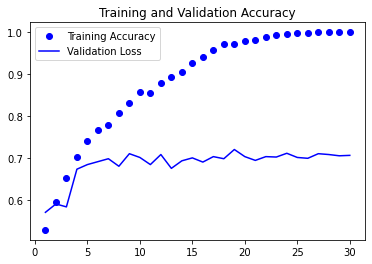

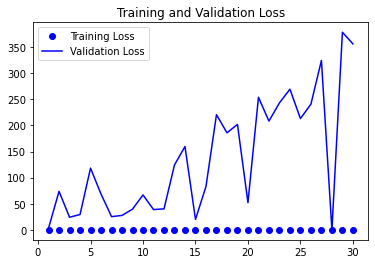

In [30]:
# -----------------------------------------------------
# DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING |
# -----------------------------------------------------

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Plots show overfitting

In [31]:
# ===========================================================================
# C                                                                         |
# Display randomly augmented images(four images of two different cats and   |
# four images of two different dogs)                                        |
# ===========================================================================

In [34]:
# --------------------------------------------------------------------
# SETTING UP A DATA AUGMENTATION CONFIGURATION VIA IMAGEDATAGENERATOR |
# --------------------------------------------------------------------

datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

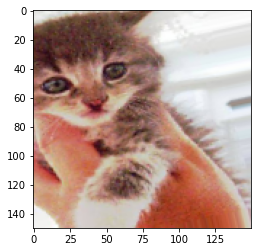

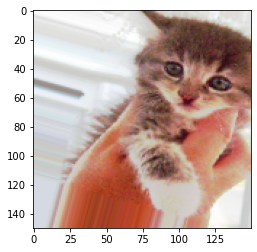

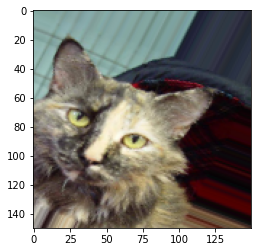

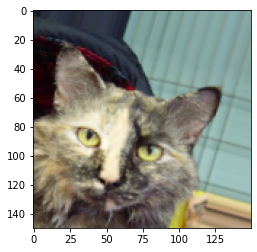

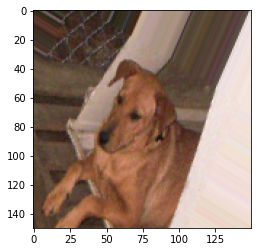

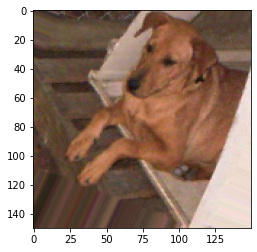

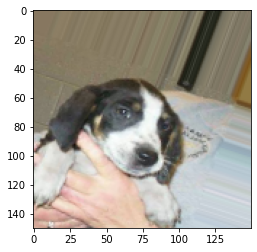

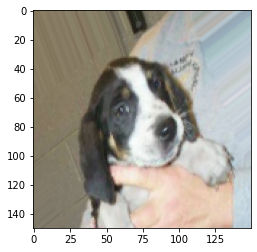

In [70]:
# ----------------------------------------------------
# DISPLAYING SOME RANDOMLY AUGMENTED TRAINGING IMAGES |
# ----------------------------------------------------

# 1st CAT
# ~~~~~~~
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]  # chooses one image augment
img = image.load_img(img_path, target_size=(150, 150))  # reads the image & resizes it

x = image.img_to_array(img)  # converts it to a numpy array with shape(150, 150, 3)

x = x.reshape((1,) + x.shape)  # reshapes it to (1, 150, 150, 3)

# generates batches of randomly transformed images
# loops indefinitely, so you need to break the loop at some point]
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 2 == 0:
        break
        
plt.show()

# 2nd CAT
# ~~~~~~~

img_path2 = fnames[2]
img2 = image.load_img(img_path2, target_size=(150, 150))
x2 = image.img_to_array(img2)
x2 = x2.reshape((1,) + x2.shape)

i = 0
for batch in datagen.flow(x2, batch_size=1):
    plt.figure(i)
    imgplot2 = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 2 == 0:
        break

plt.show()

# 1st DOG
# ~~~~~~~

fnames2 = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]
img_path3 = fnames2[3]
img3 = image.load_img(img_path3, target_size=(150, 150))
x3 = image.img_to_array(img3)
x3 = x3.reshape((1,) + x3.shape)

i = 0
for batch in datagen.flow(x3, batch_size=1):
    plt.figure(i)
    imgplot3 = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 2 == 0:
        break

plt.show()

# 2nd DOG
# ~~~~~~~

img_path4 = fnames2[2]
img4 = image.load_img(img_path4, target_size=(150, 150))
x4 = image.img_to_array(img4)
x4 = x4.reshape((1,) + x4.shape)

i = 0
for batch in datagen.flow(x4, batch_size=1):
    plt.figure(i)
    imgplot4 = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 2 == 0:
        break

plt.show()

In [71]:
# ===========================================================================
# D                                                                         |
# To avoid overfitting add Dropout layer and do the training of your CNN    |
# using data augmentation generators. Plot training and validation accuracy |
# as well as training and validation loss                                   |
# ===========================================================================

In [73]:
# ---------------------------------------------
# DEFINING A NEW CONVNET THAT INCLUDES DROPOUT |
# ---------------------------------------------

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Dropout for regularization
# Dropout randomly drops some layers in a neural networks and then learns with the reduced network
# The network learns to be independent and not reliable on a single layer
# Helps with overfitting
# .05 means to randomly drop half of the layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [77]:
# --------------------------------------------------------
# TRAINING THE CONVNET USING DATA-AUGMENTATION GENERATORS |
# --------------------------------------------------------

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)  # not augmented

train_generator = train_datagen.flow_from_directory(train_dir,  # target directory
                                                  target_size=(150, 150),  # resizes all images to 150x150
                                                  batch_size=32,
                                                  class_mode='binary')

valdiation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=32,
                                                       class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 208s 2s/step - loss: 0.6914 - acc: 0.5303 - val_loss: 12.1340 - val_acc: 0.5900
Epoch 2/100
100/100 [==============================] - 214s 2s/step - loss: 0.6754 - acc: 0.5663 - val_loss: 72.1128 - val_acc: 0.5490
Epoch 3/100
100/100 [==============================] - 204s 2s/step - loss: 0.6642 - acc: 0.5891 - val_loss: 92.5164 - val_acc: 0.5020
Epoch 4/100
100/100 [==============================] - 236s 2s/step - loss: 0.6479 - acc: 0.6136 - val_loss: 60.8748 - val_acc: 0.5930
Epoch 5/100
100/100 [==============================] - 251s 3s/step - loss: 0.6263 - acc: 0.6487 - val_loss: 208.2860 - val_acc: 0.5190
Epoch 6/100
100/100 [==============================] - 232s 2s/step - loss: 0.6142 - acc: 0.6616 - val_loss: 12.0749 - val_acc: 0.5910
Epoch 7/100
100/100 [==============================] - 232s 2s/step - loss: 0.6074 - acc: 0.6731 - val_lo

In [78]:
model.save('cats_and_dogs_small_2.h5')

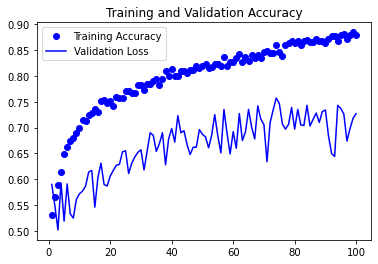

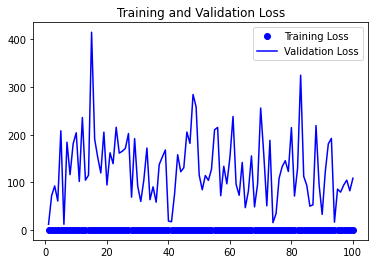

In [79]:
# -----------------------------------------------------
# DISPLAYING CURVES OF LOSS & ACCURACY DURING TRAINING |
# -----------------------------------------------------

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [80]:
# -------------------------------------
# VISUALIZING INTERMEDIATE ACTIVATIONS |
# -------------------------------------

model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [86]:
# --------------------------
# PROCESSING A SINGLE IMAGE |
# --------------------------

img_path = './Downloads/dogs_vs_cats_small_dataset/test/cats/cat.1700.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # the model was trained on inputs that were preprocessed this way

print(img_tensor.shape)

(1, 150, 150, 3)


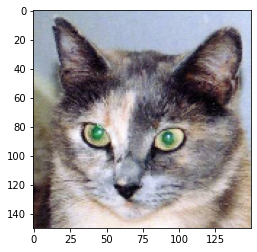

In [87]:
# ----------------------------
# DISPLAYING THE TEST PICTURE |
# ----------------------------

plt.imshow(img_tensor[0])
plt.show()

In [90]:
# Instantiaing a model from an input tensor and a list of output tensors

# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]
# creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [91]:
# Running the model in predict mode

# returns a lsit of 5 numpy arrays: 1 array per layer activations
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


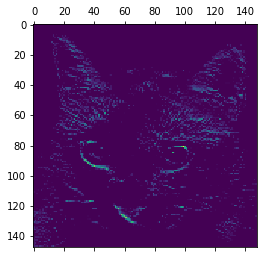

In [92]:
# Visualizing the fourth channel

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

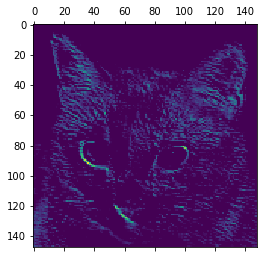

In [93]:
# Visualizing the seventh channel

plt.matshow(first_layer_activation [0, :, :, 7], cmap='viridis')

In [94]:
# ===========================================================================
# E                                                                         |
# Visualize every channel in every intermediate activations and explain why |
# it is useful                                                              |
# ===========================================================================

In [95]:
# -------------------------
# EXPLAIN WHY IT IS USEFUL |
# -------------------------

#"Intermediate activations are useful for understanding how successive
# convnet layers transform their input, and for getting a first idea of the
# meaning of indivisual convnet filters.
# Visualizing intermediate ativations consists of displaying th feature maps
# that are output by various convolution and pooling layers in a network, 
# given a certain output. This gives a view into how an input is decomposed
# into different filters learned by the network. Each channel encodes
# relatively independent features, so the proper way to visualize these
# feature maps is by indepently plotting the conetnes of every channel as a
# 2D image" - Francois Chollet "DEEP LEARNING with Python"

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


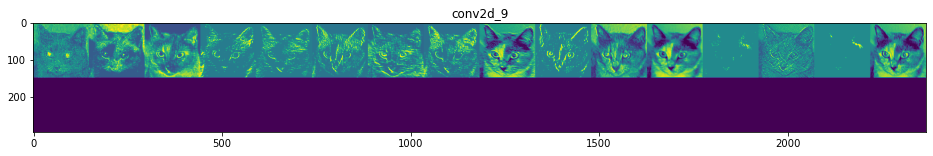

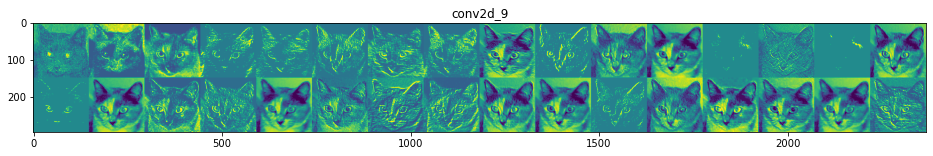

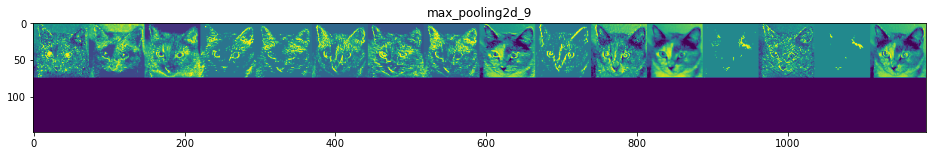

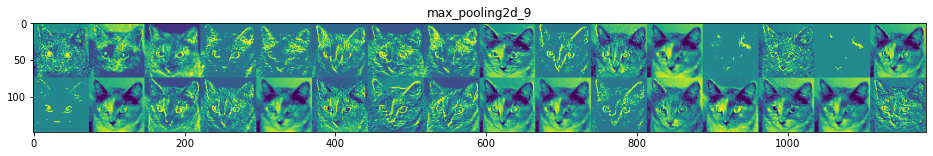

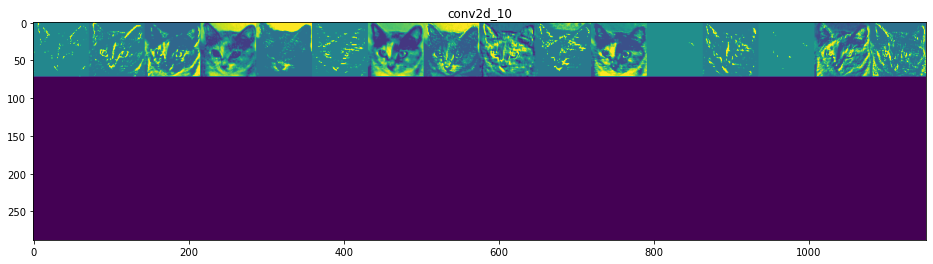

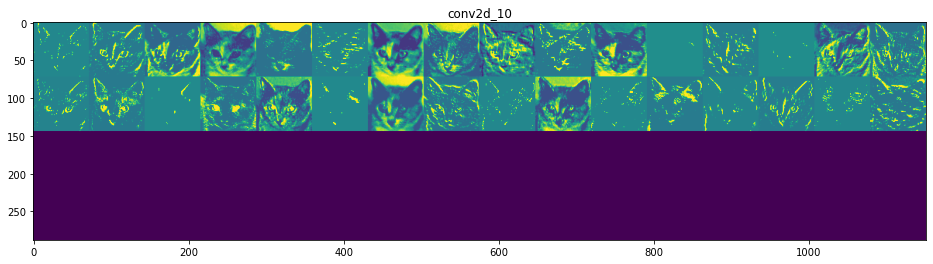

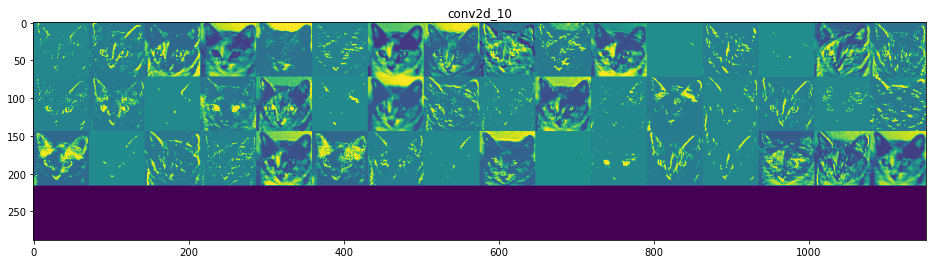

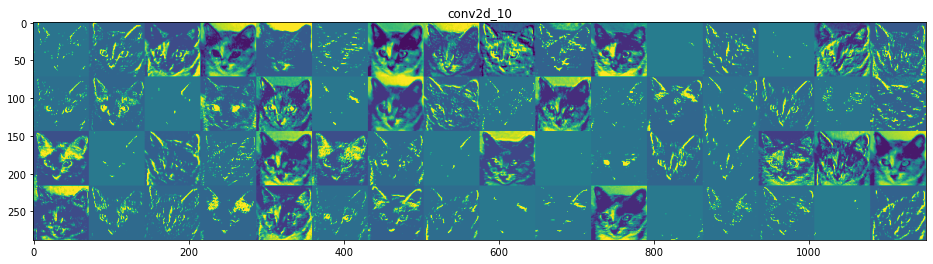

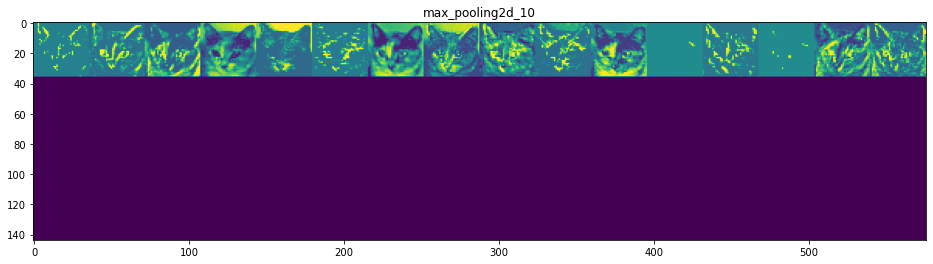

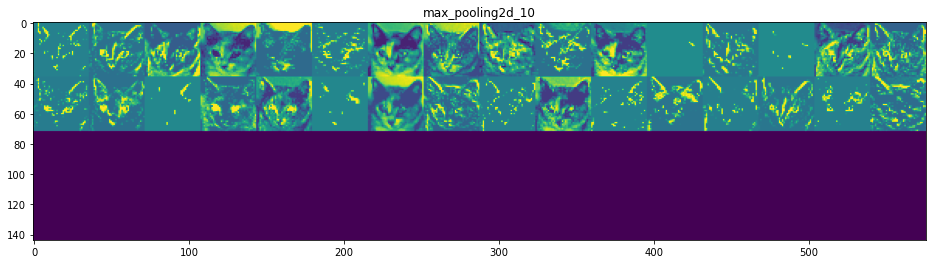

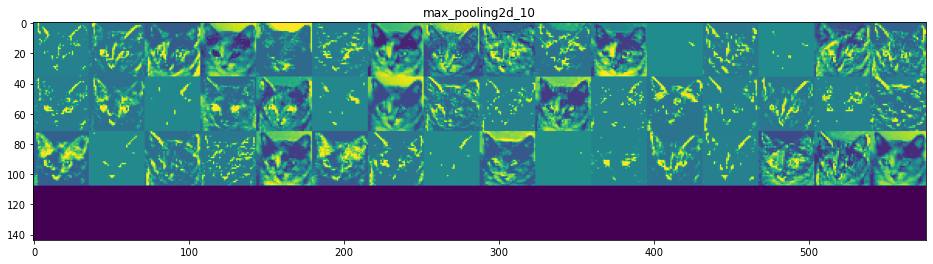

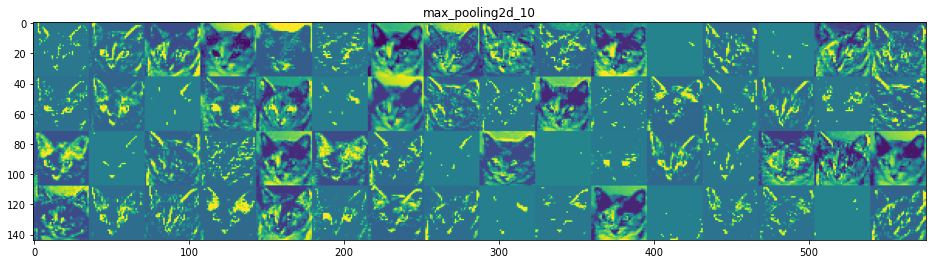

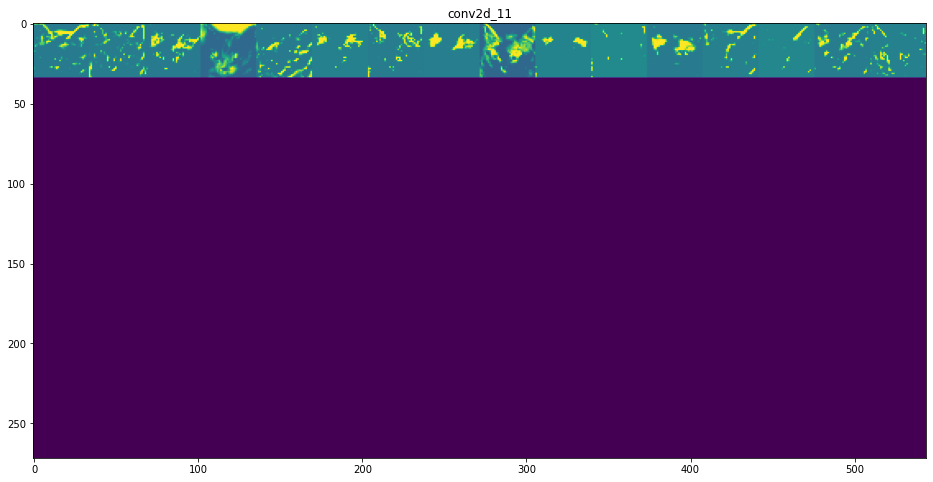

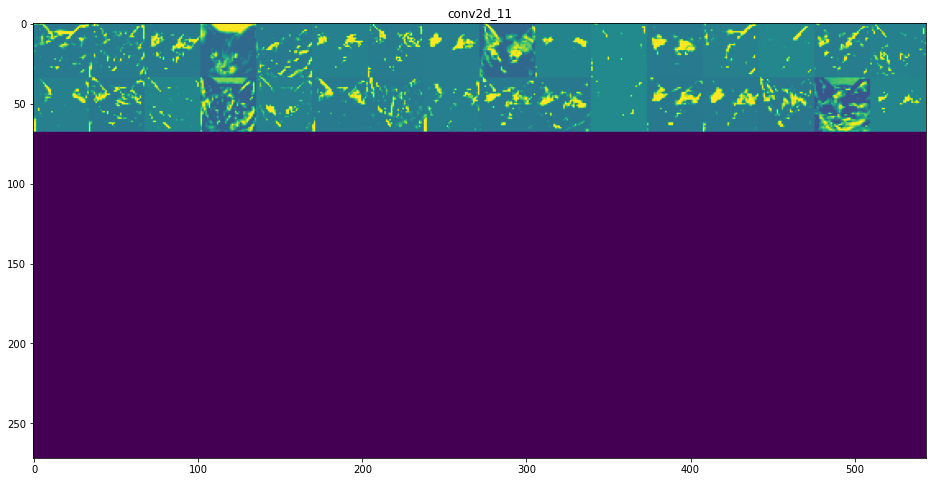

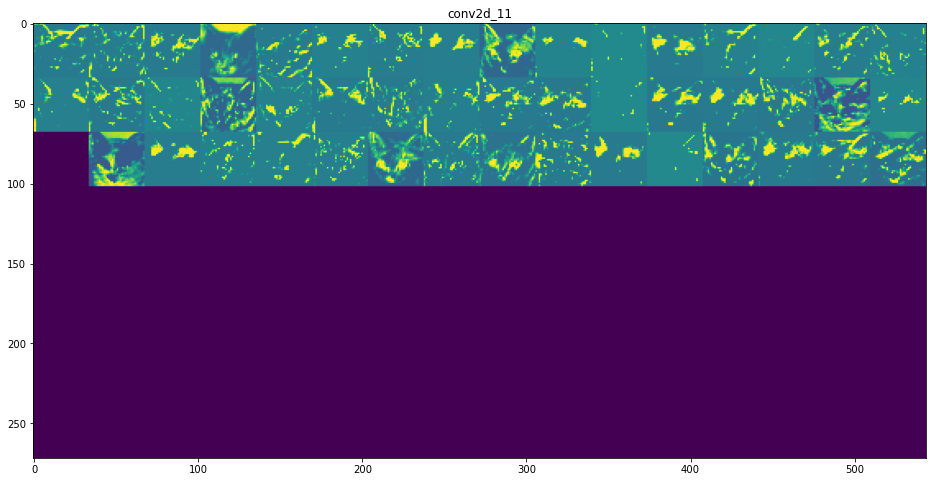

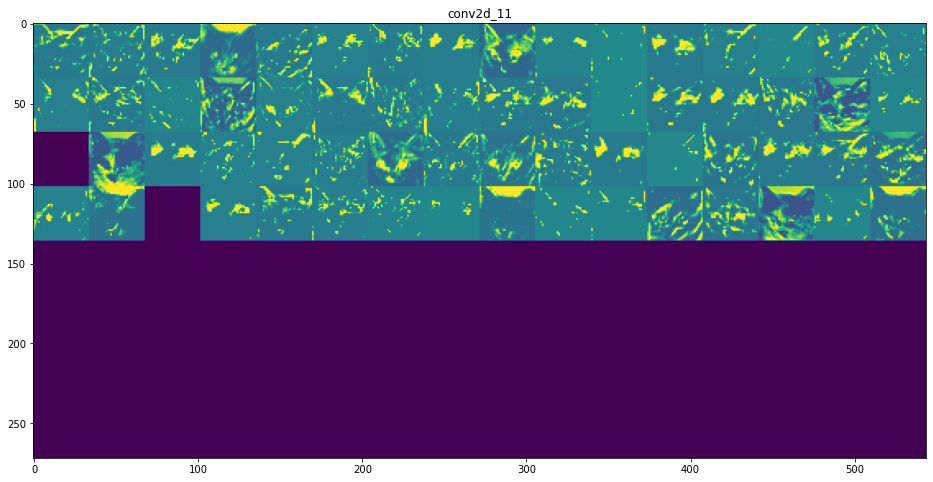

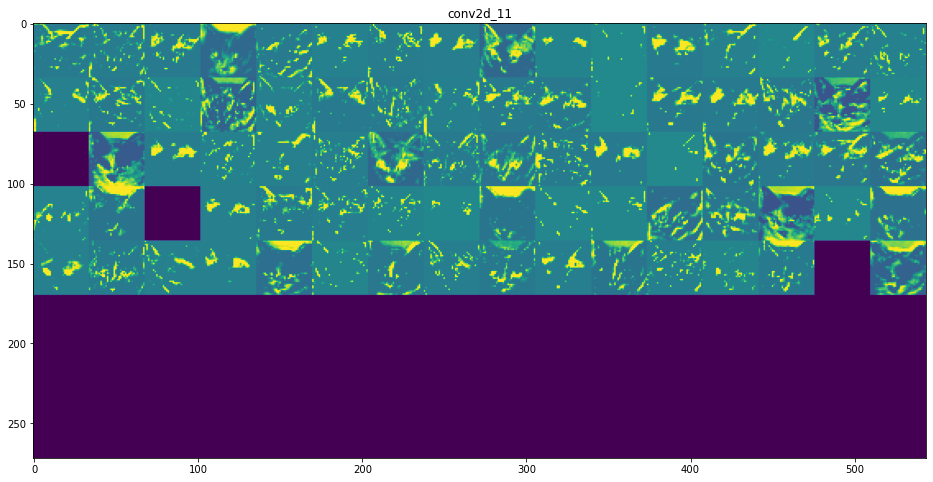

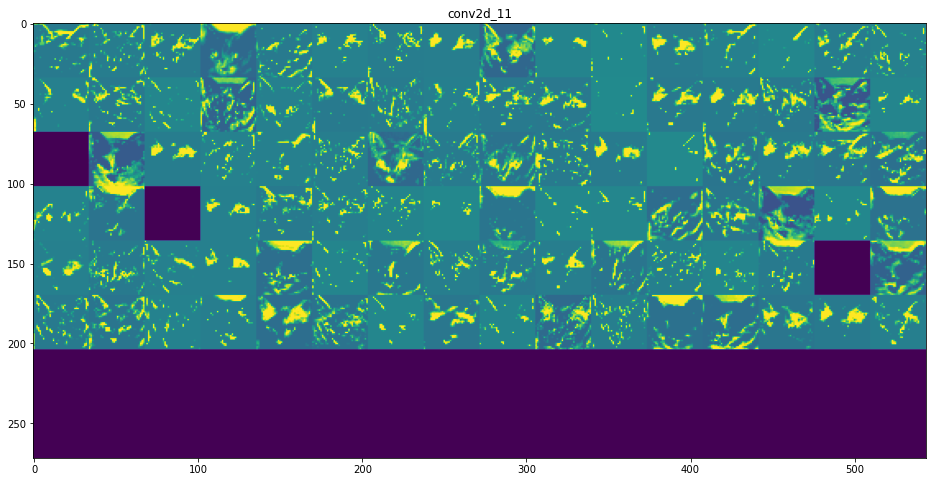

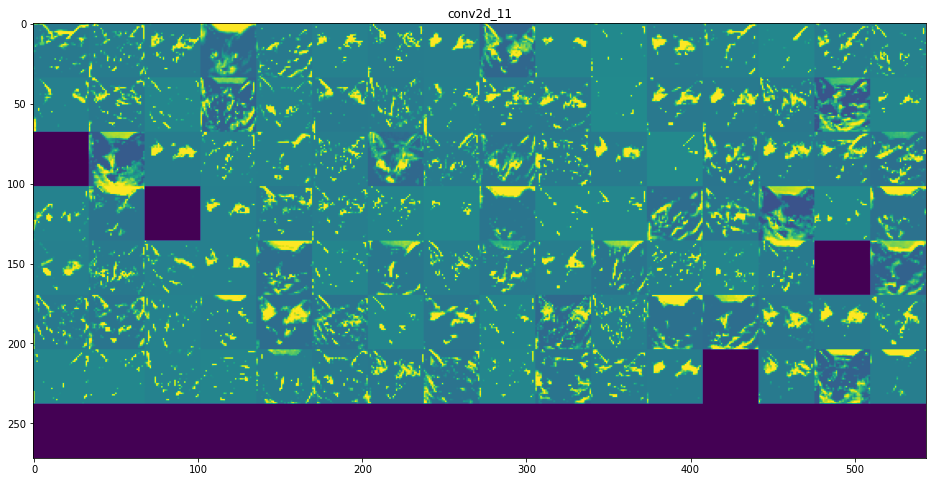

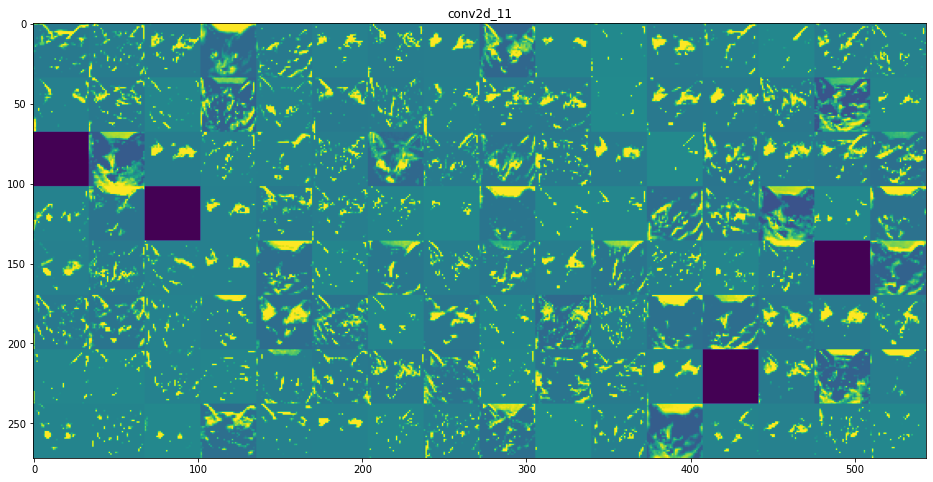

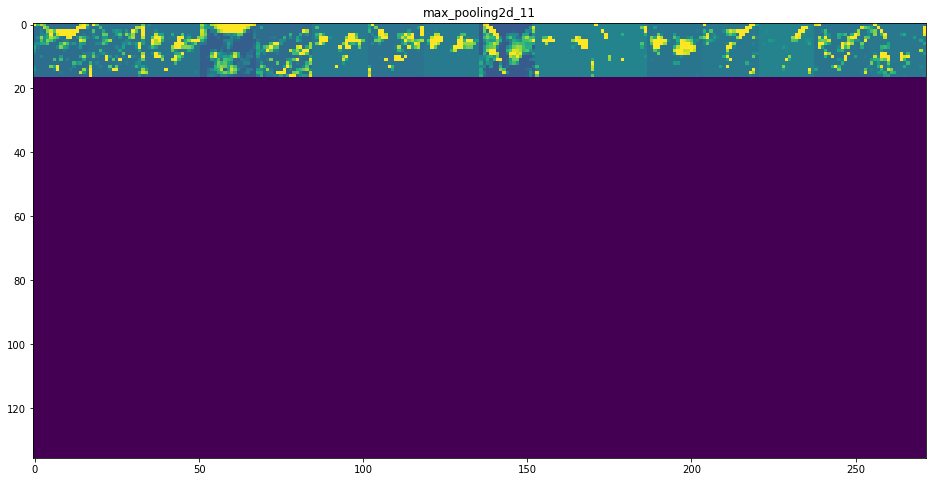

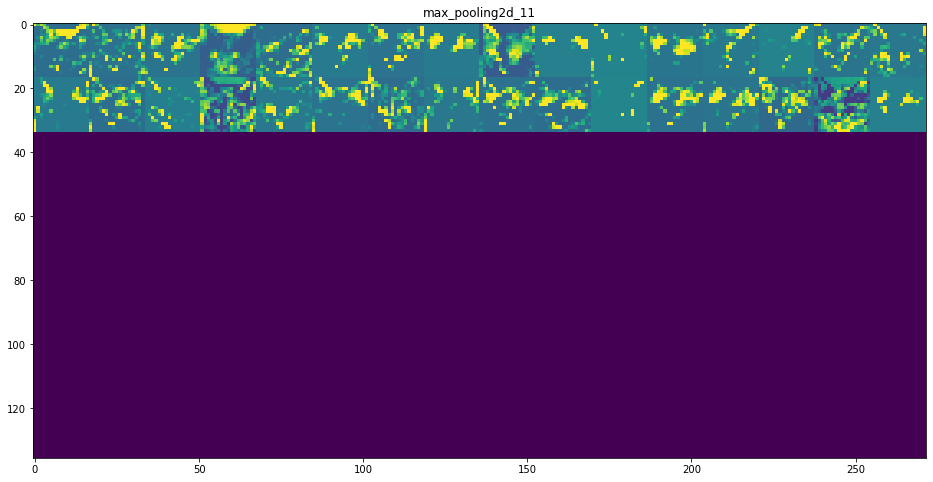

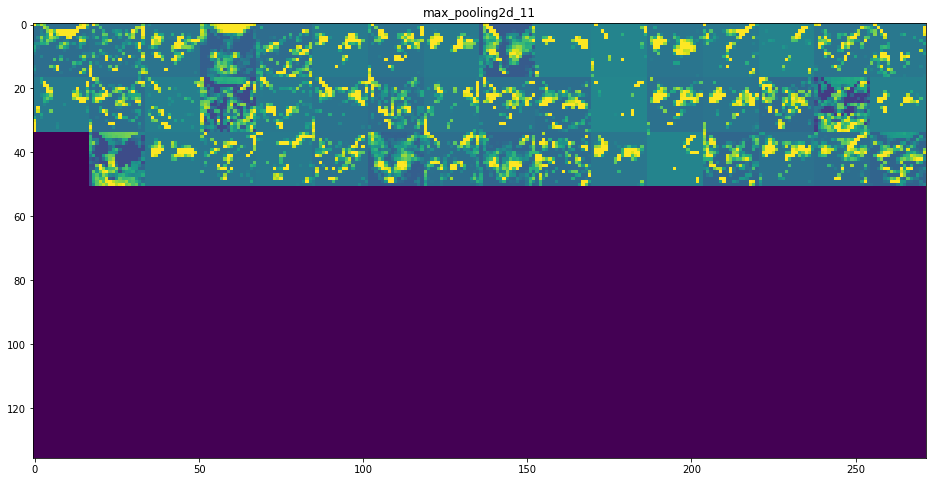

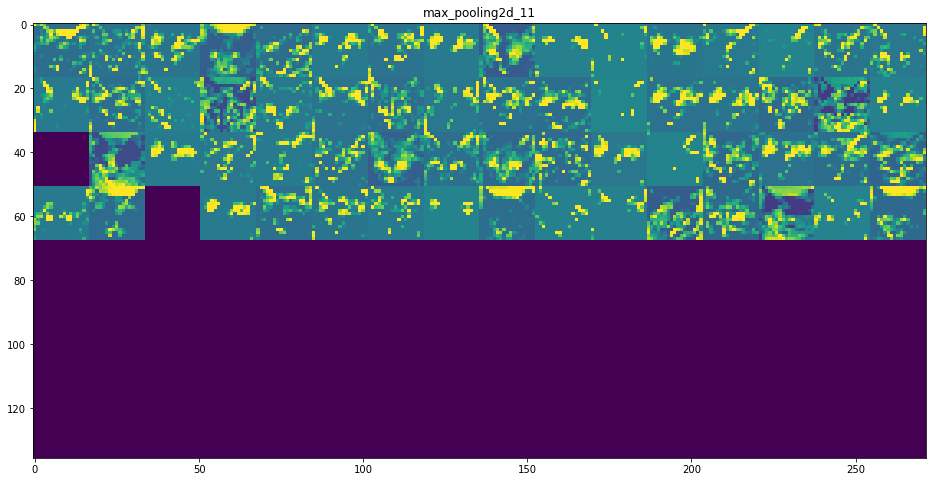

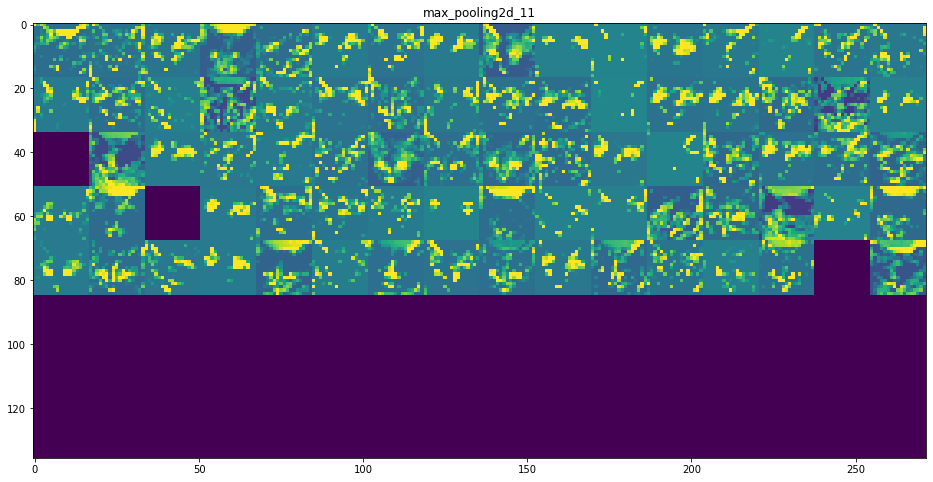

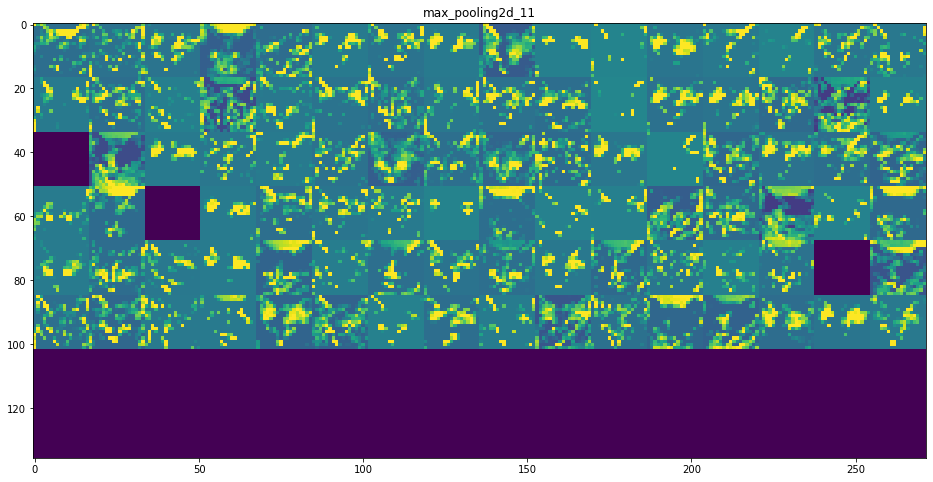

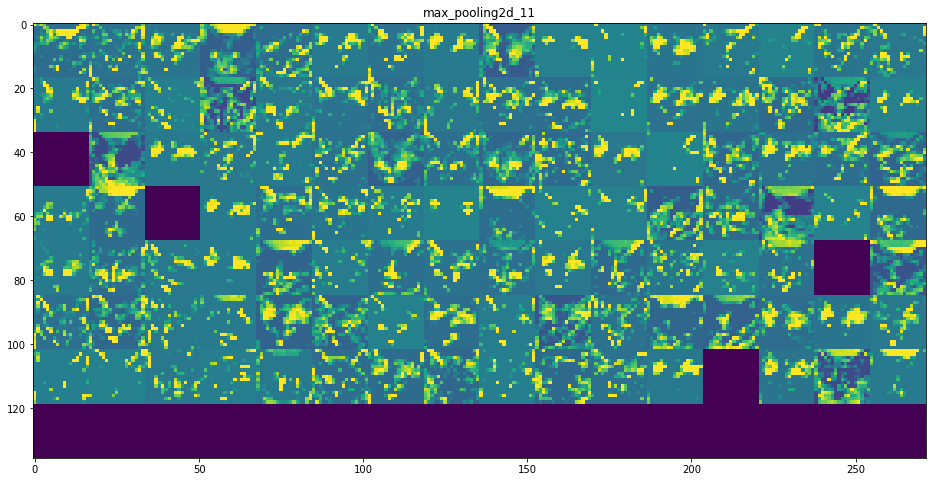

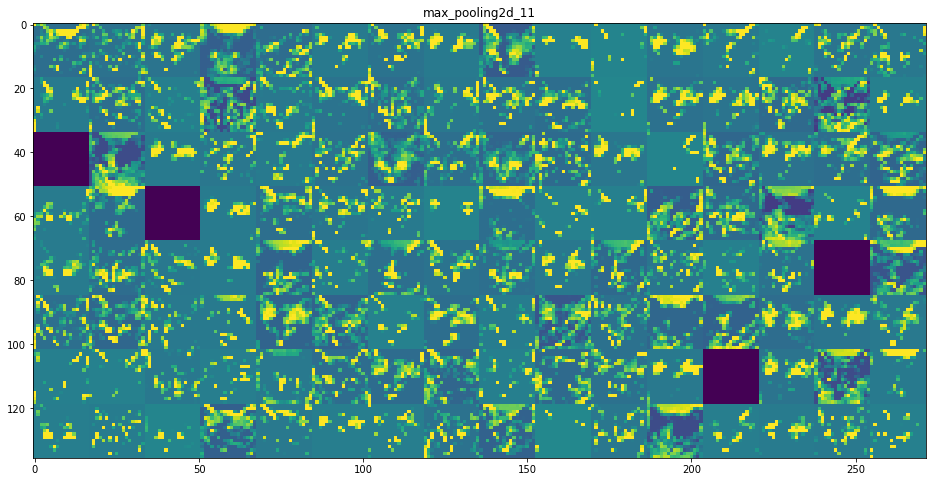

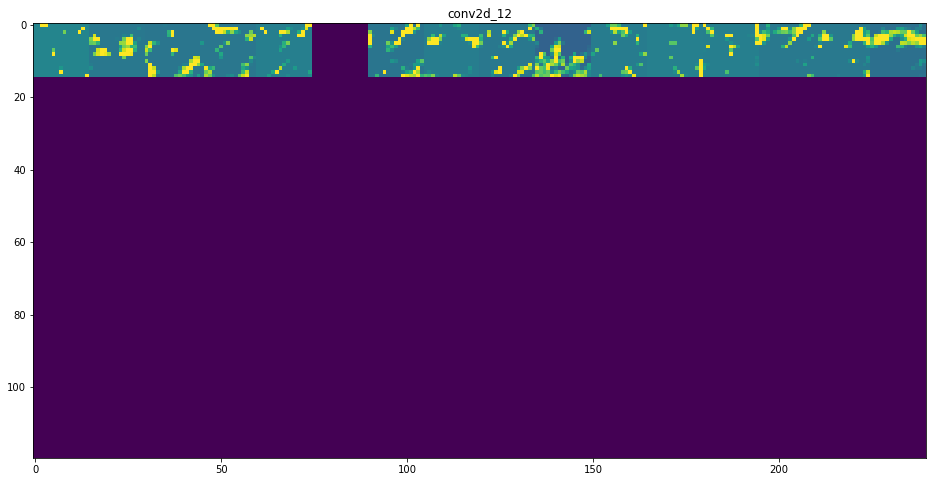

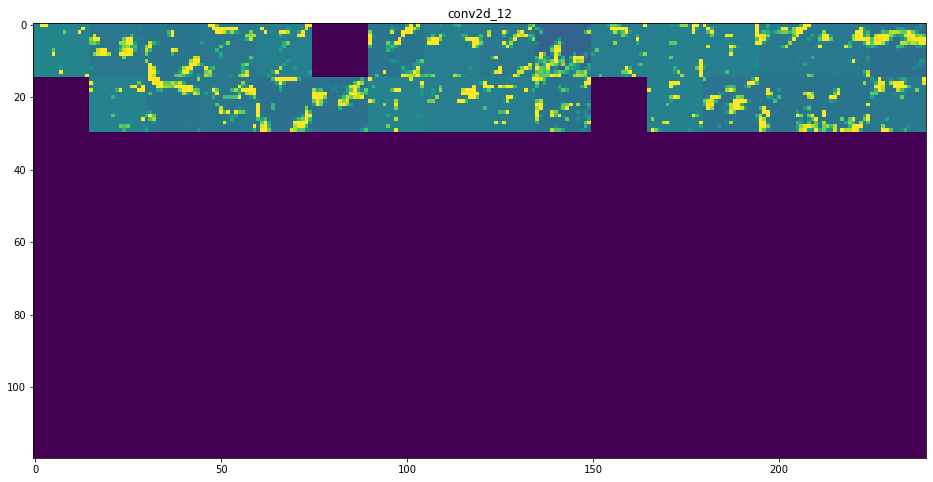

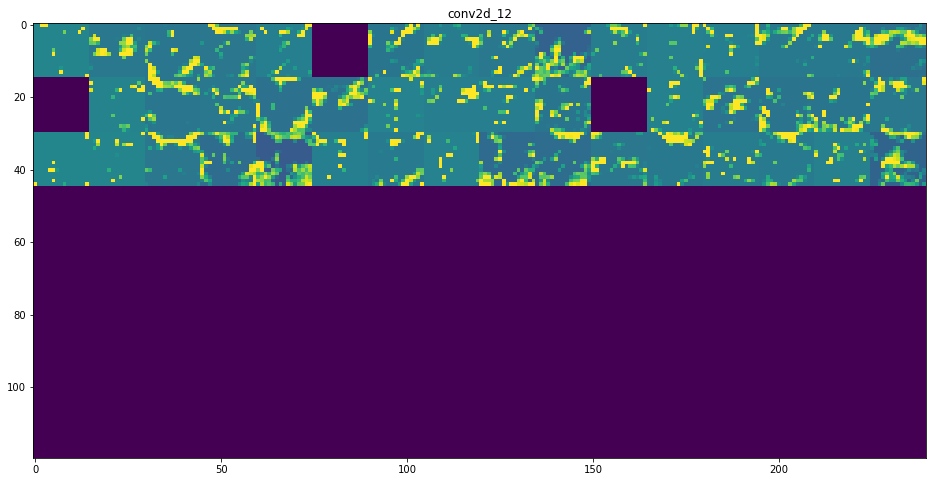

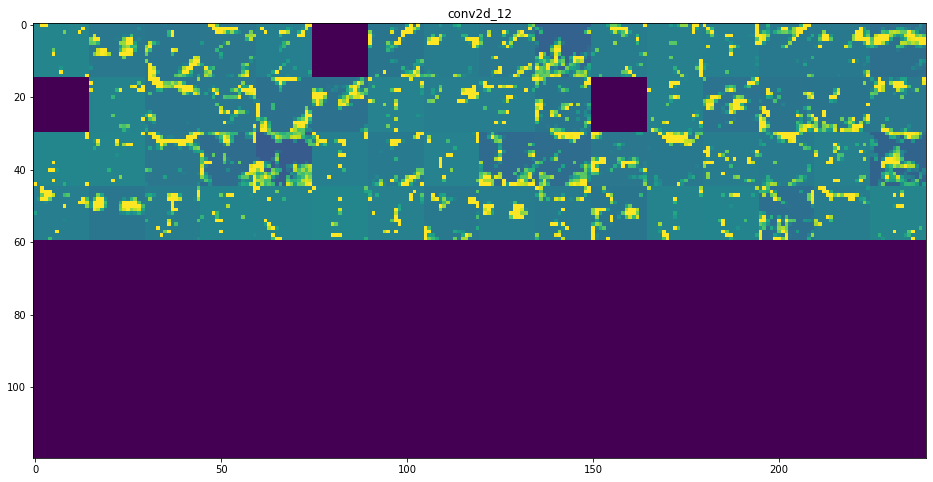

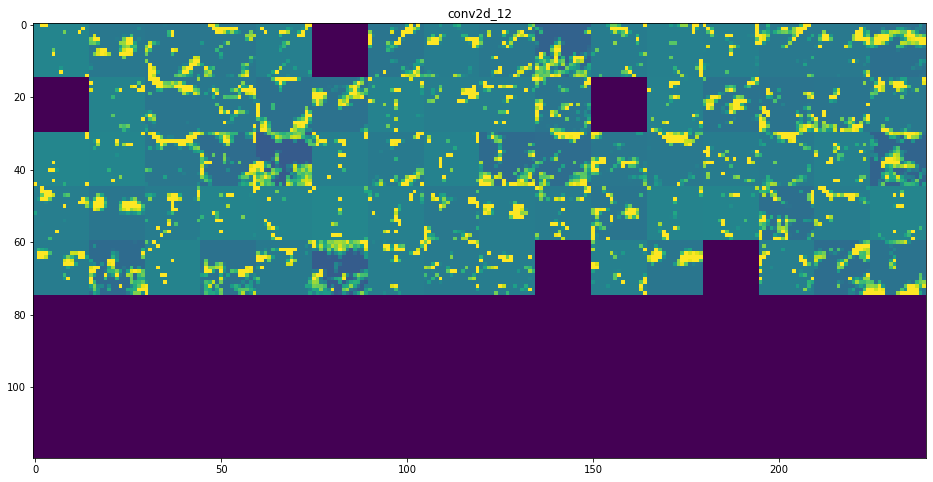

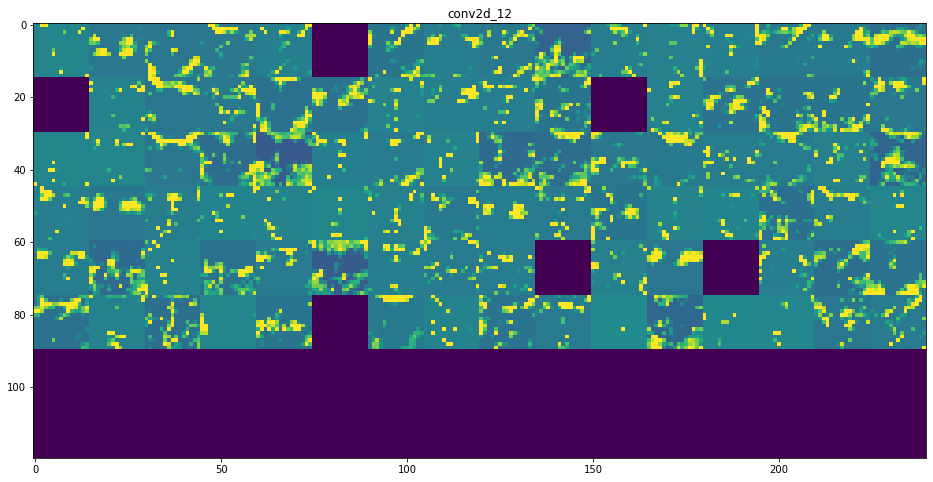

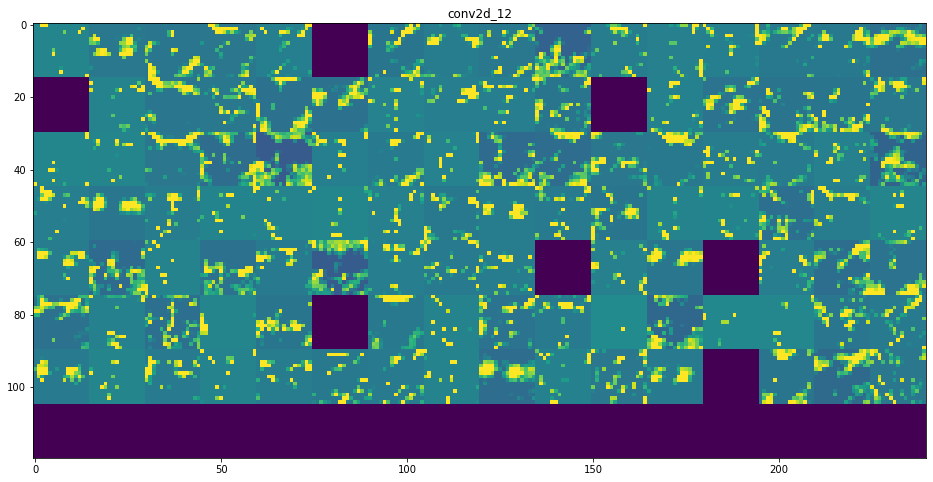

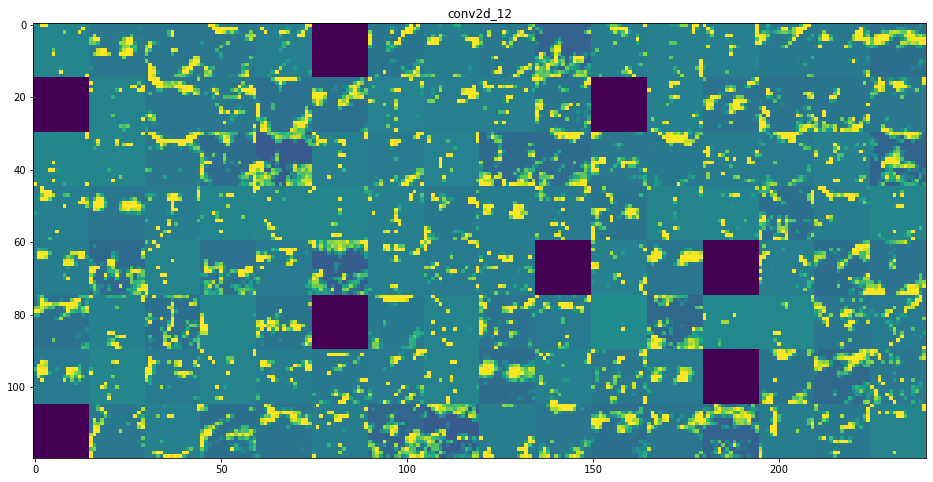

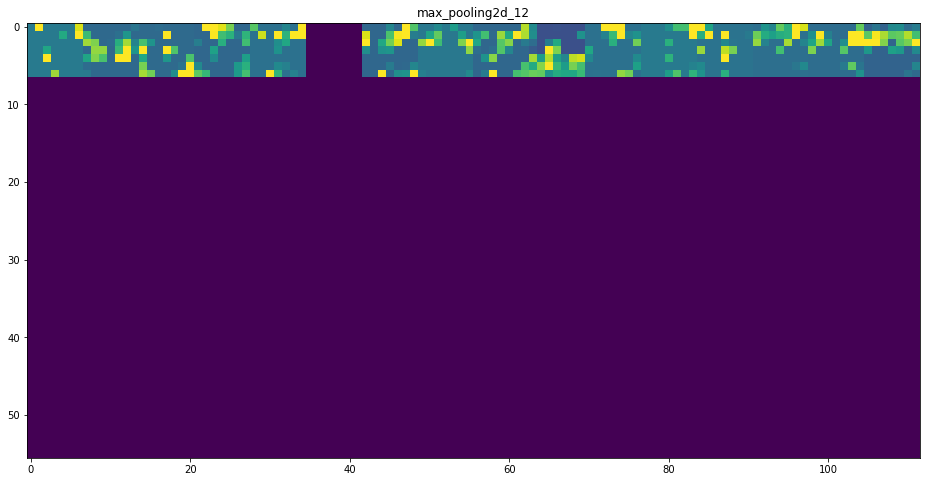

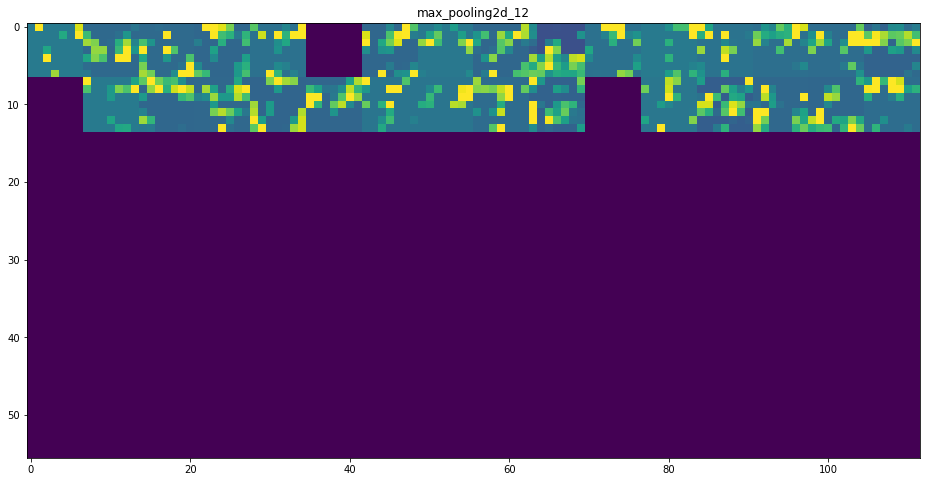

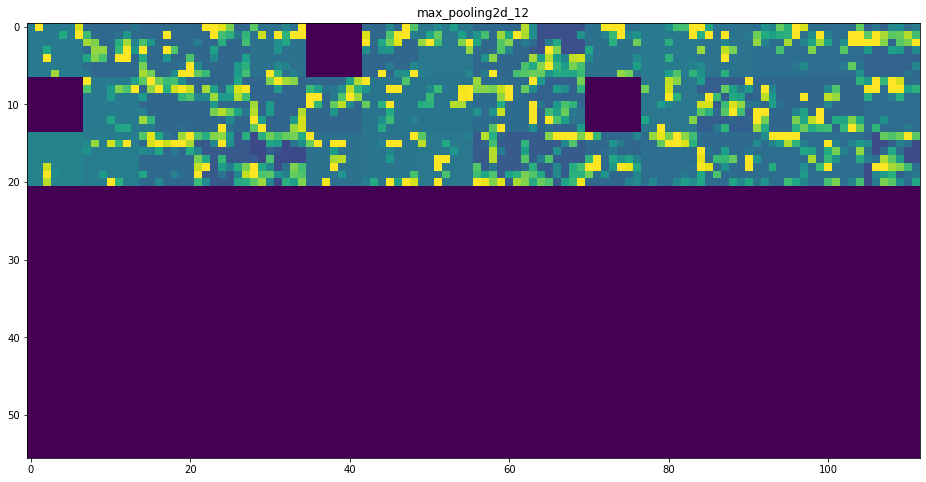

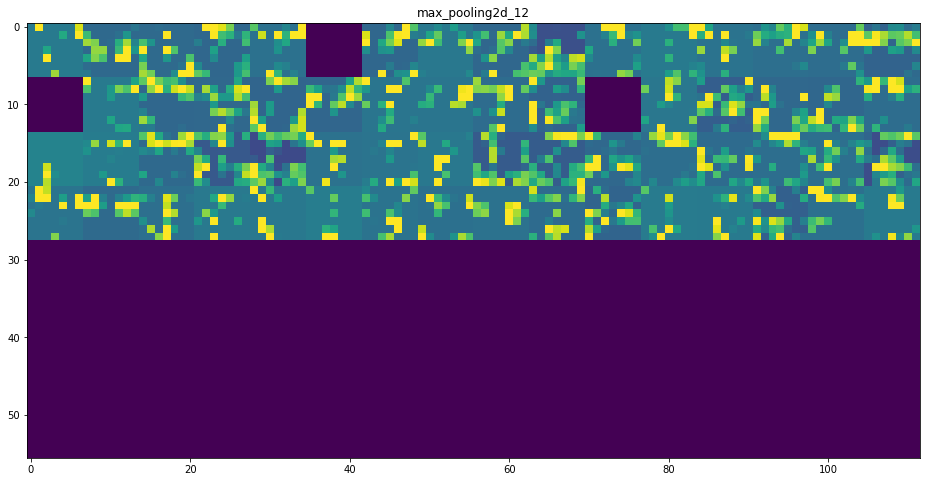

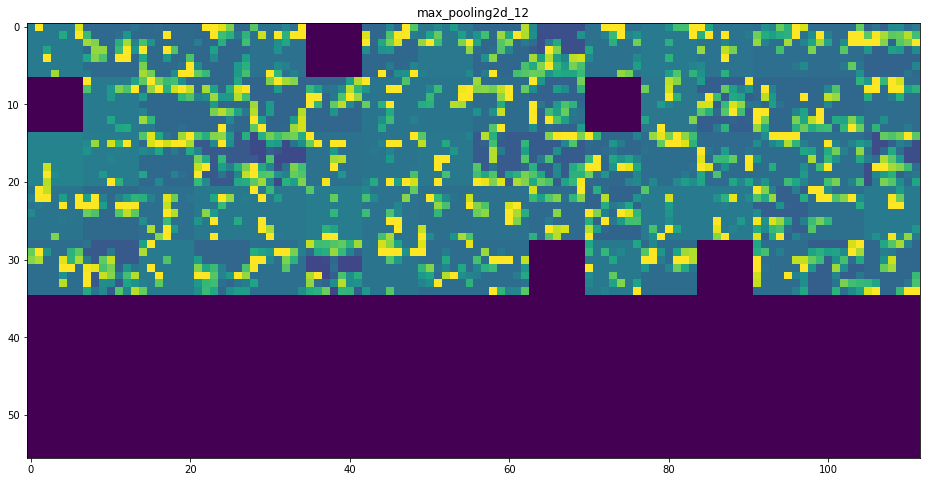

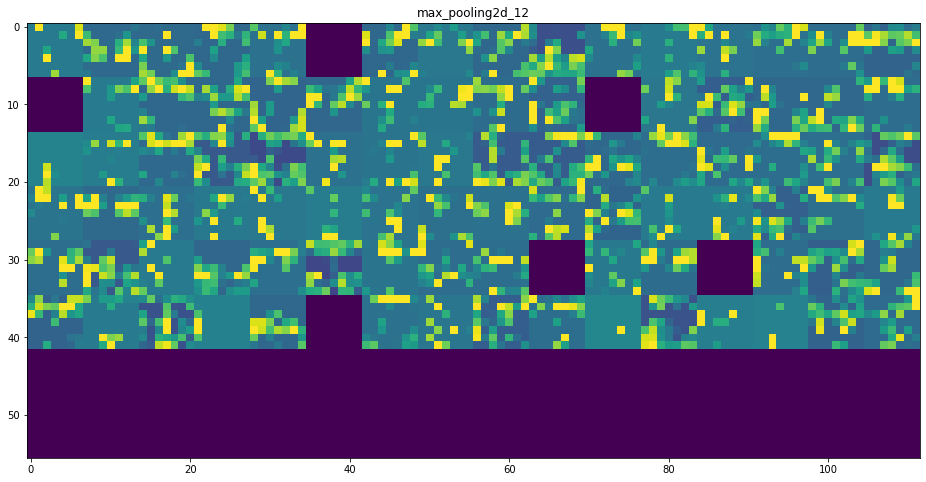

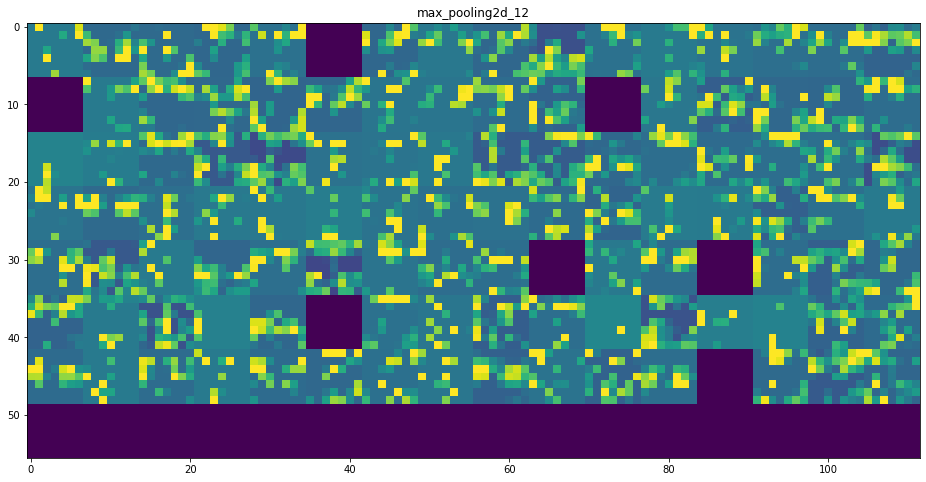

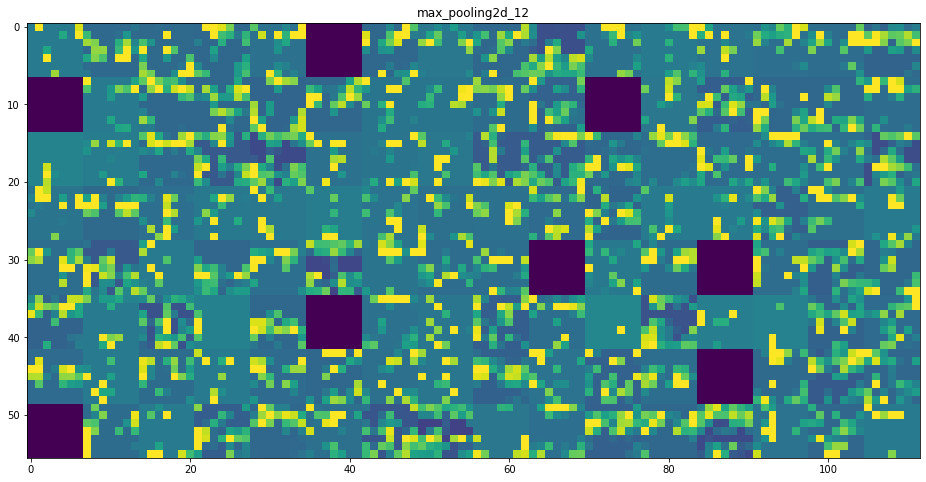

In [99]:
# -----------------------------------------------------------
# VISUALIZING EVERY CHANNEL IN EVERY INTERMEDIATE ACTIVATION |
# -----------------------------------------------------------

# Names of the layers so you can have them as part of your plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16  # displays the feature maps

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]  # number of features in the feature map
    
    size = layer_activation.shape[1]  # has shape (l, size, size, n_features)
    
    n_cols = n_features // images_per_row  # tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):  # tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()  # post processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,  # displays the grid
                         row * size : (row + 1) * size] = channel_image
        
        scale = 1./size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [104]:
# =============================================================================
# F                                                                           |
# Visualize convolutional filters: get the gradient of the loss with regard   |
# to the input, apply stochastic gradient descent, include a code for filter  |
# visualization and generate a grid of all filter response patterns in a layer|
# =============================================================================

In [103]:
# ----------------------------------------------------
# DEFINING THE LOSS TENSOR FOR FILTER VISUALATIZATION |
# ----------------------------------------------------

model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [105]:
# ------------------------------------------------------------
# OBTAINING THE GRADIENT OF THE LOSS WITH REGARD TO THE INPUT |
# ------------------------------------------------------------

grads = K.gradients(loss, model.input)[0]  
# the call to gradients returns a list of tensors (of size 1 in this case)
# keeps only the 1st elements which is a tensor

In [106]:
# -----------------------------
# GRADIENT-NORMALIZATION TRICK |
# -----------------------------

grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
# add 1e-5 before dividing to avoid accidentally dividing by 0

In [107]:
# ------------------------------------------------------
# FETCHING NUMPY OUTPUT VALUES GIVEN NUMPY INPUT VALUES |
# ------------------------------------------------------

iterate = K.function([model.input], [loss, grads])

loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [109]:
# --------------------------------------------------
# LOSS MAXIMIZATION VIA STOCHASTIC GRADIENT DESCENT |
# --------------------------------------------------

input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
# starts from a grey image with some noise

step = 1.  # magnitude of each gradient update
for i in range(40):  # runs gradient ascent for 40 steps
    loss_value, grads_value = iterate([input_img_data])
    # computes the loss value and gradient value
    
    input_img_data += grads_value * step
    # adjusts the input image in the direction that maximizes the loss

In [110]:
# --------------------------------------------------------
# UTILITY FUNCTION TO CONVERT A TENSOR INTO A VALID IMAGE |
# --------------------------------------------------------

def deprocess_image(x):
    # Normalizes the tensorL centers on 0, ensure that std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    # Clips to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    
    # Converts to an RBG array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

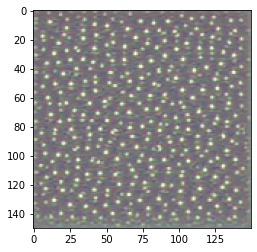

In [112]:
# -------------------------------------------
# FUNCTION TO GENERATE FILTER VISUALIZATIONS |
# -------------------------------------------

def generate_pattern(layer_name, filter_index, size=150):
    # Builds a loss function that maximizes that activation of the nth
    # filter of the layer under consideration
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    # Computes the gradient of the input picture with regard to this loss
    grads = K.gradients(loss, model.input)[0]
    
    # Normalization trickL normalizes the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    # Returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # Starts from a grey image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128
    
    # Runs gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

plt.imshow(generate_pattern('block3_conv1', 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

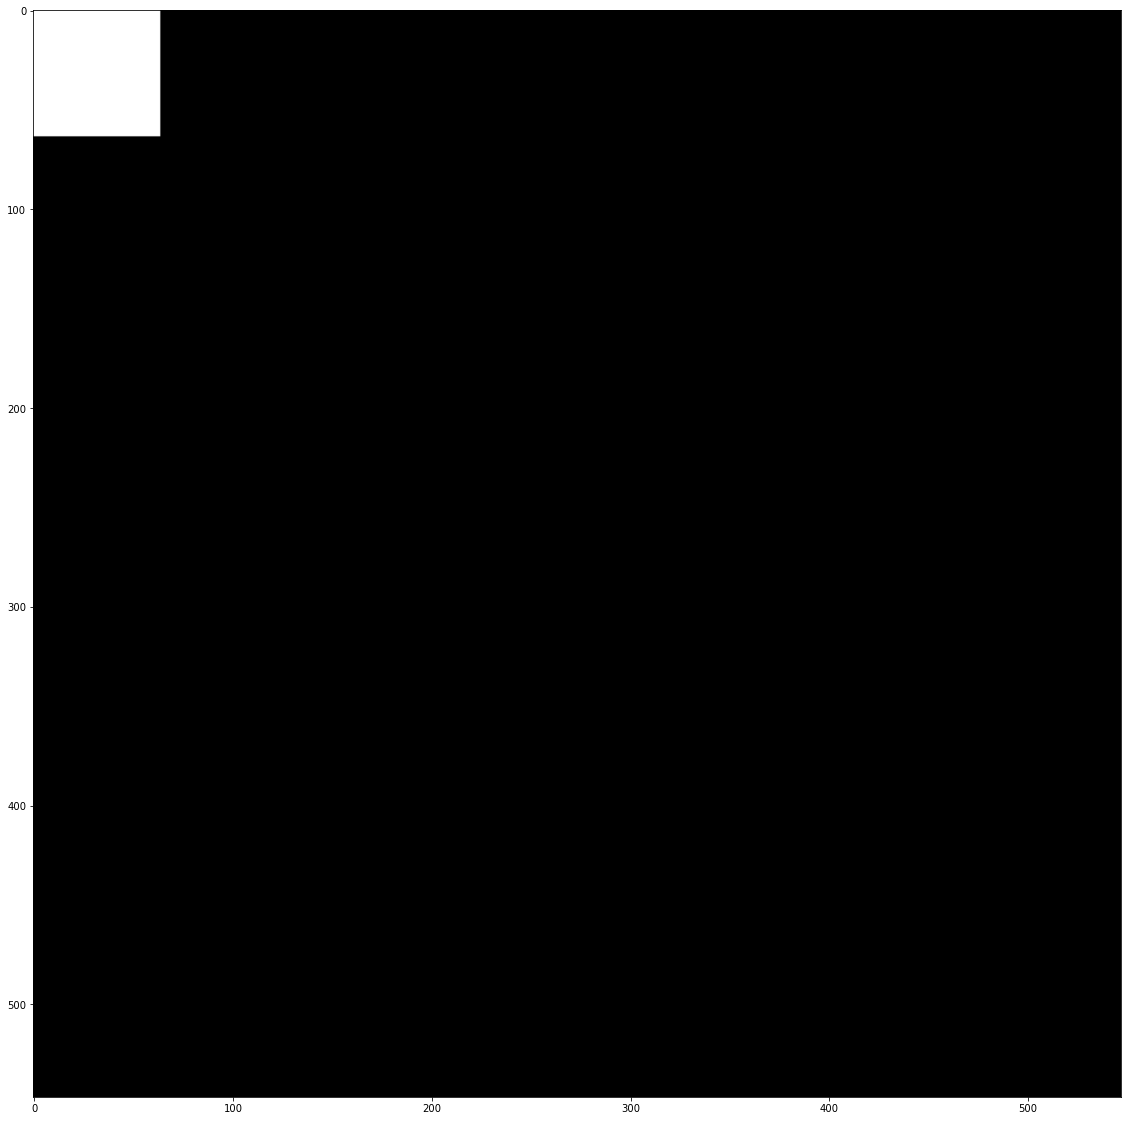

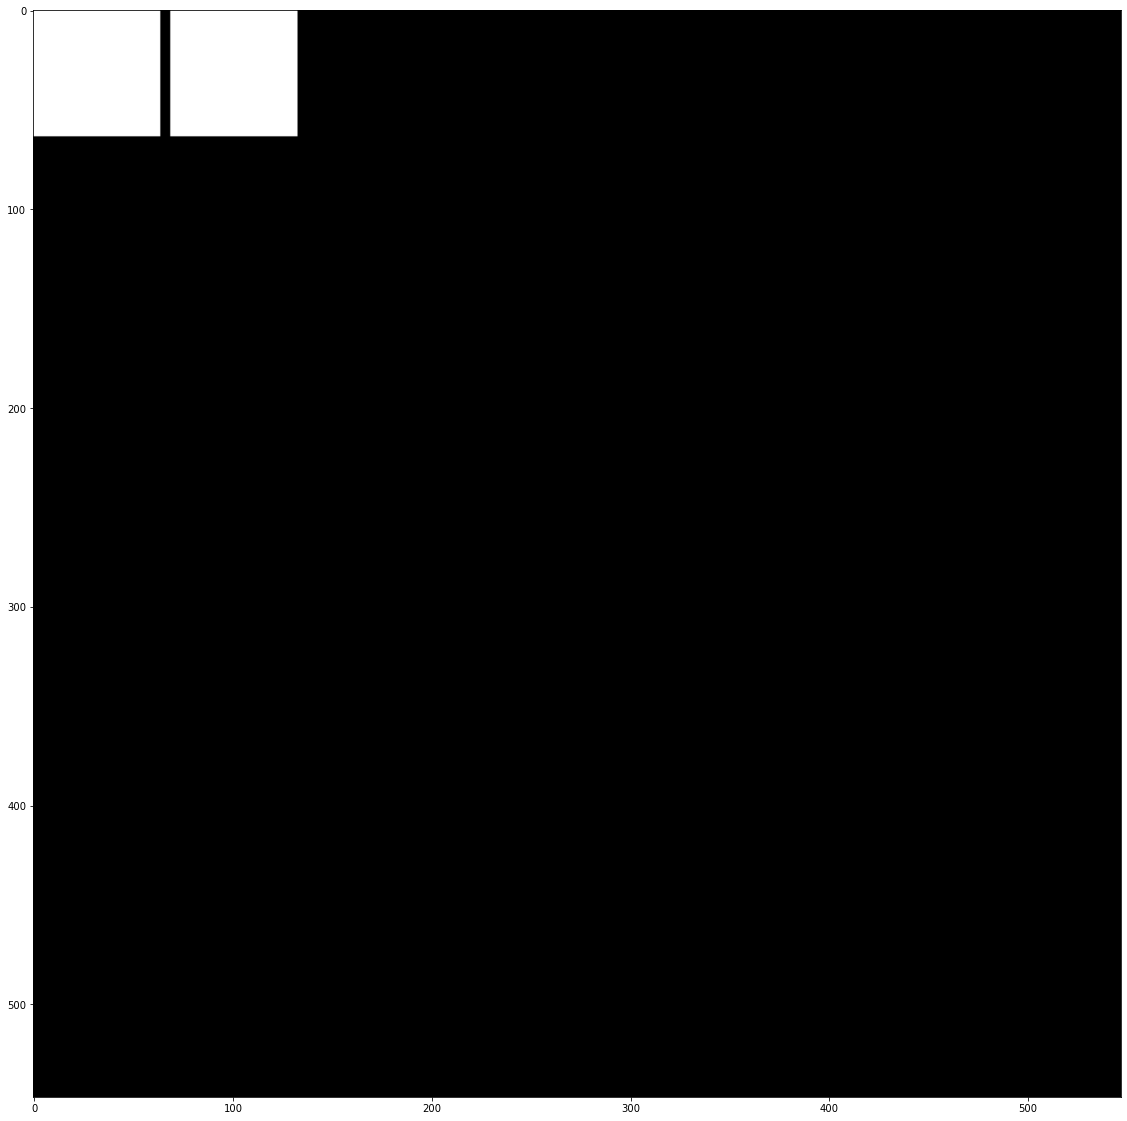

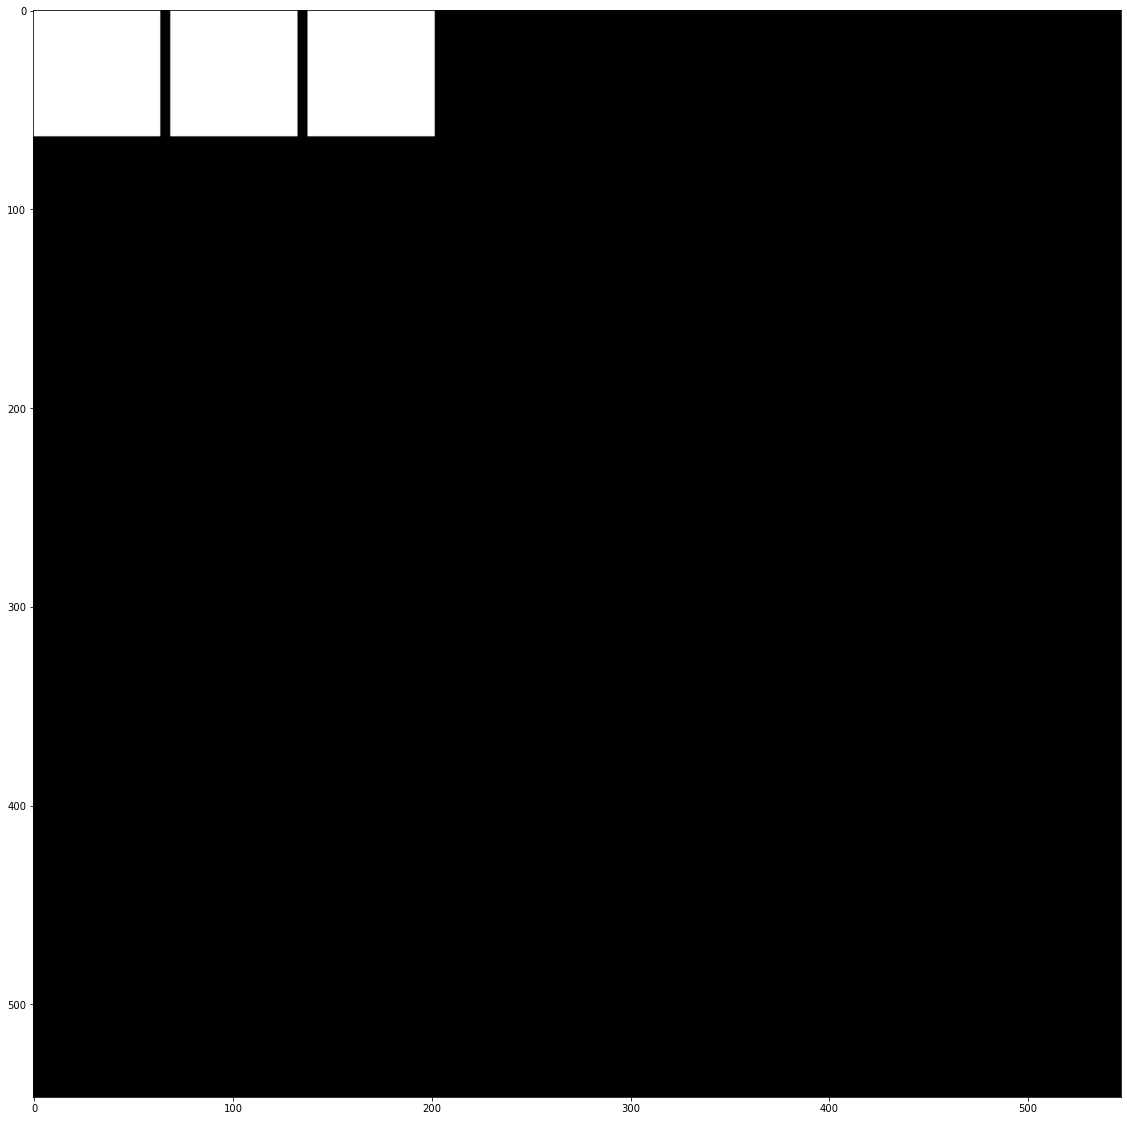

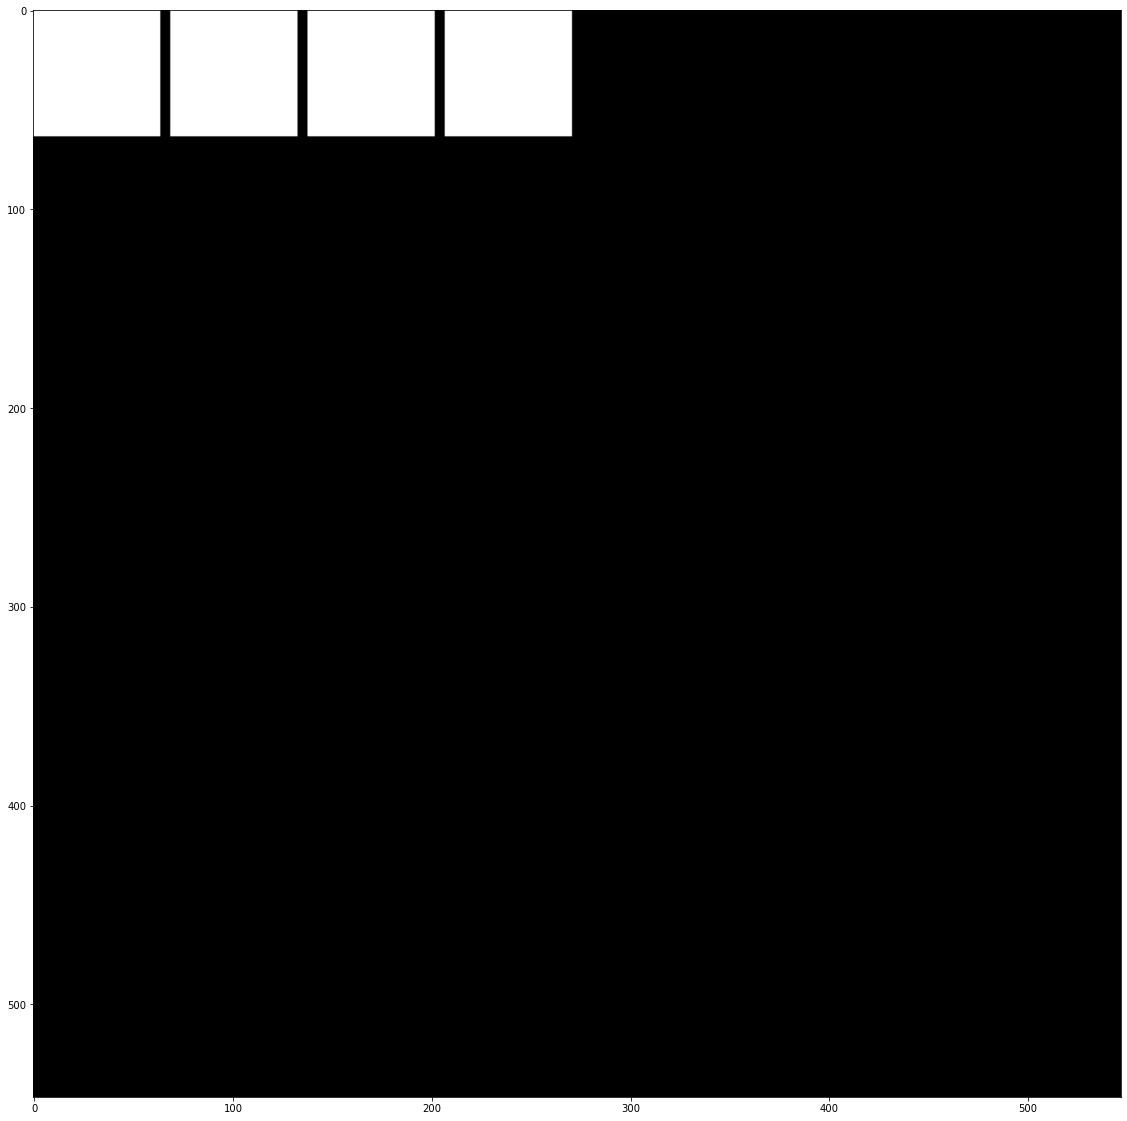

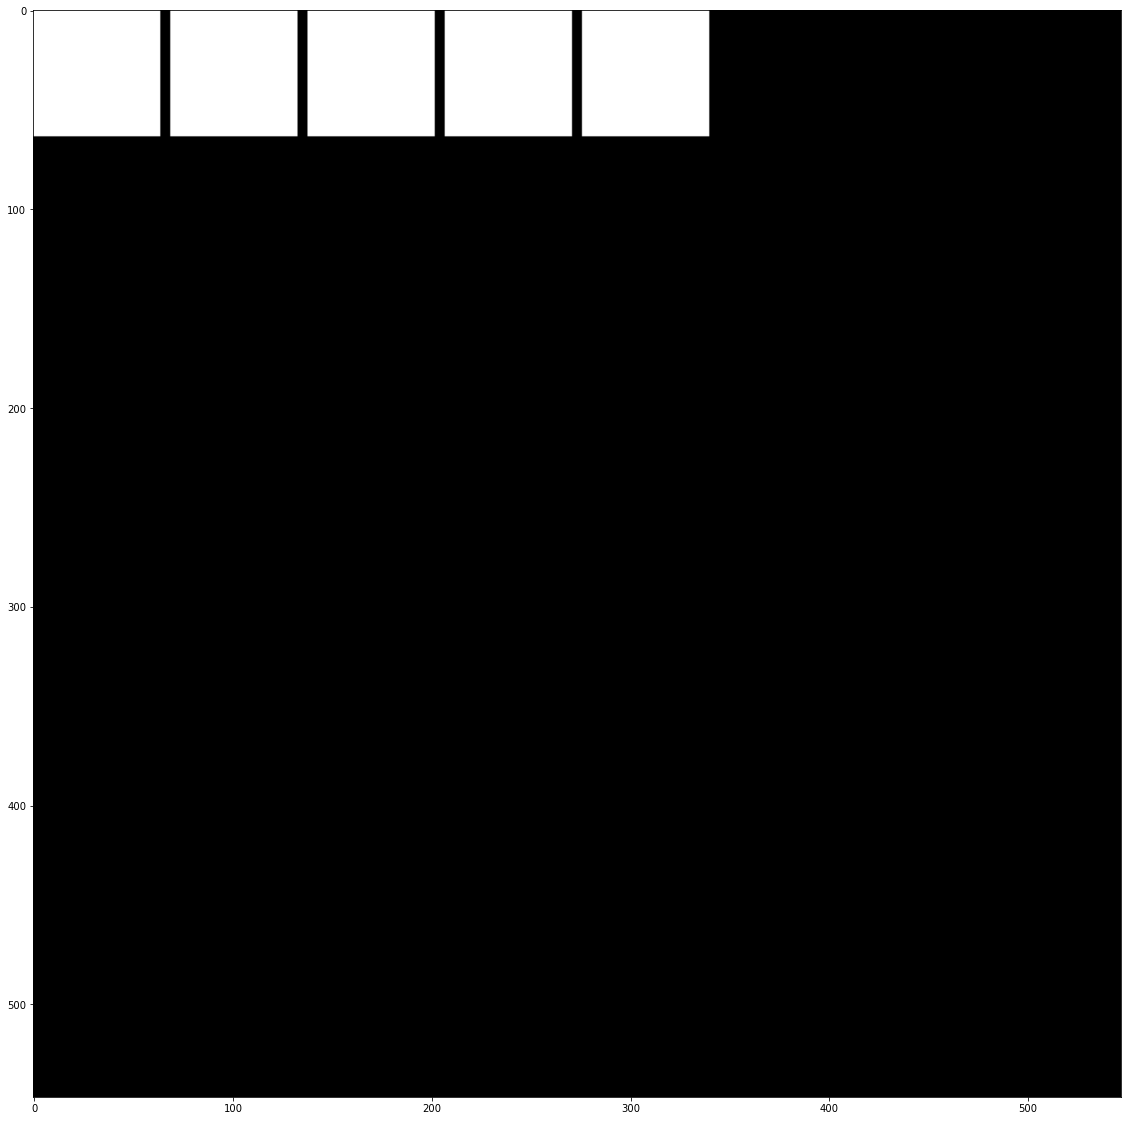

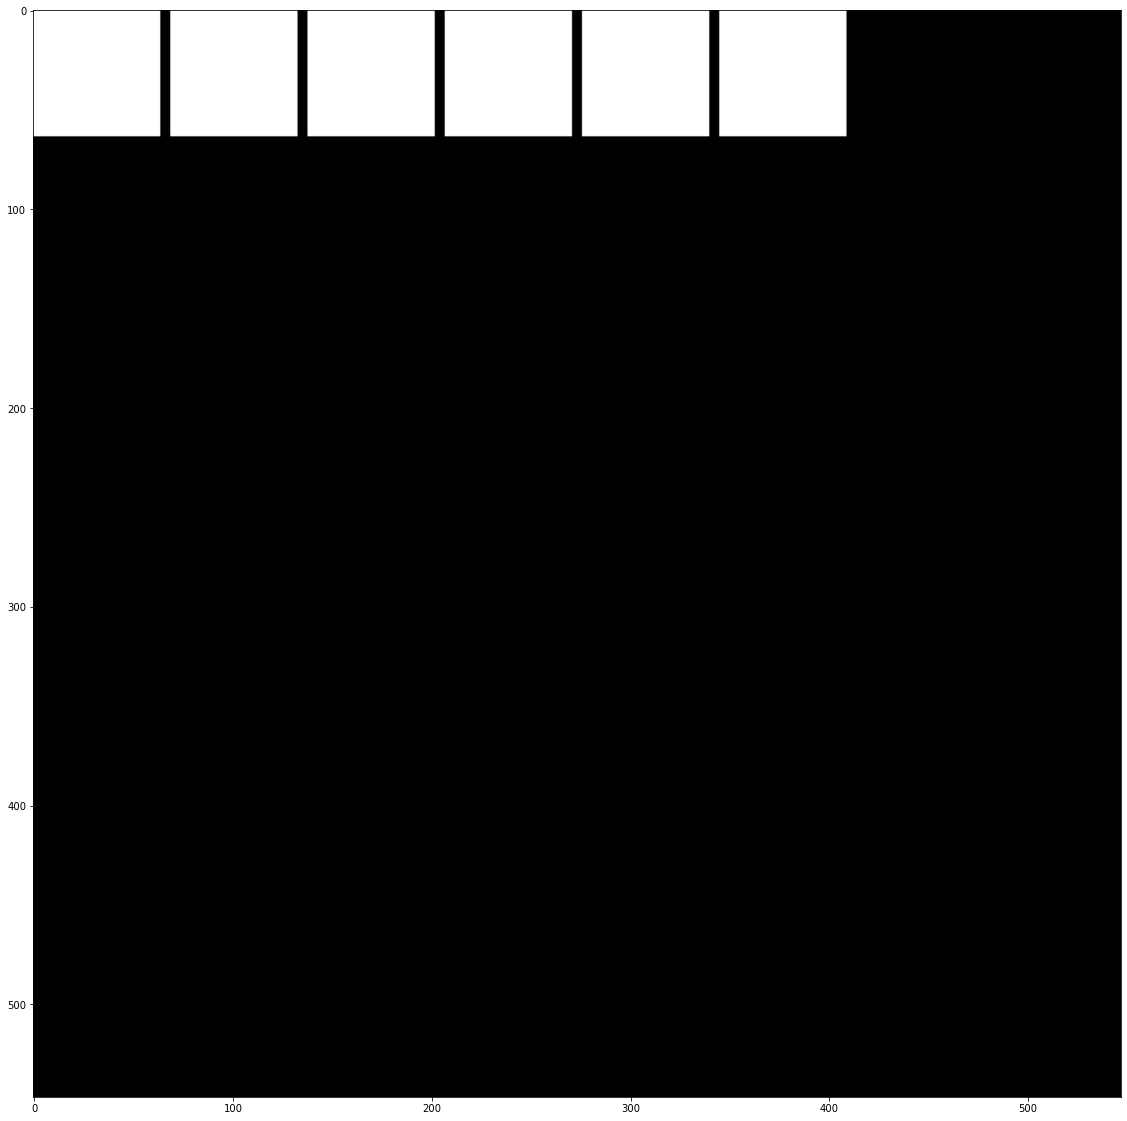

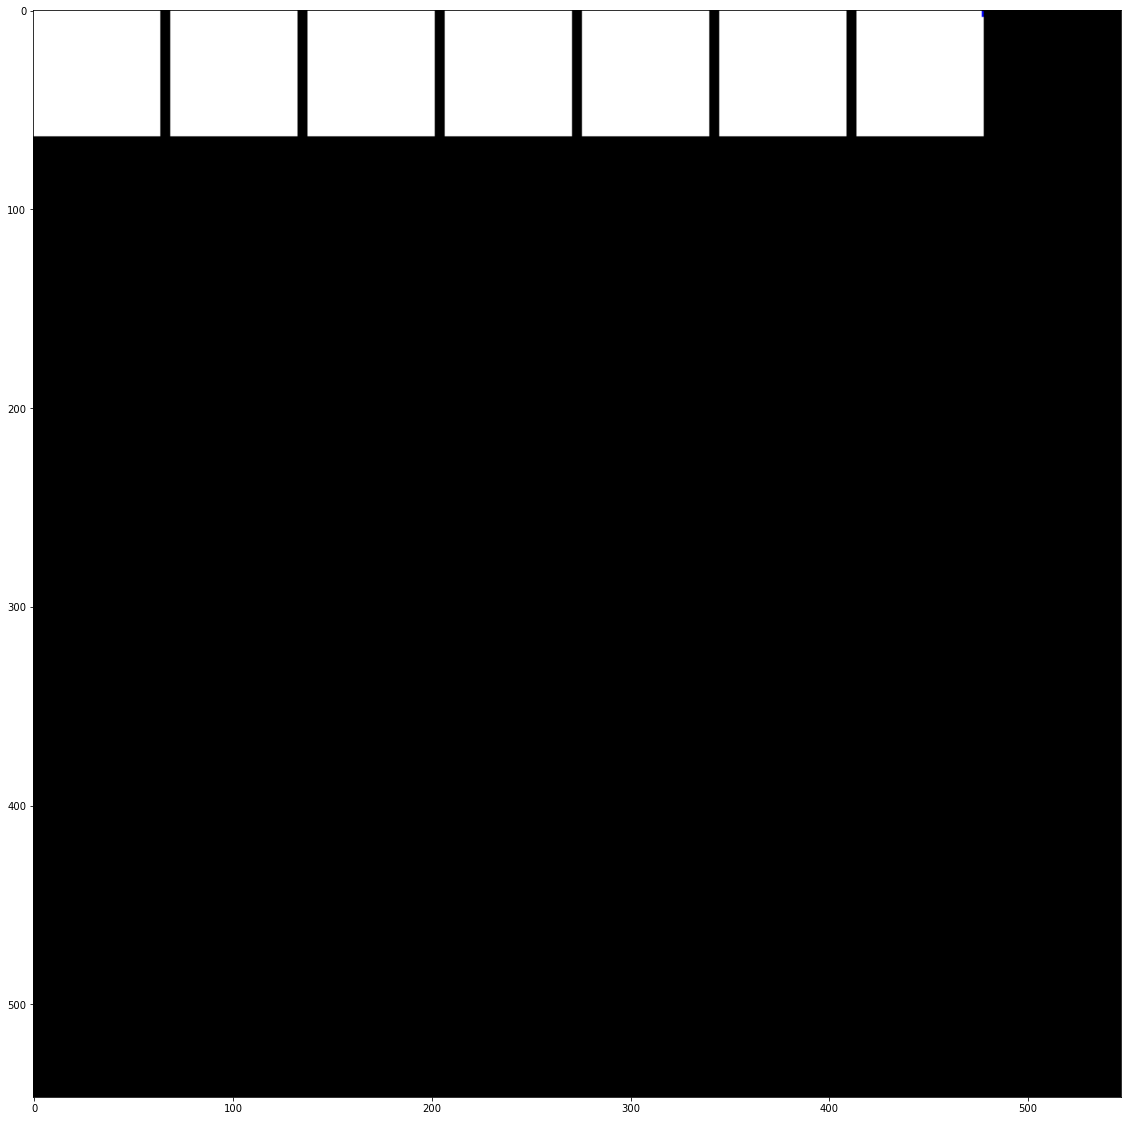

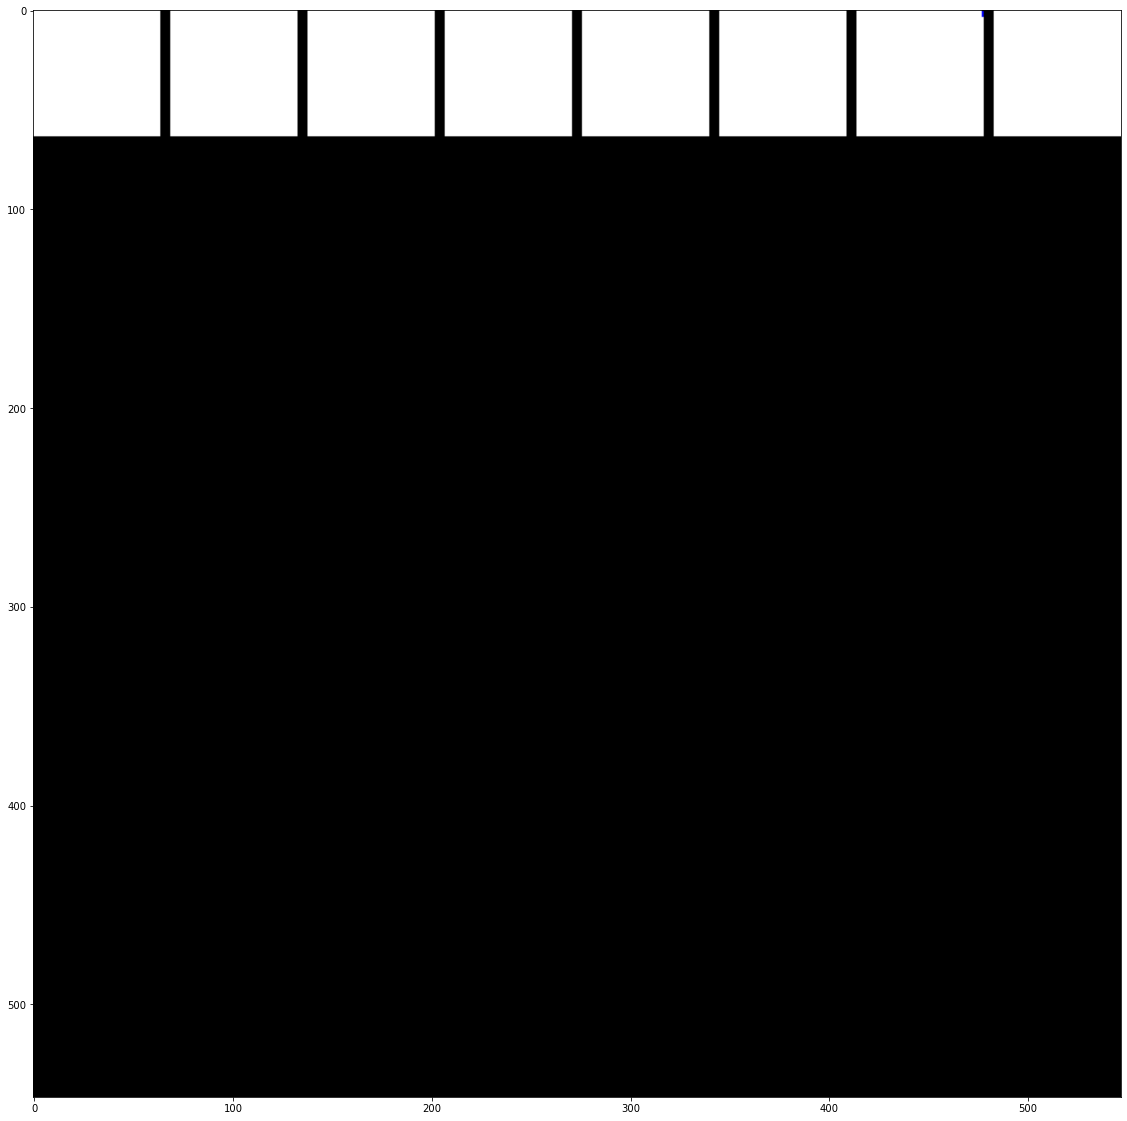

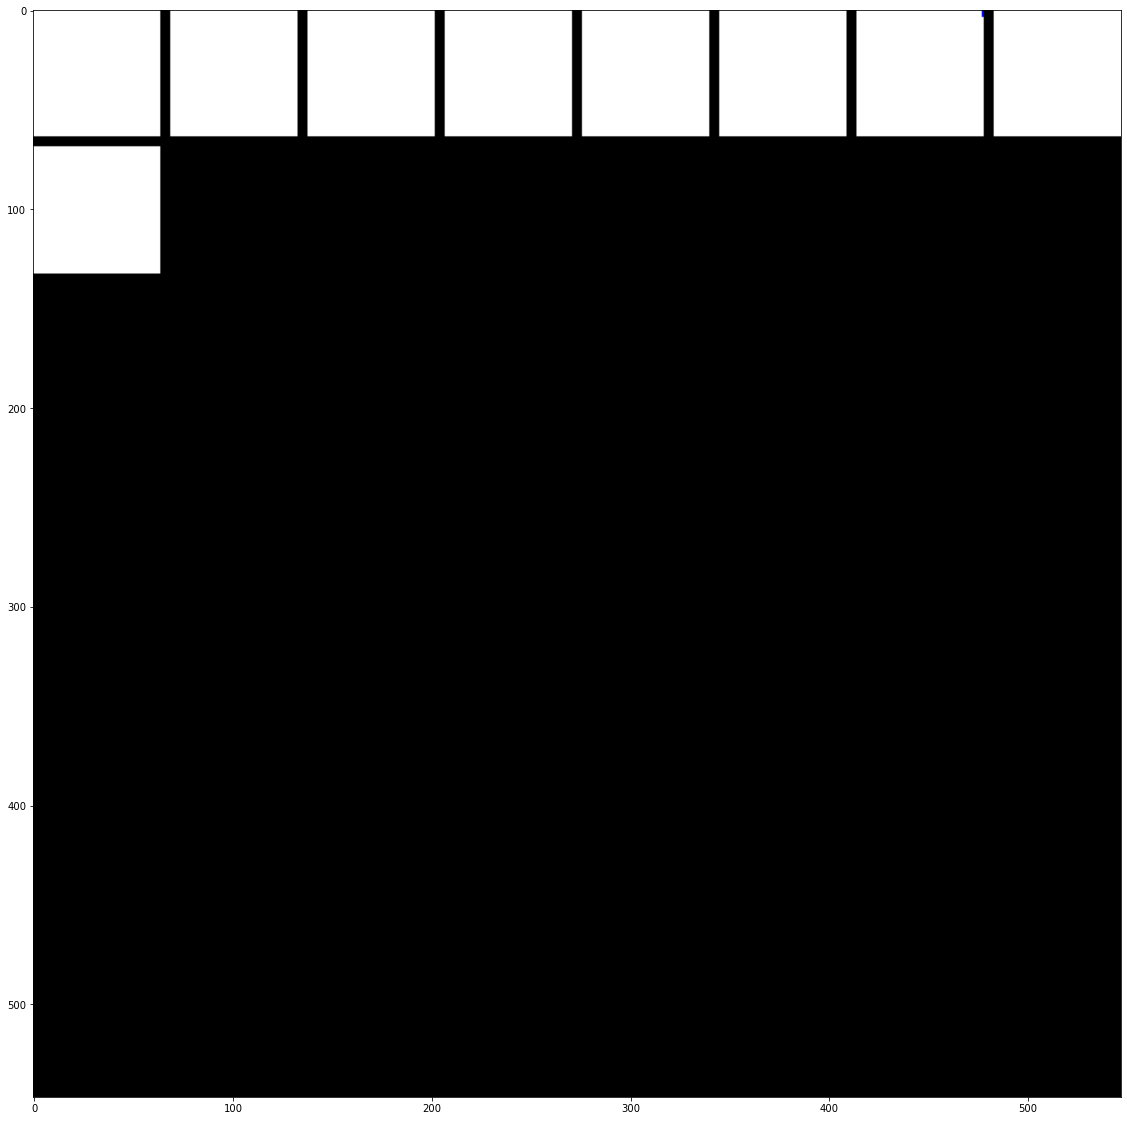

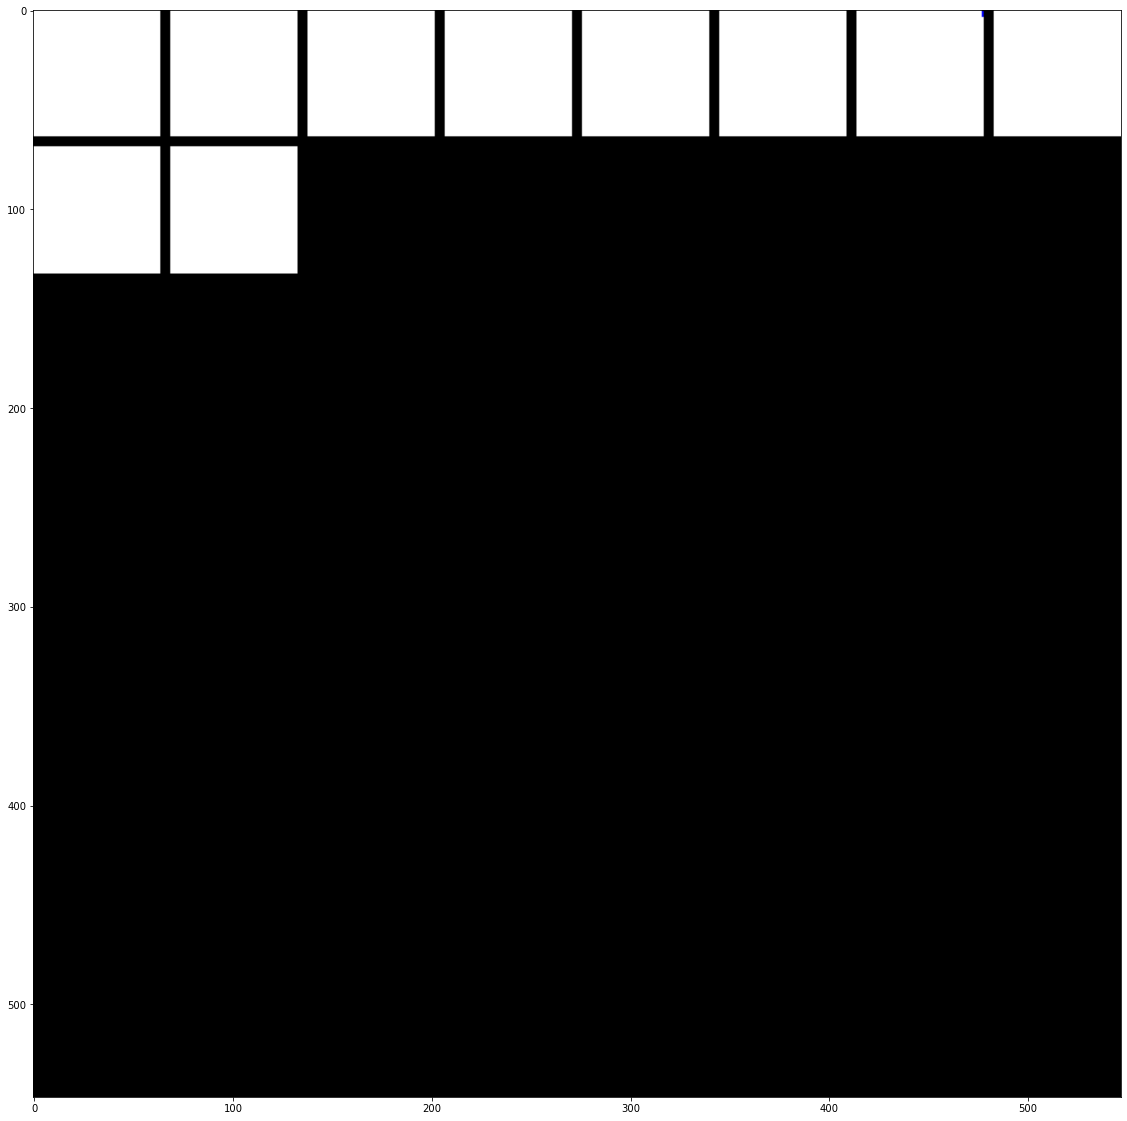

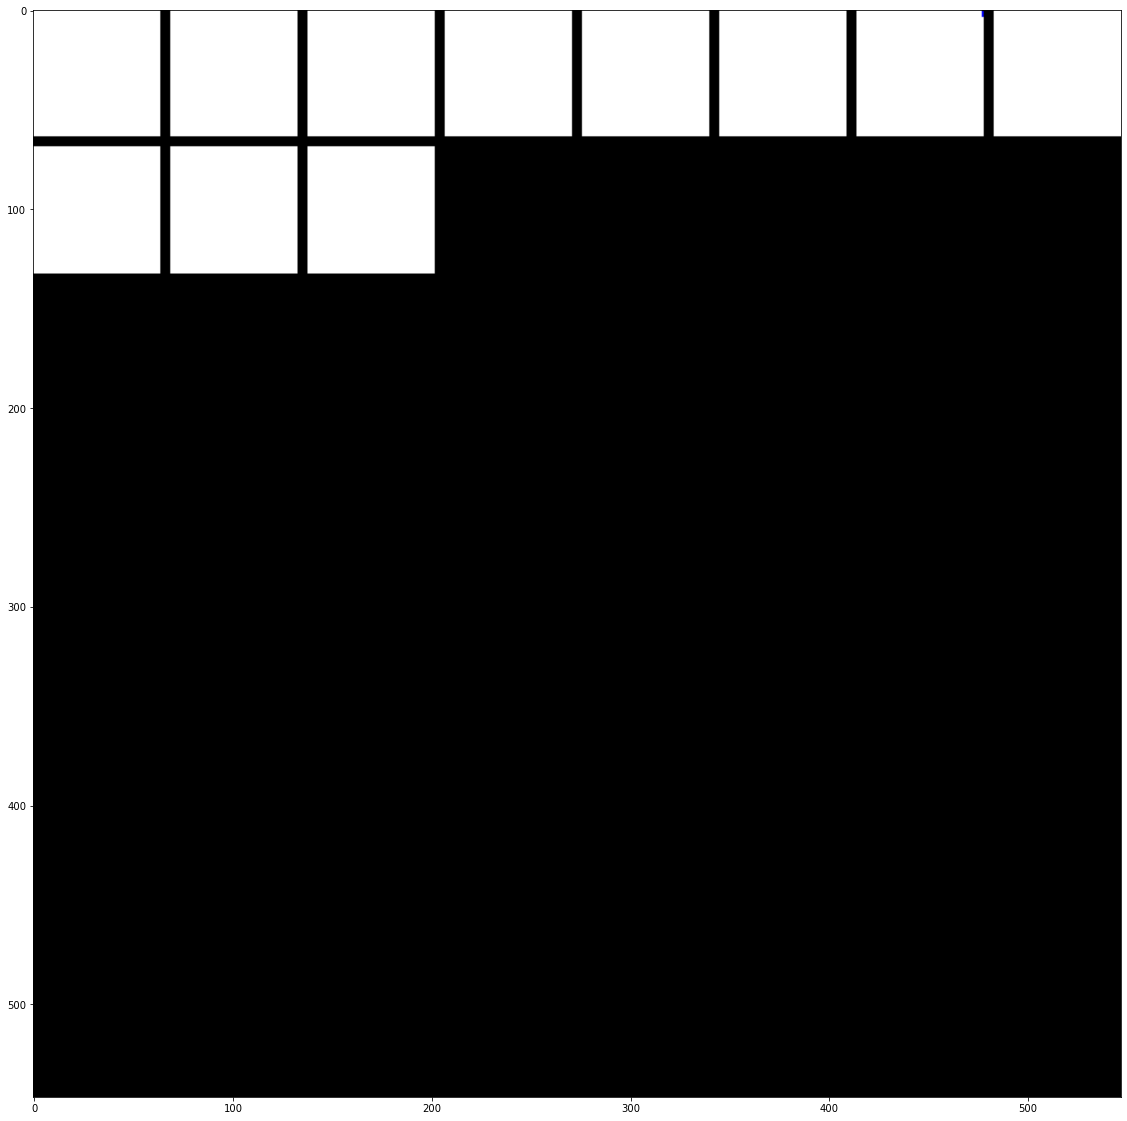

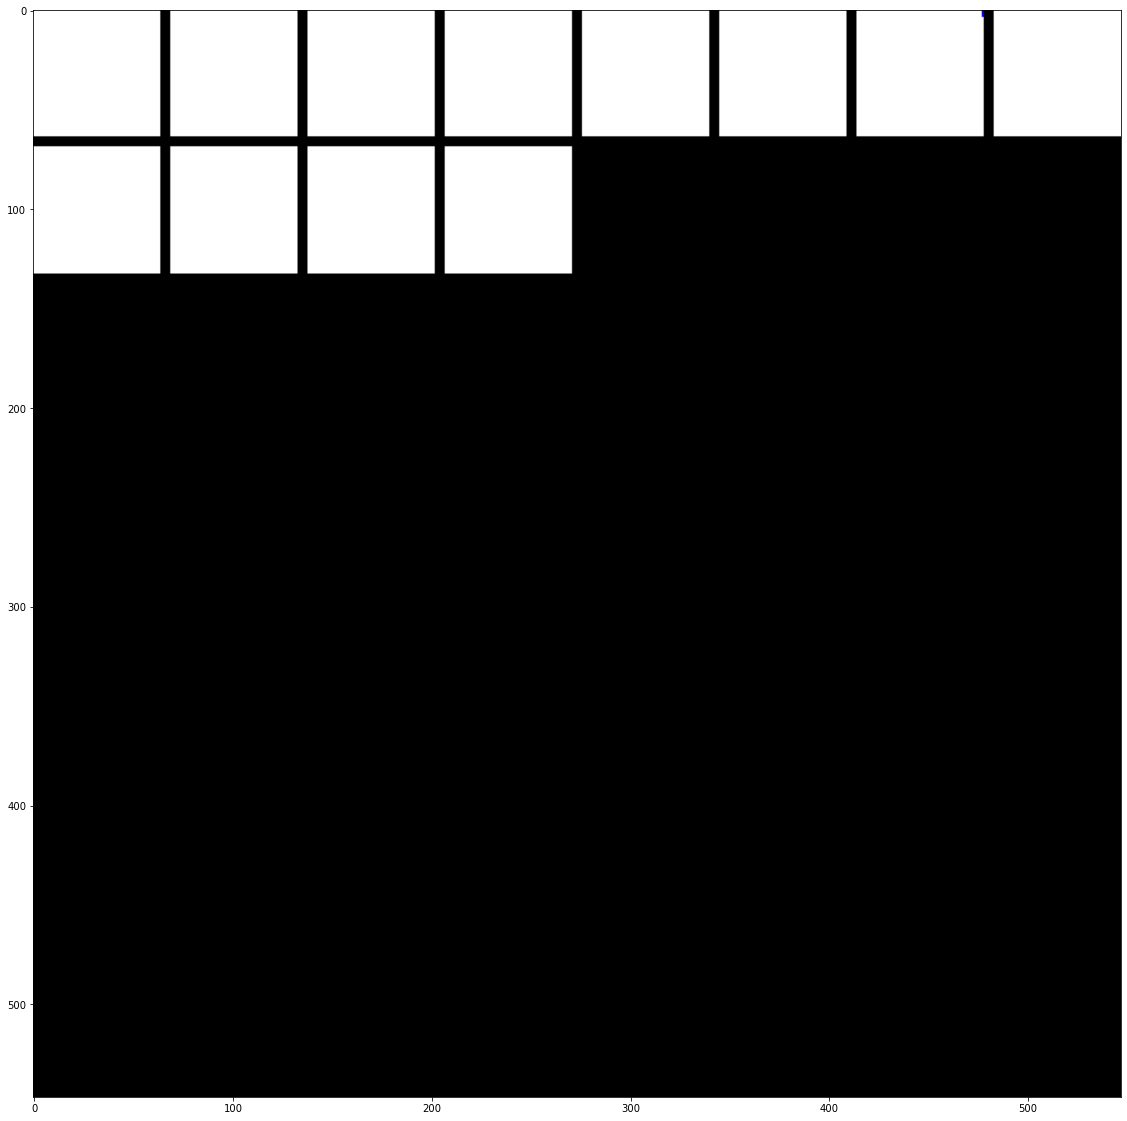

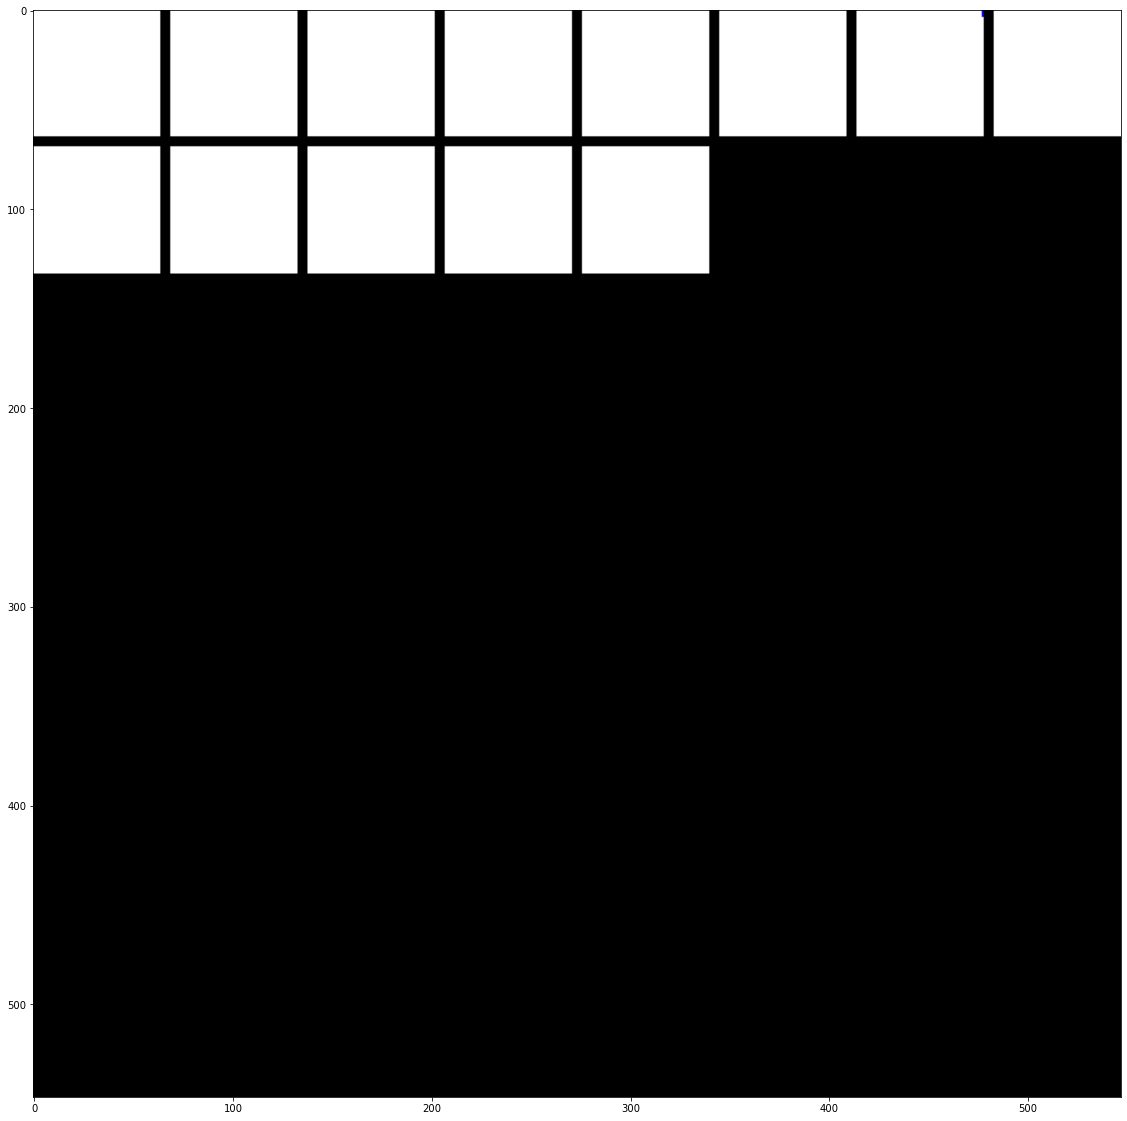

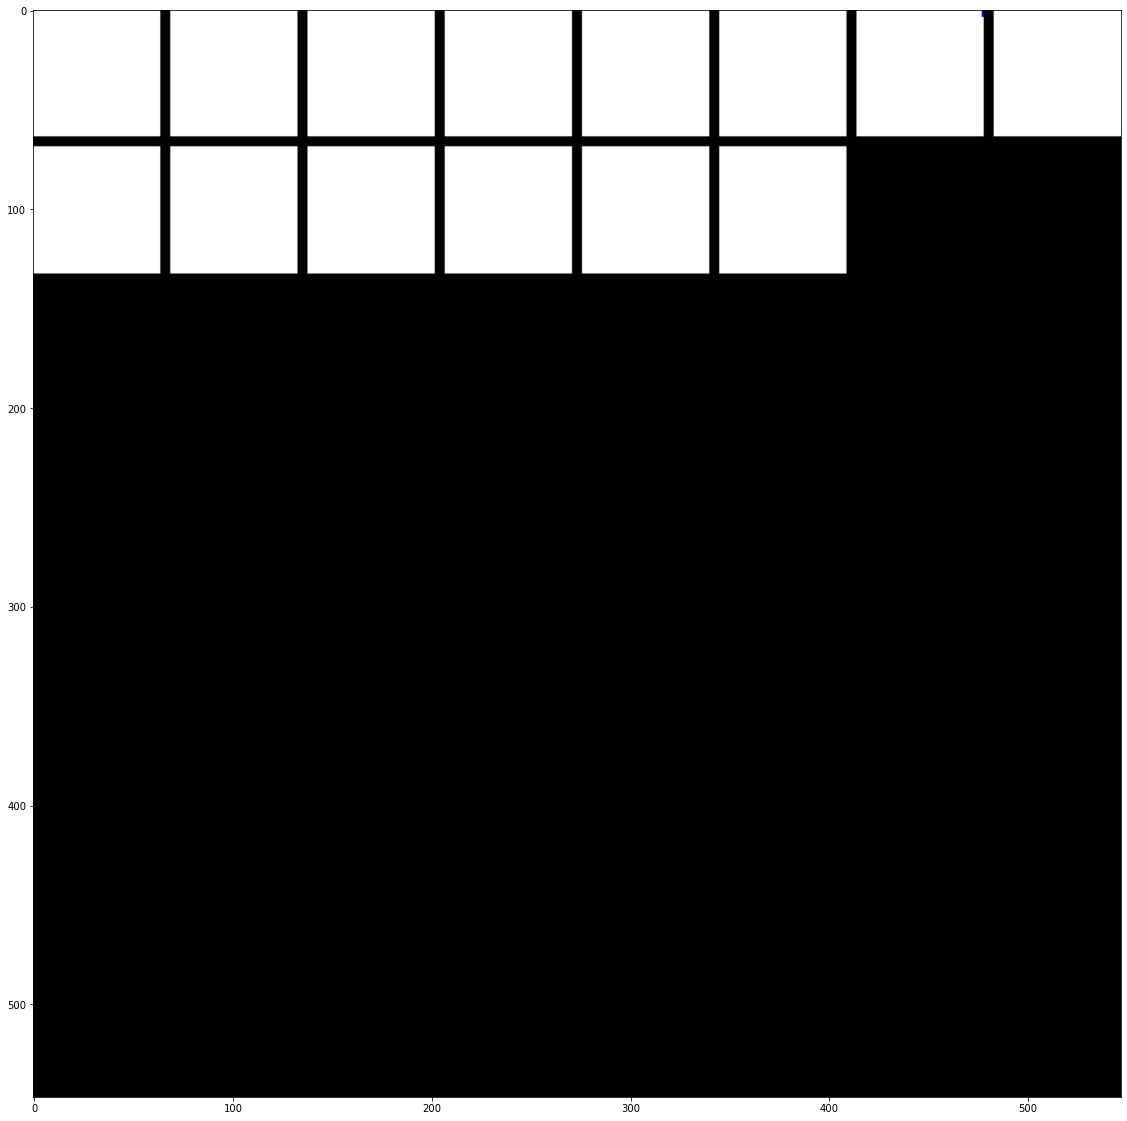

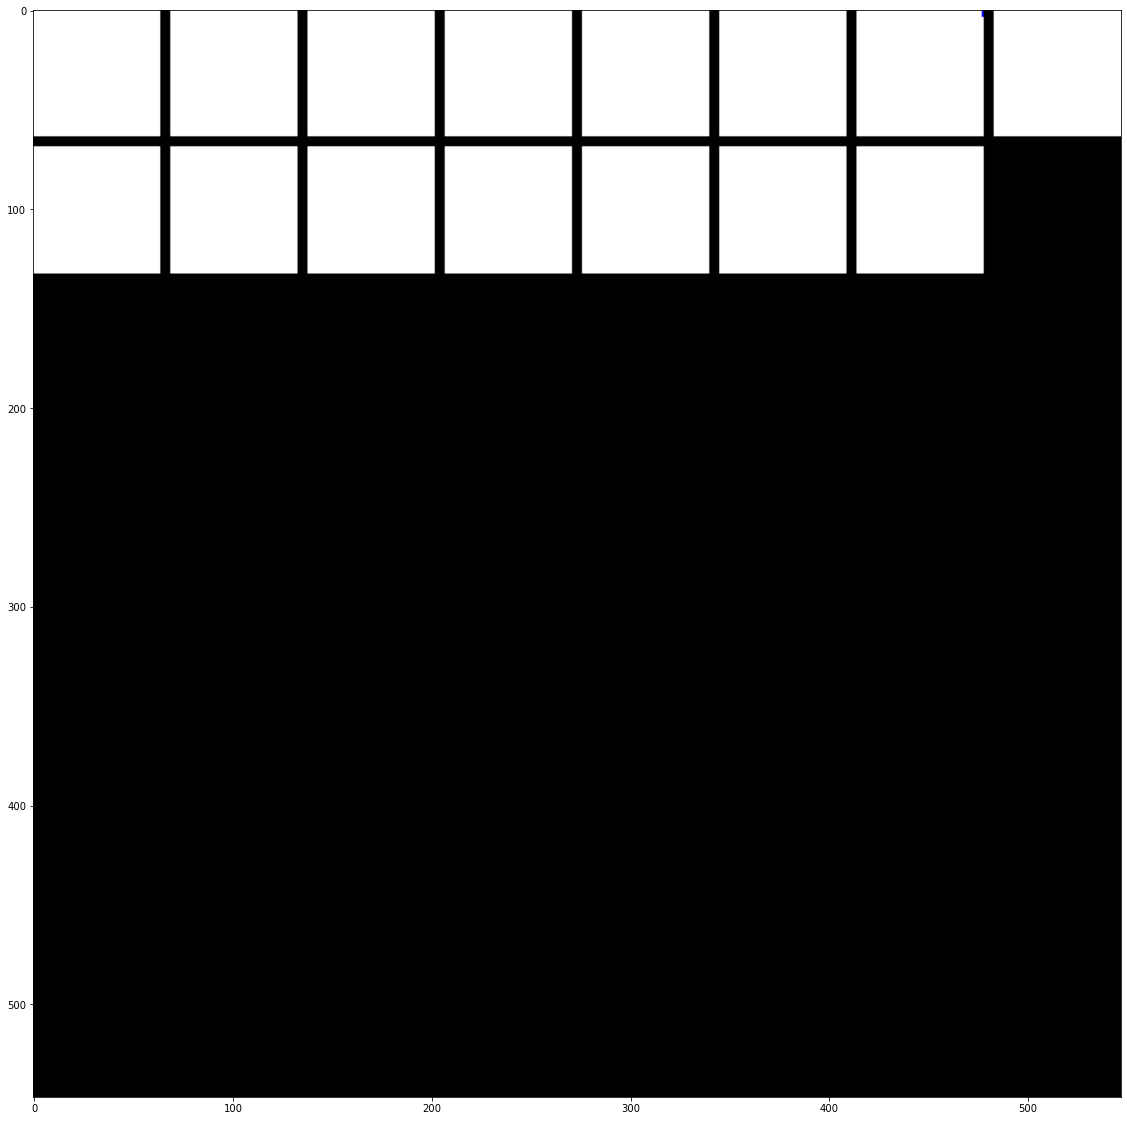

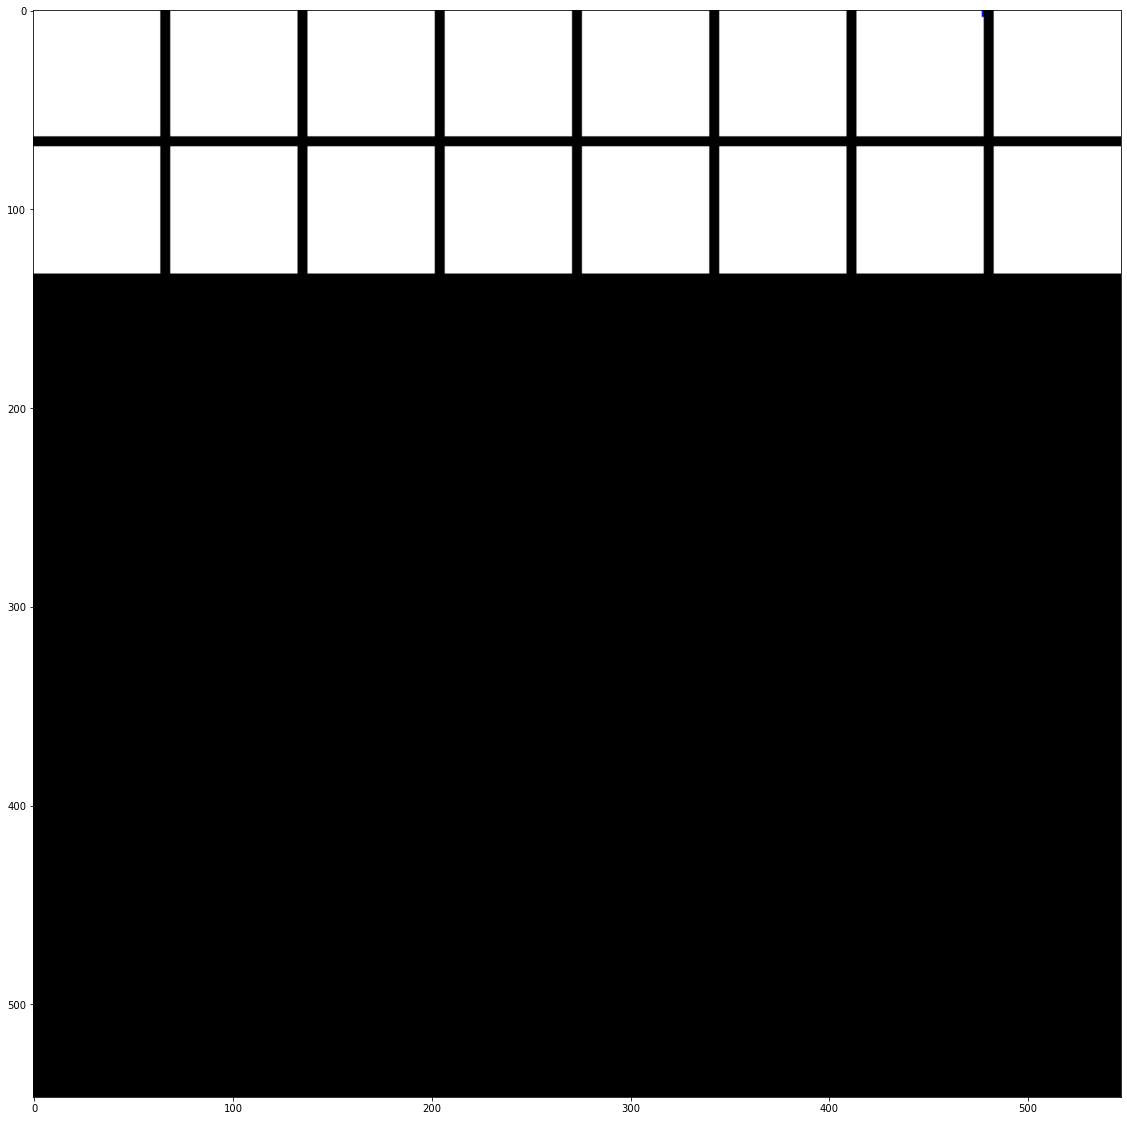

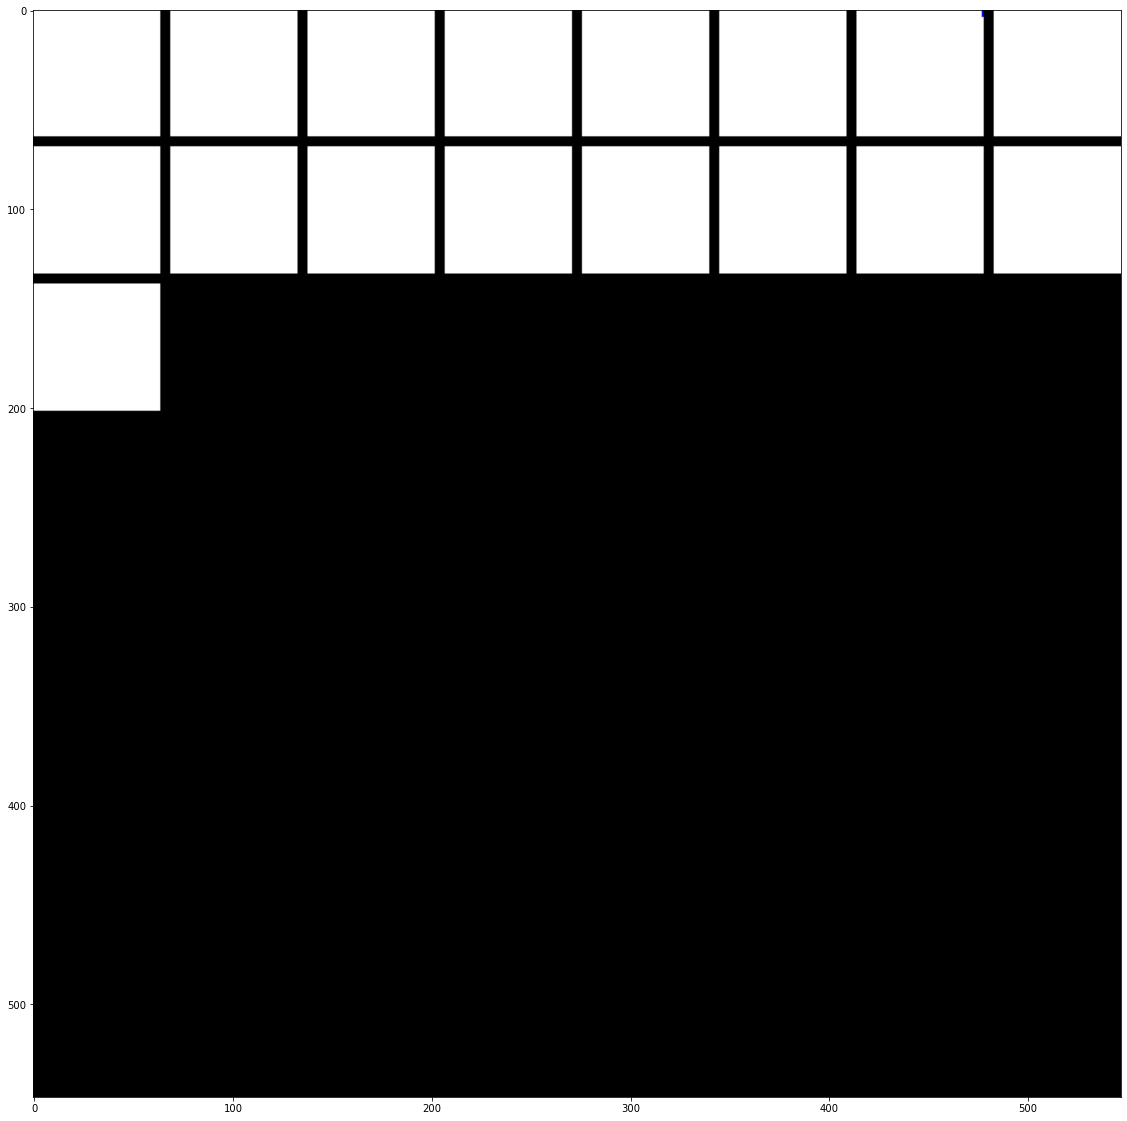

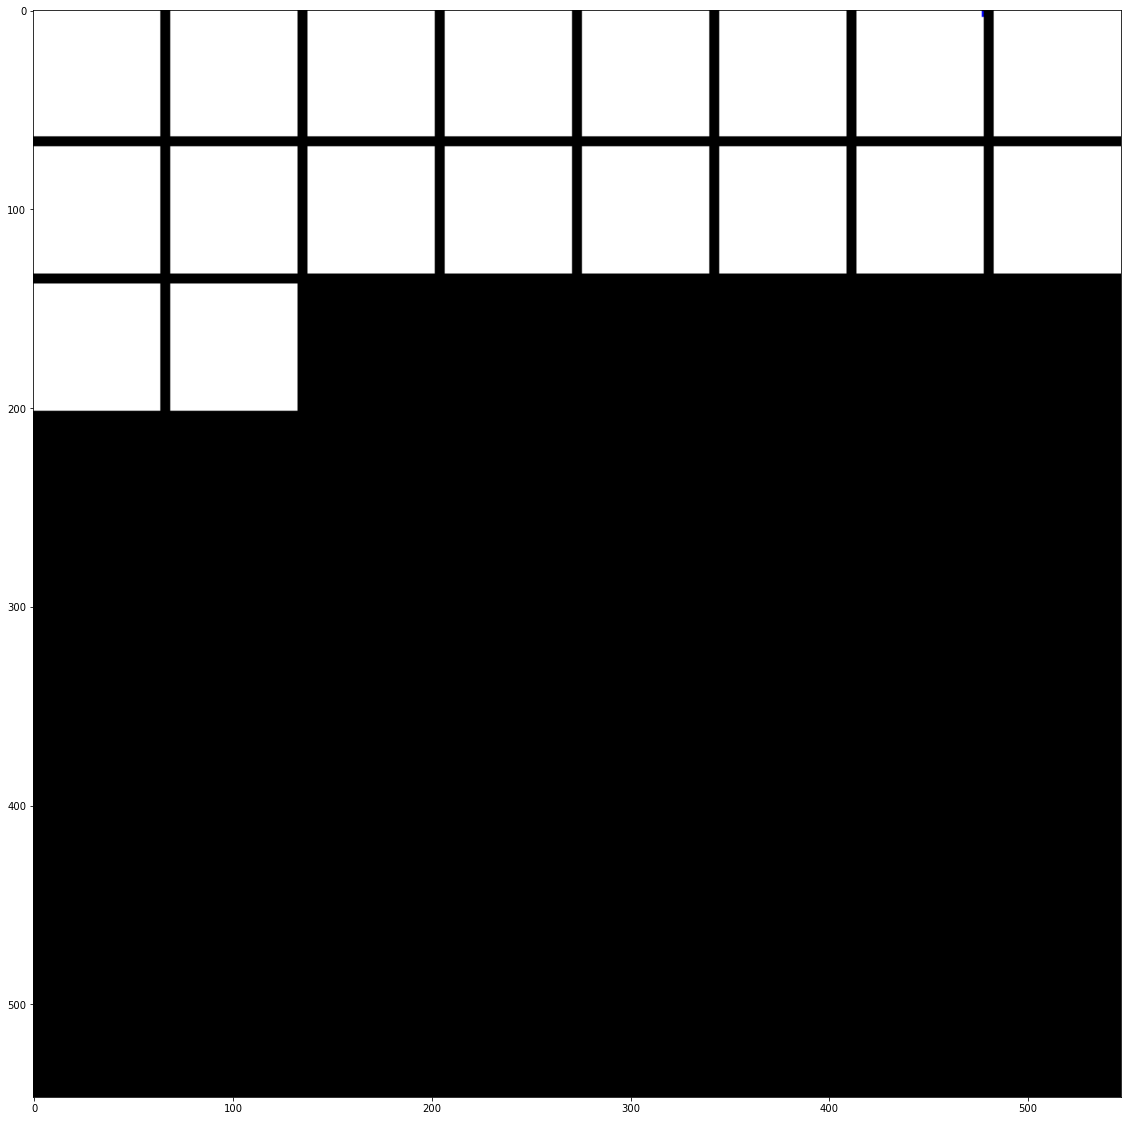

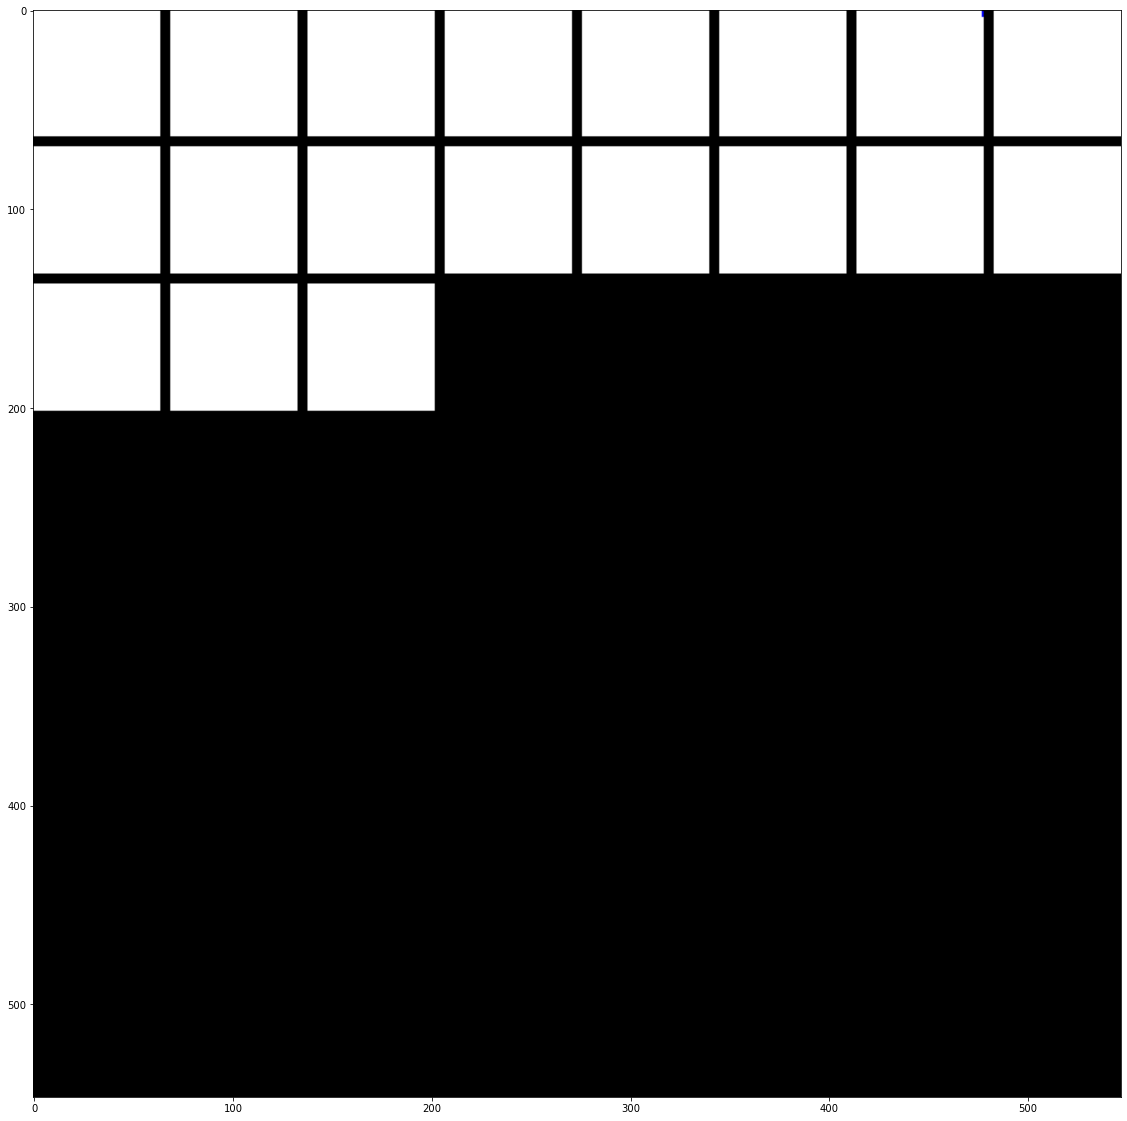

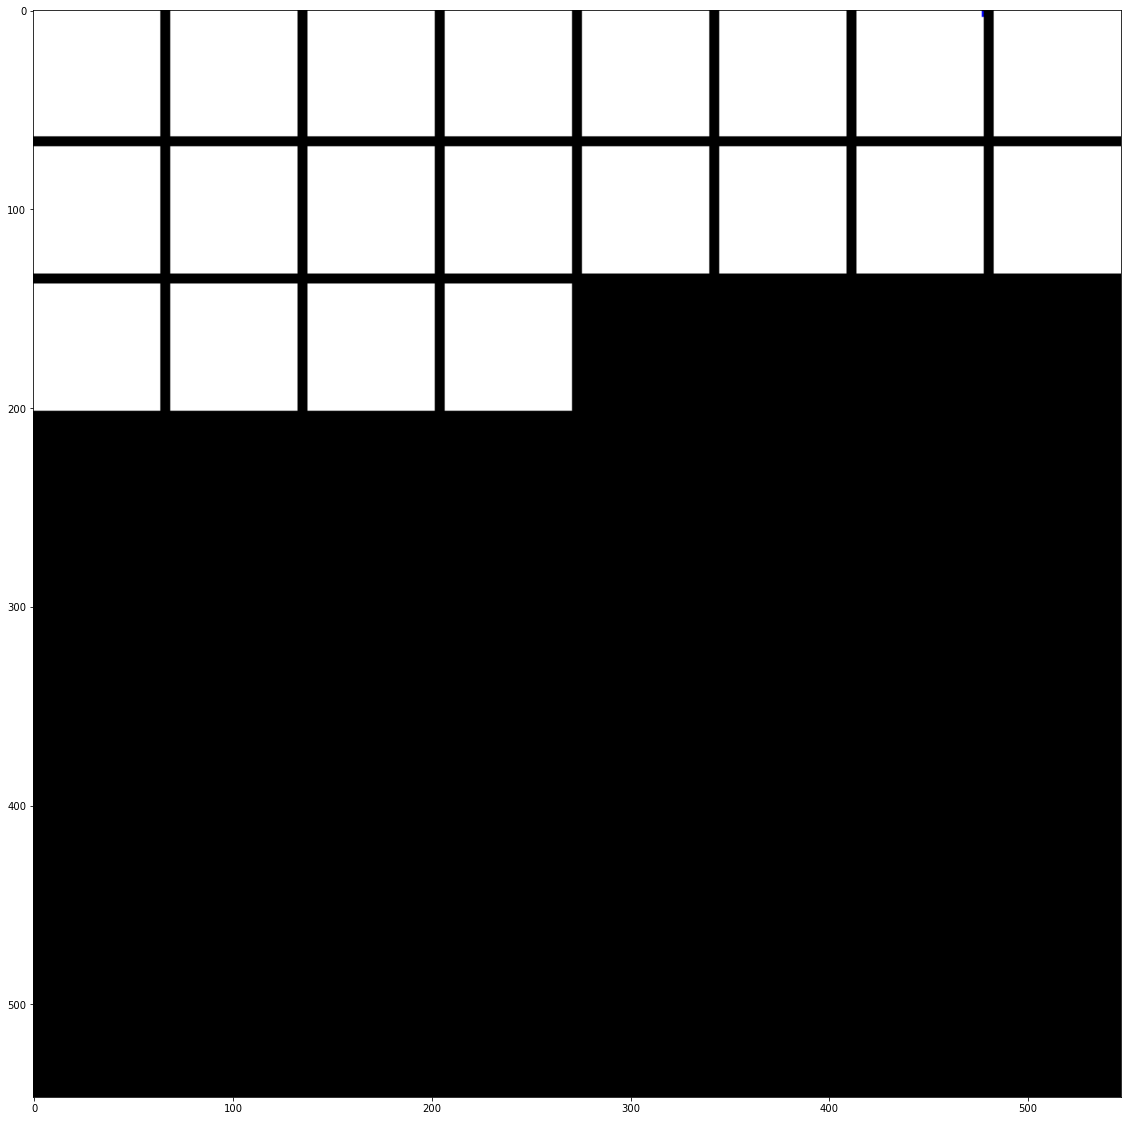

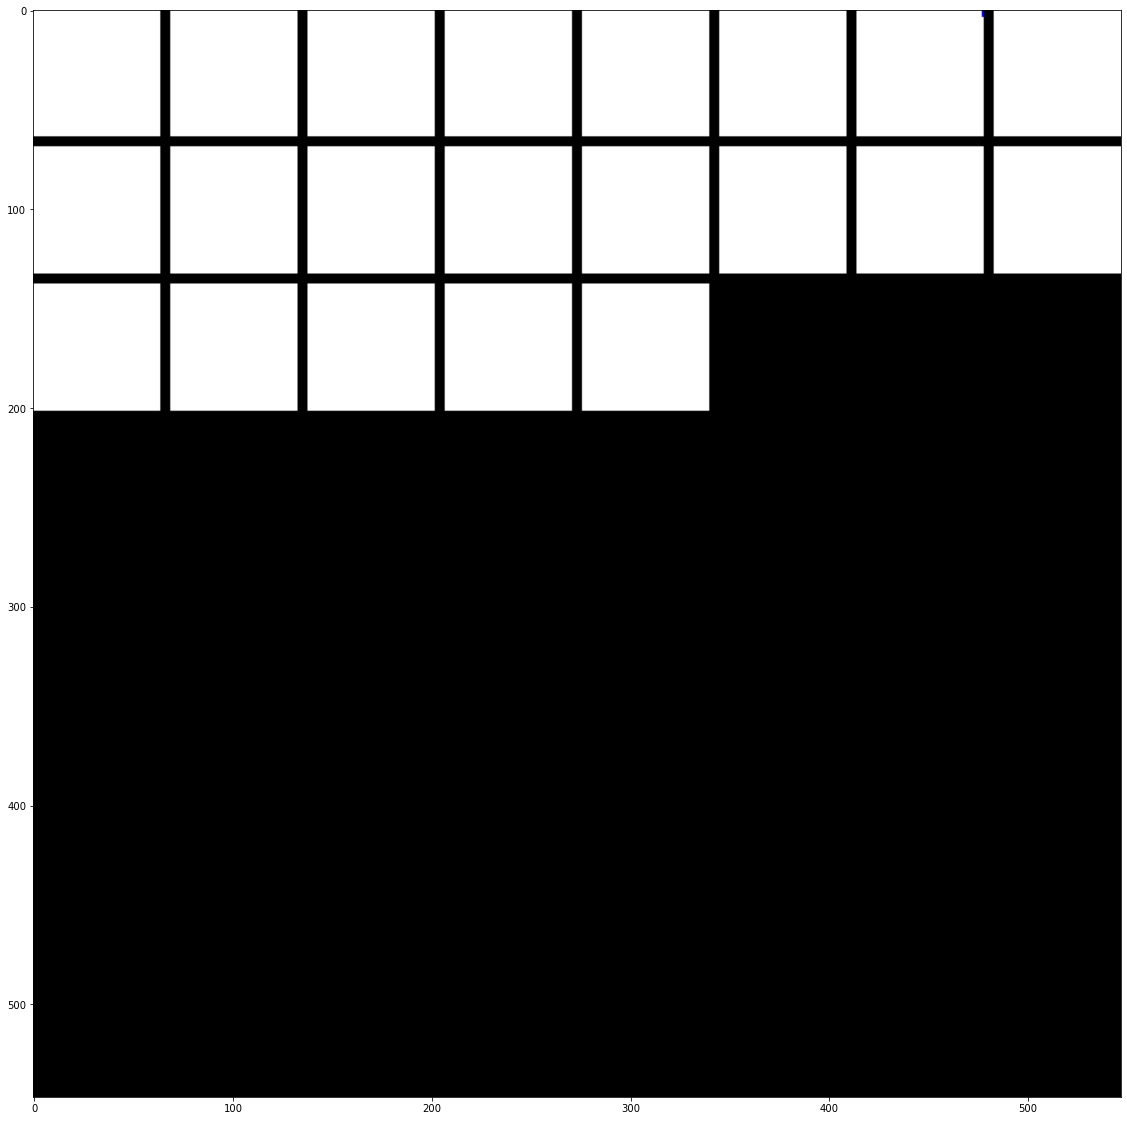

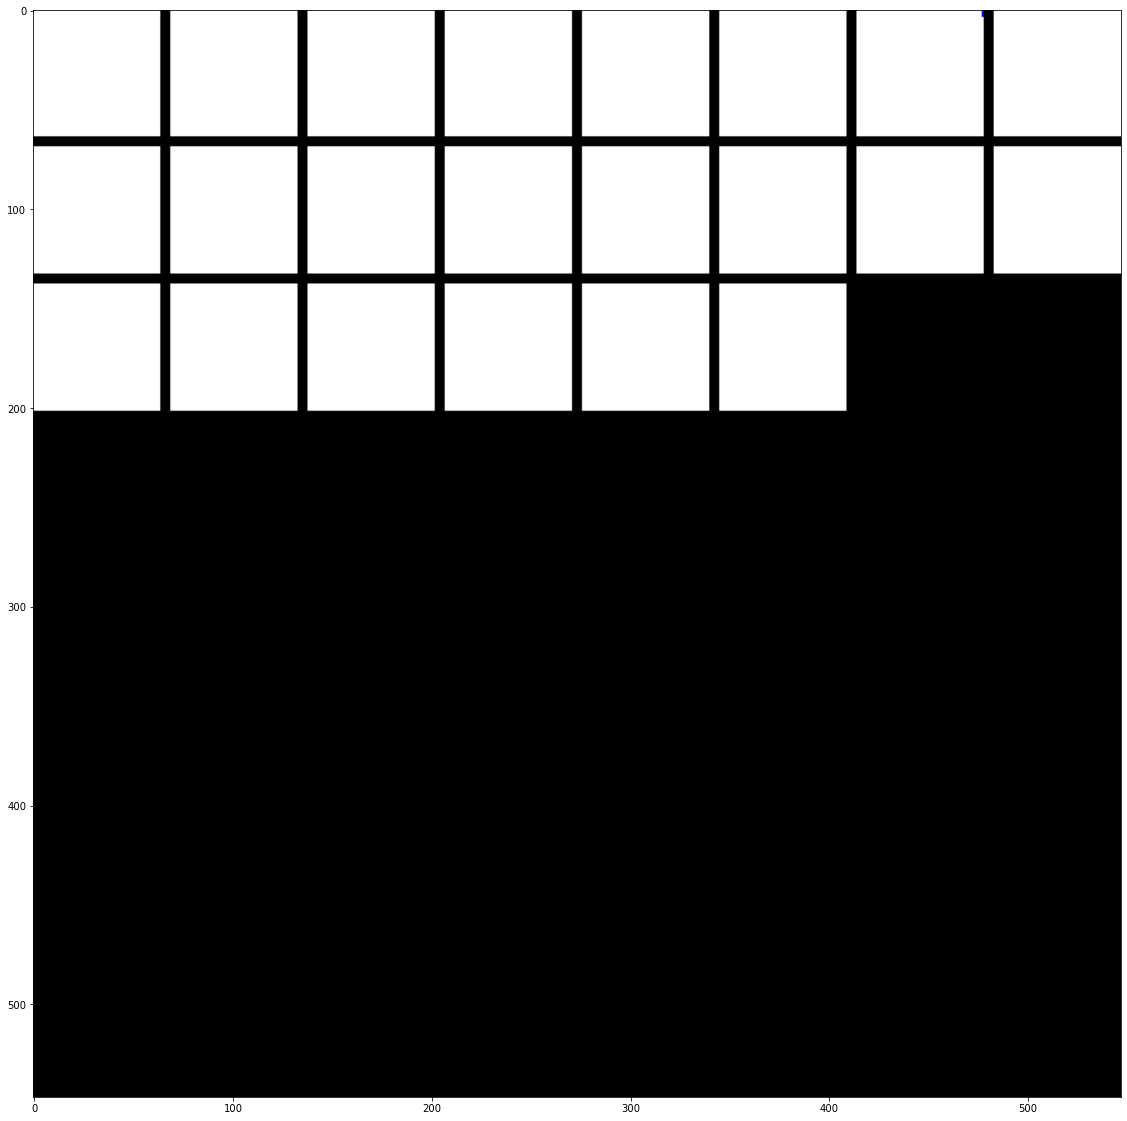

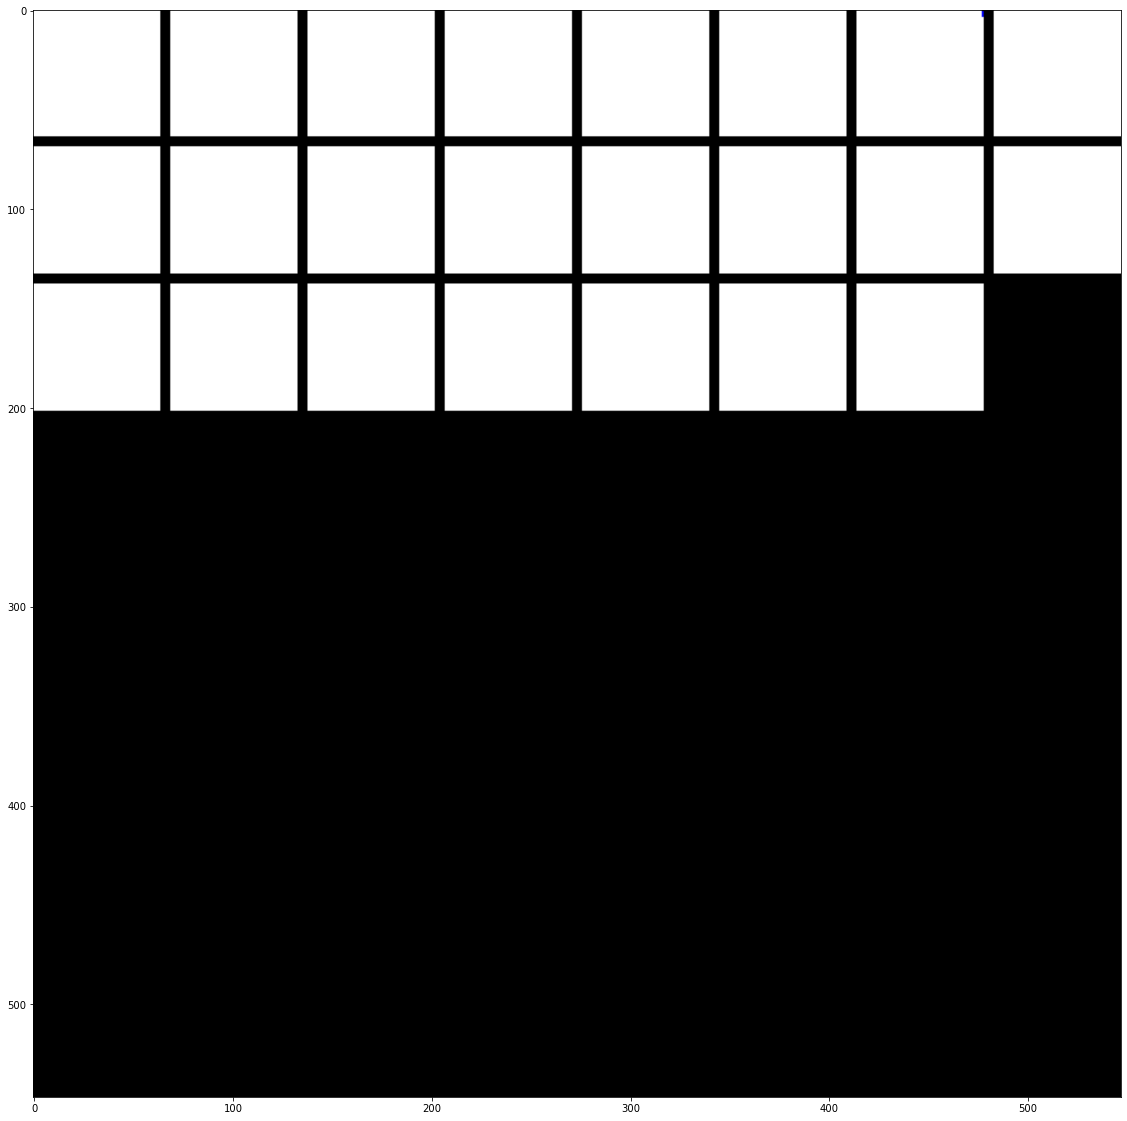

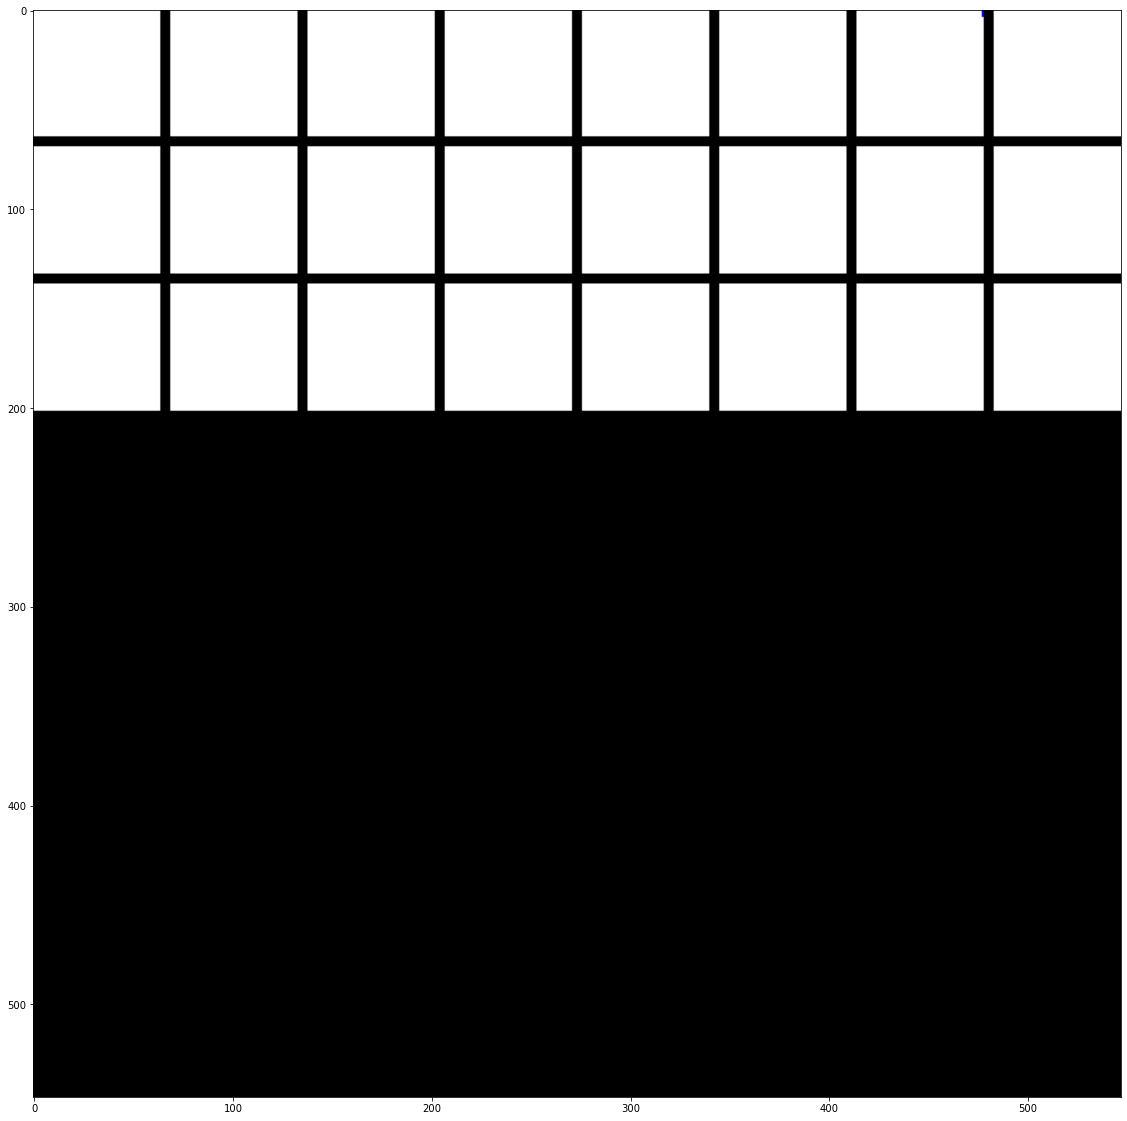

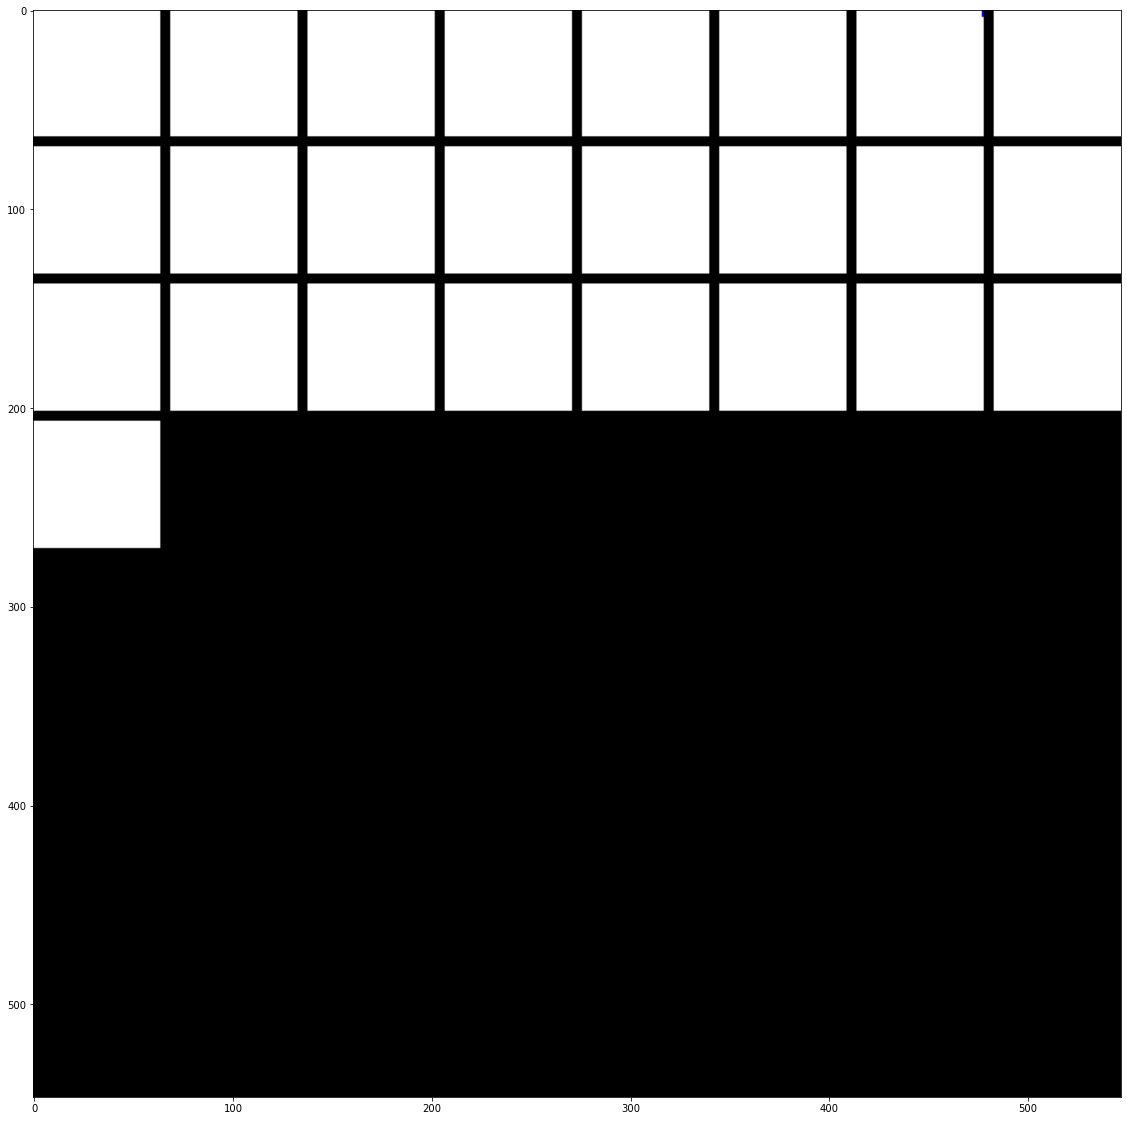

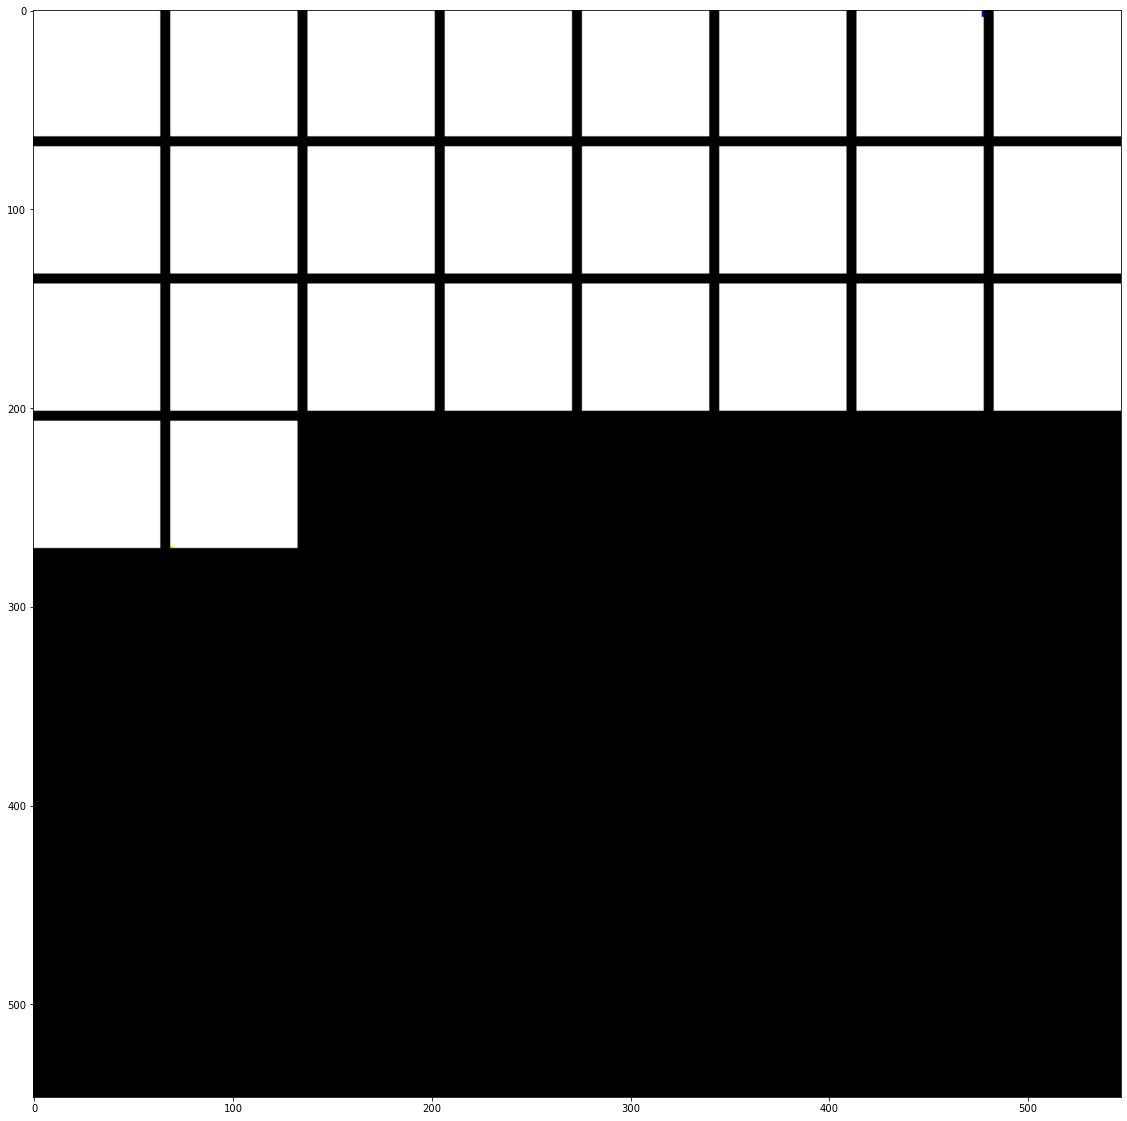

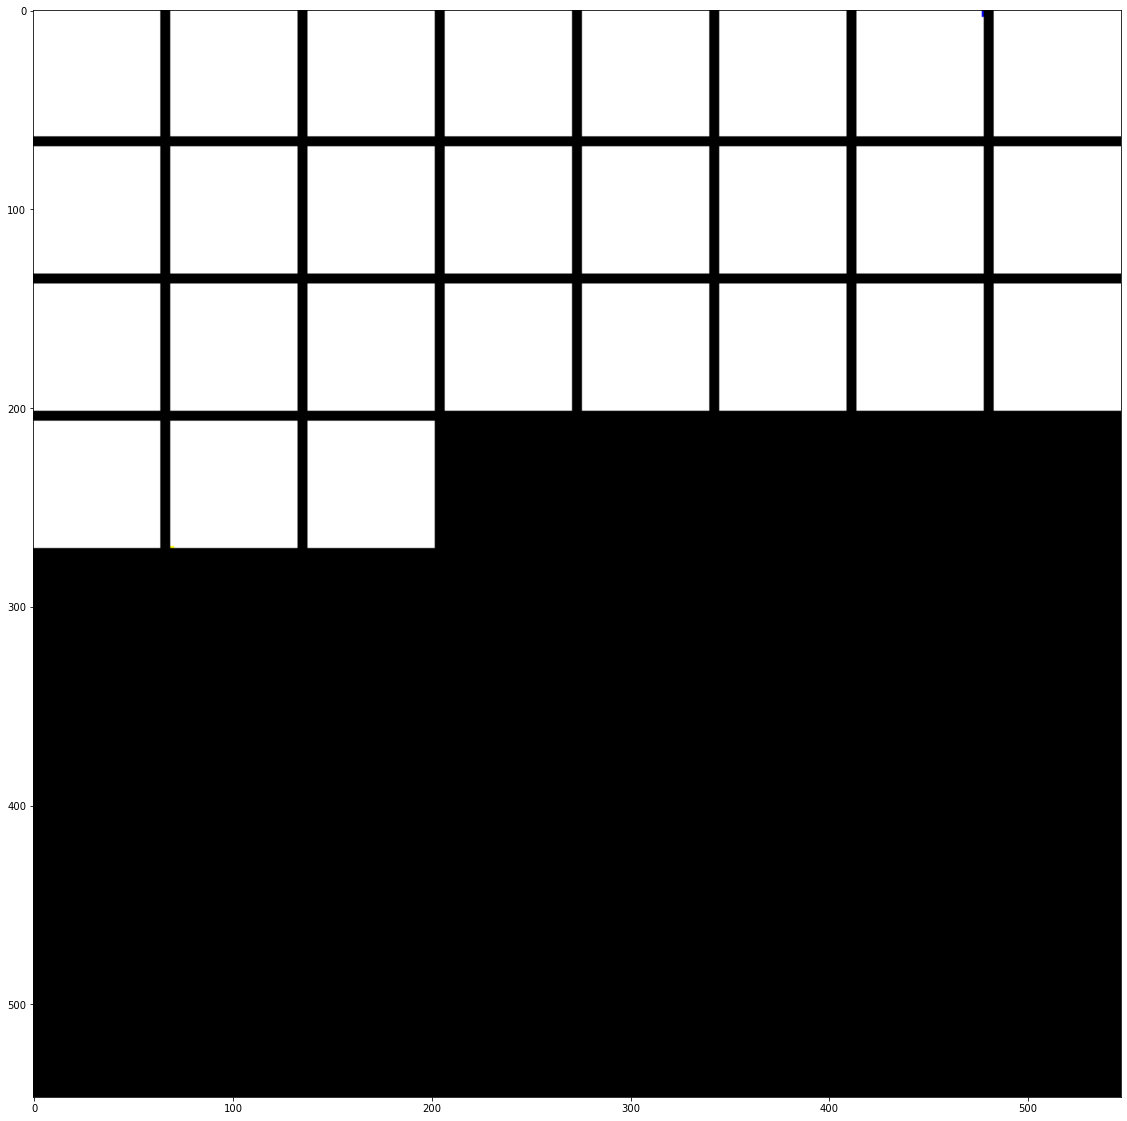

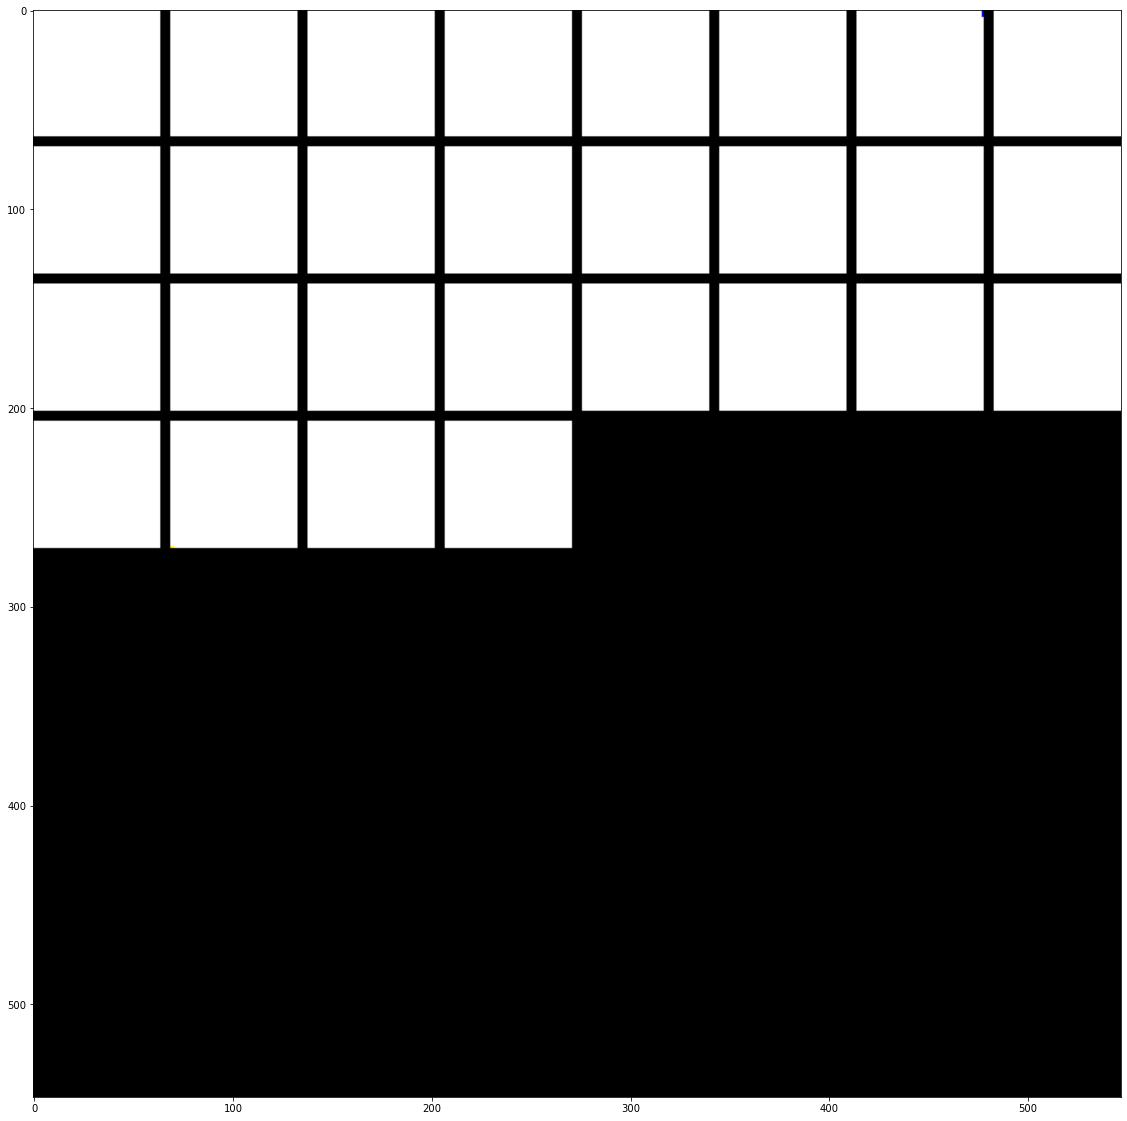

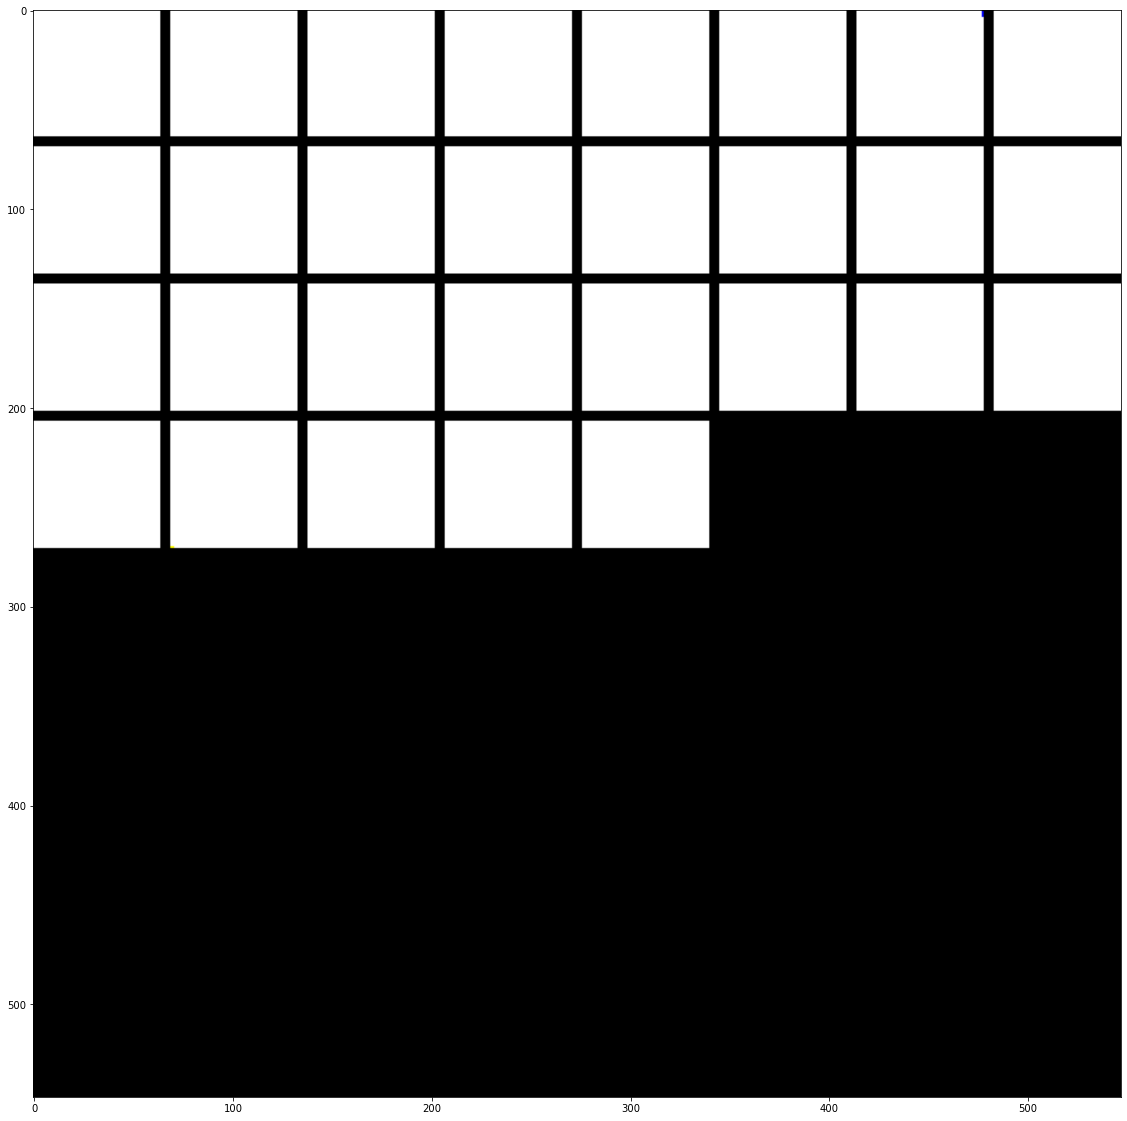

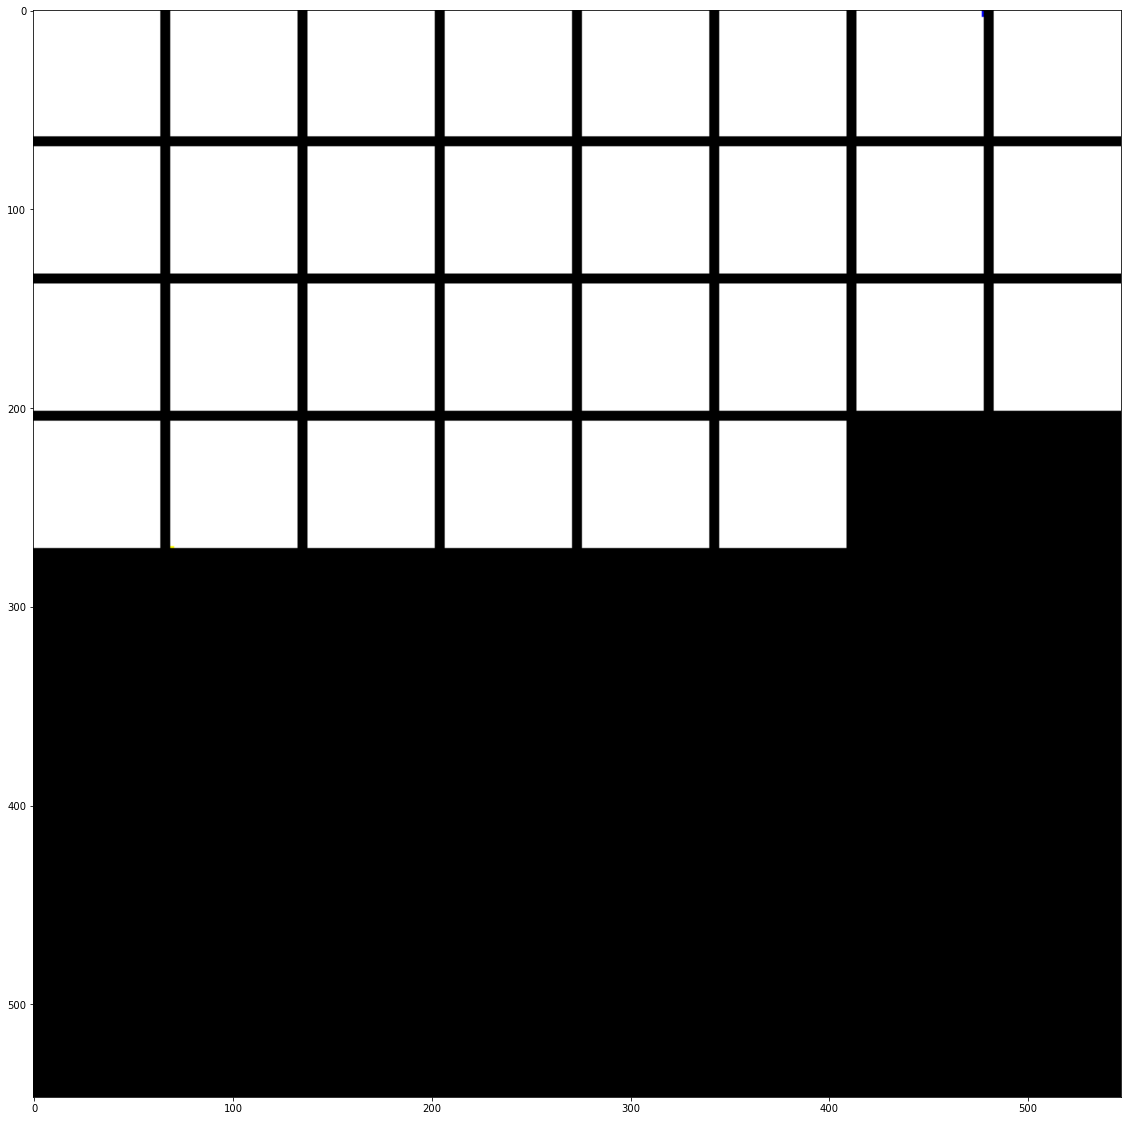

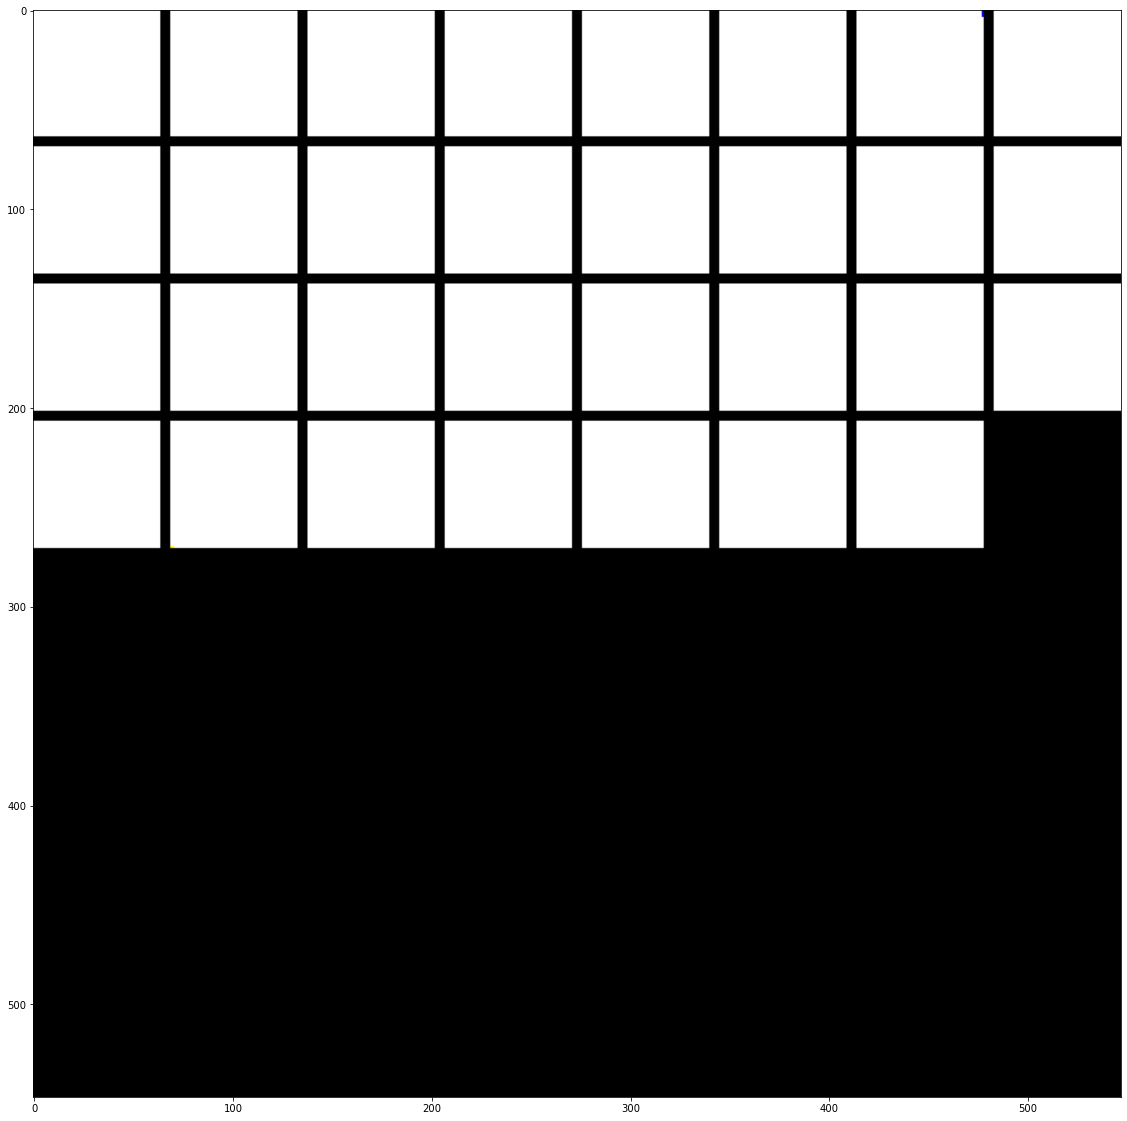

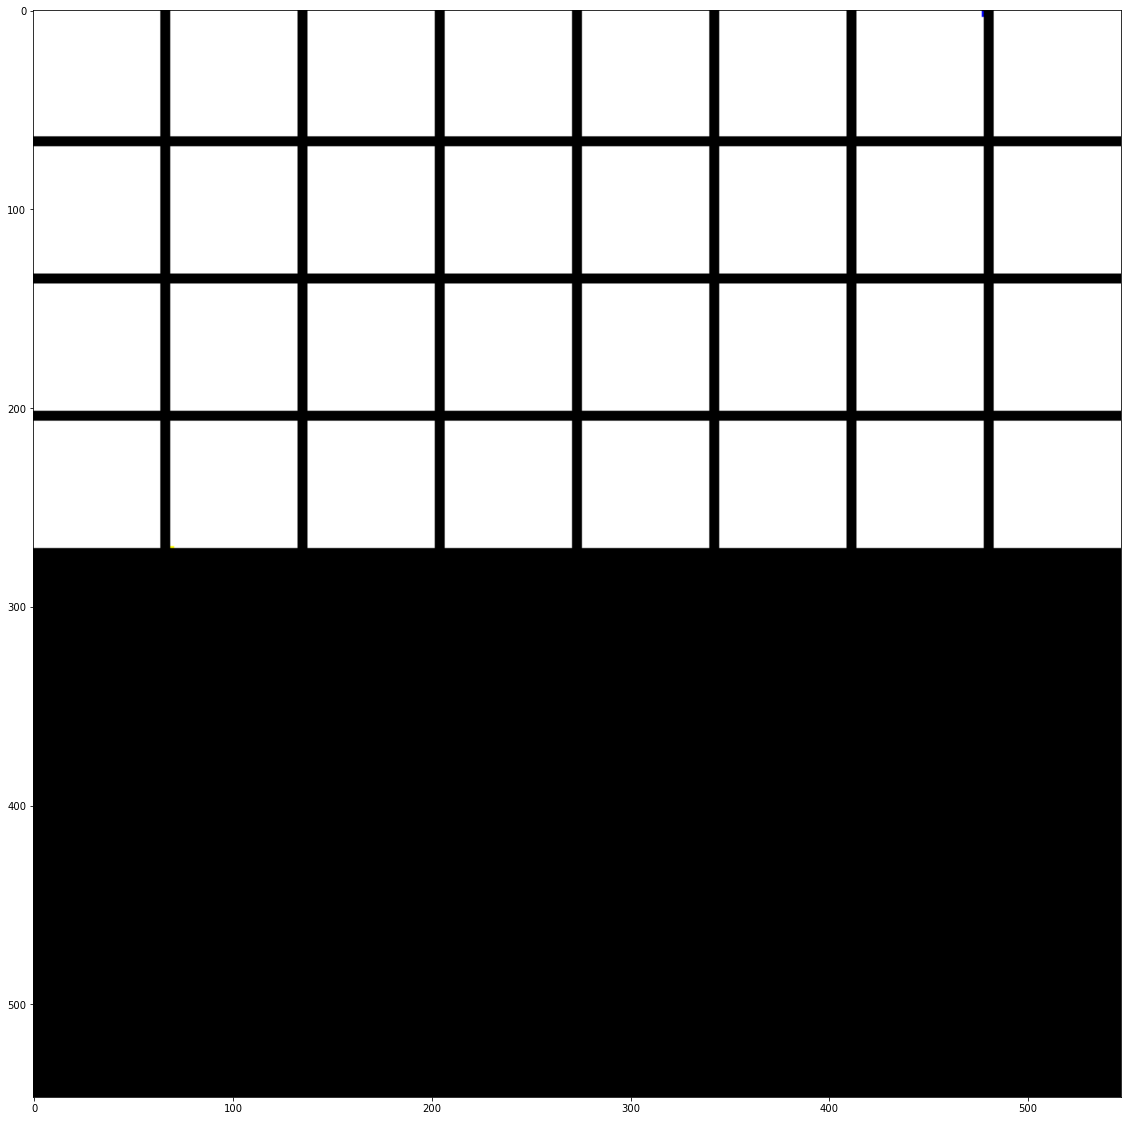

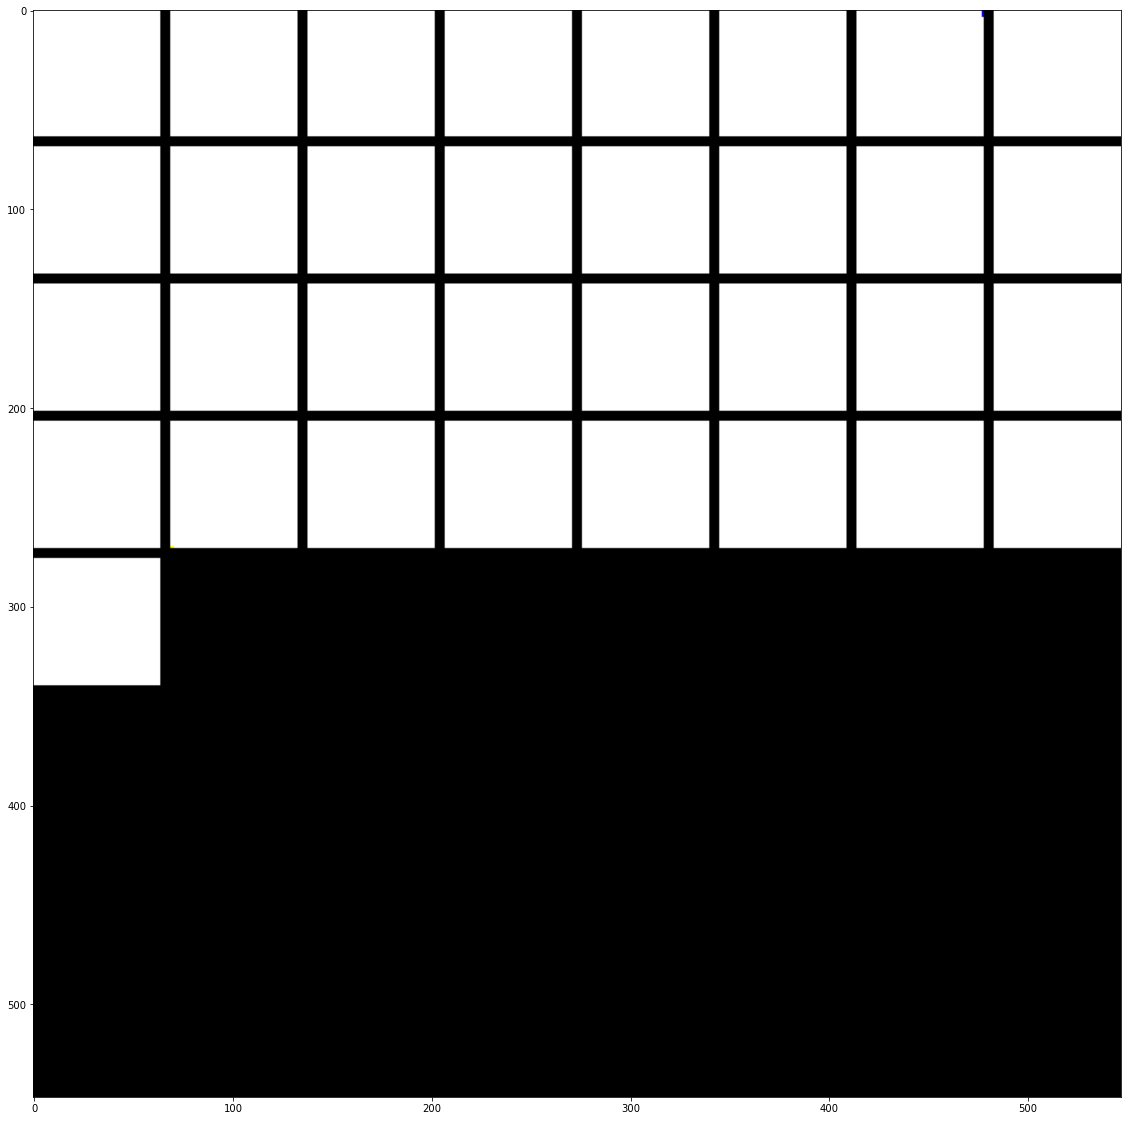

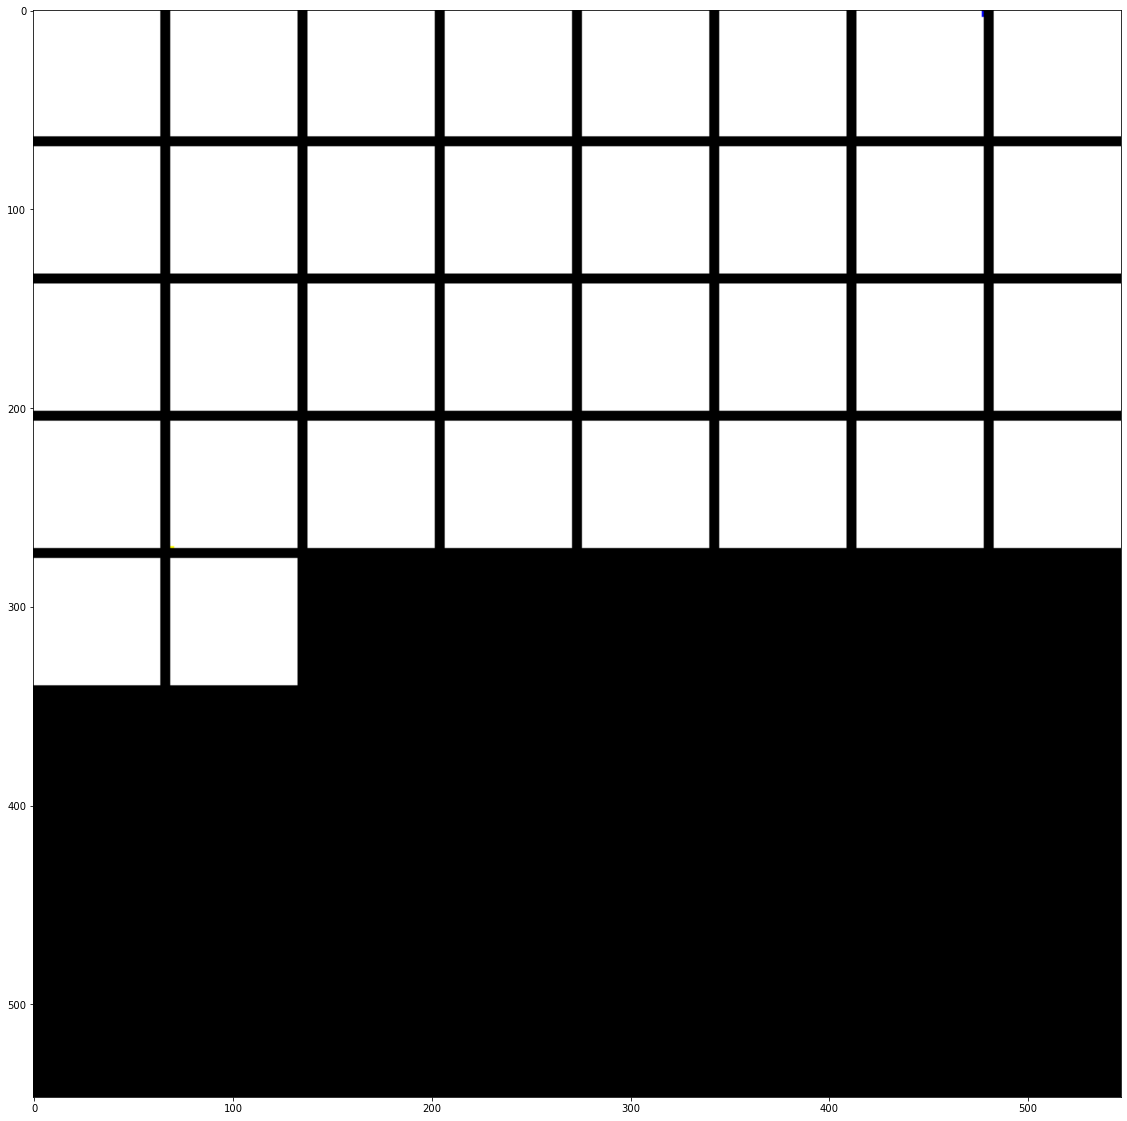

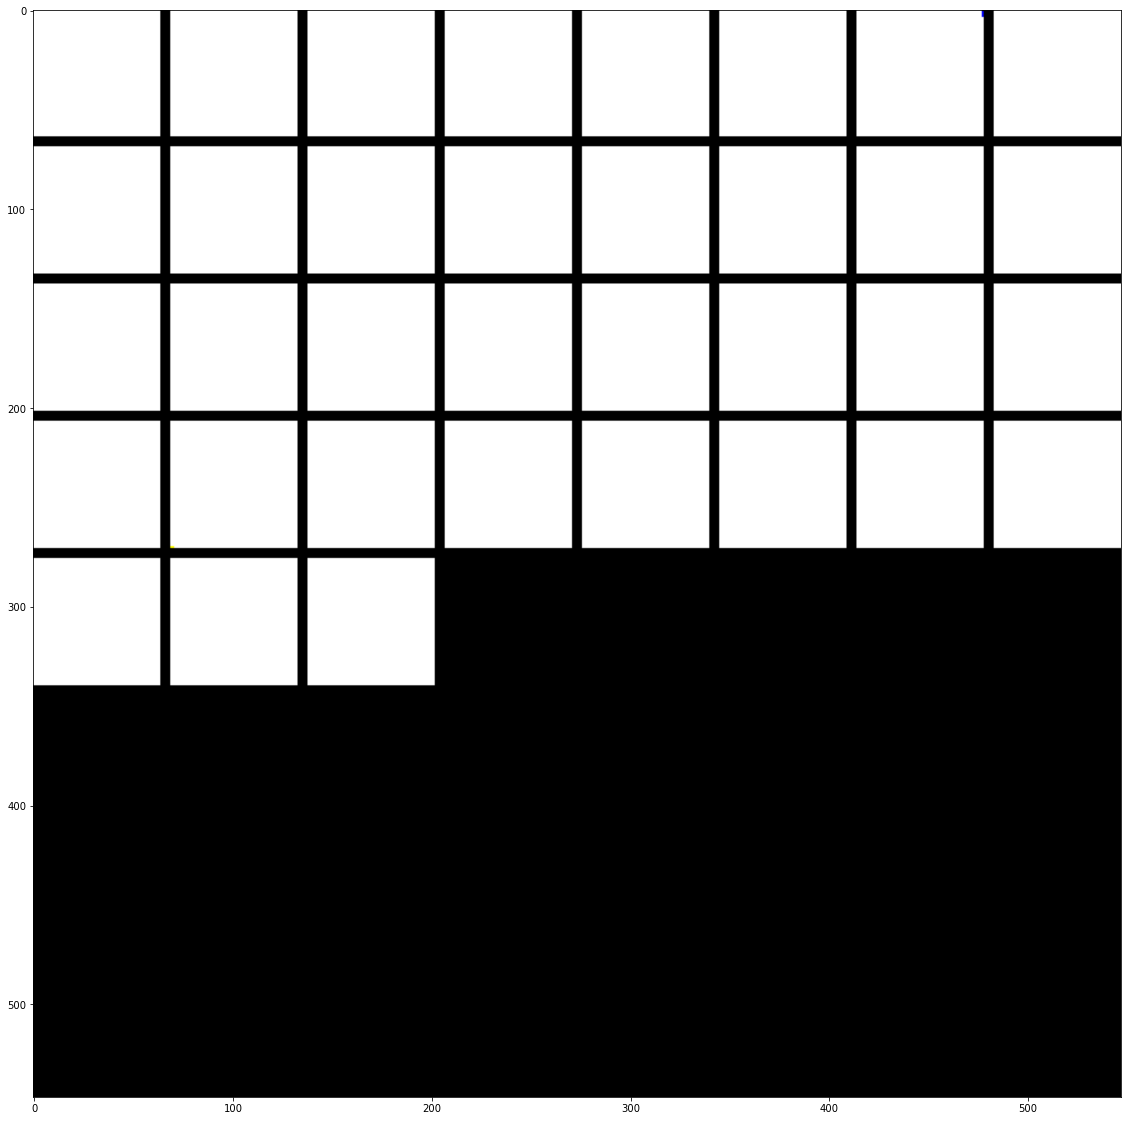

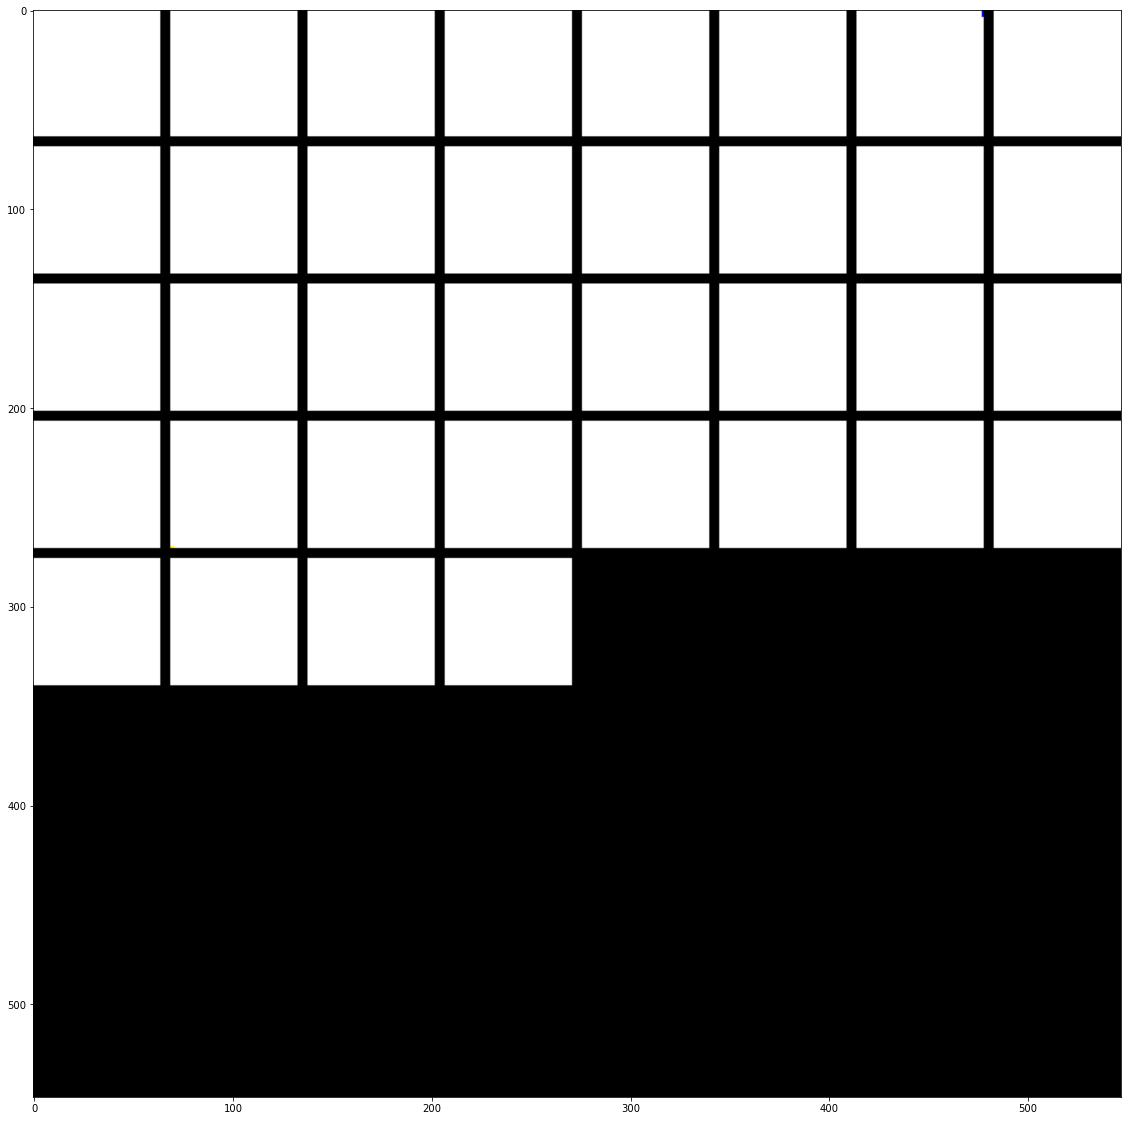

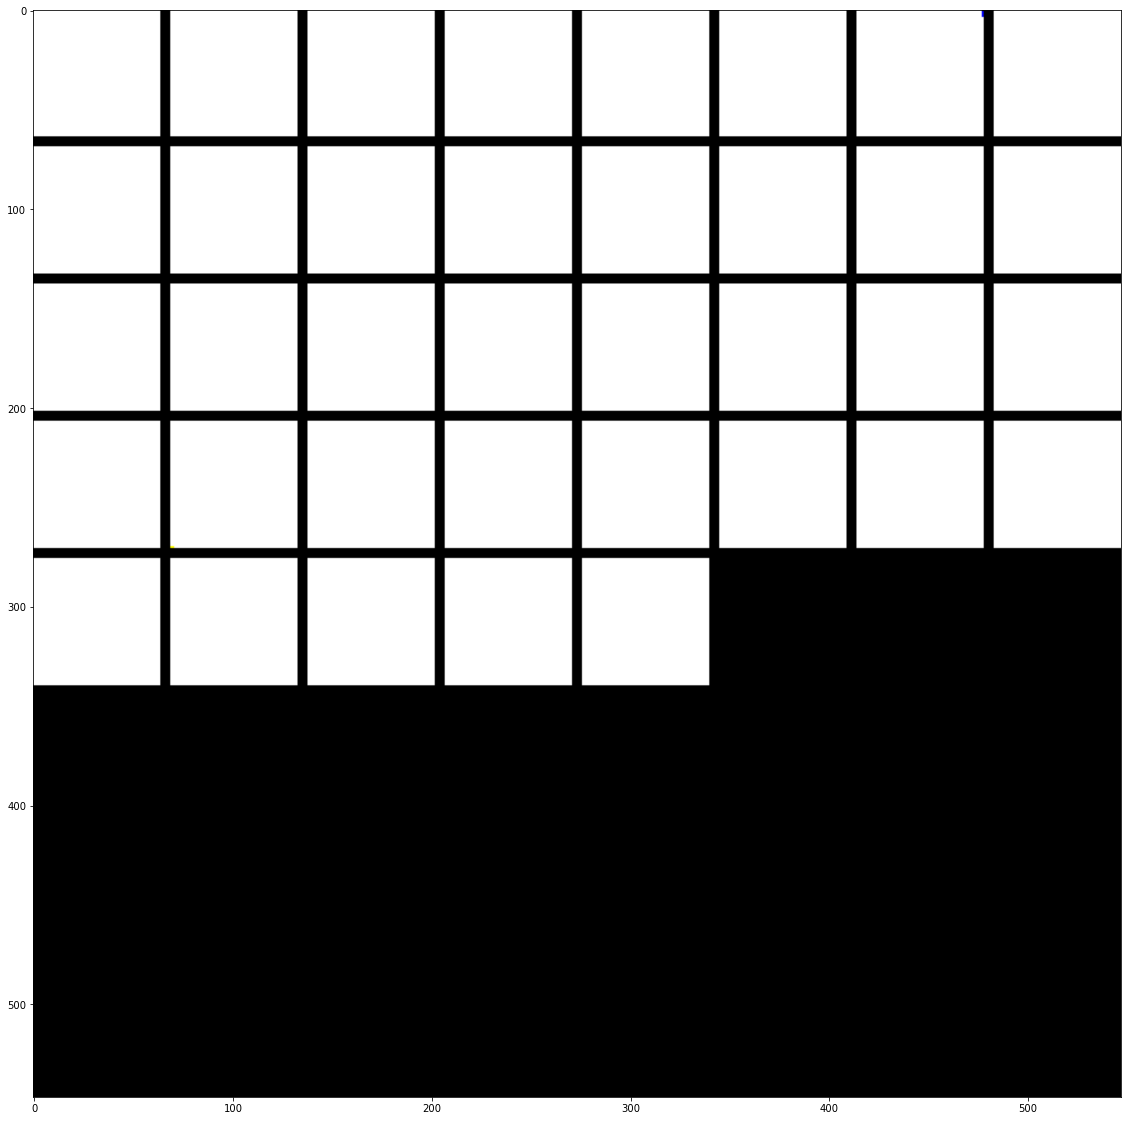

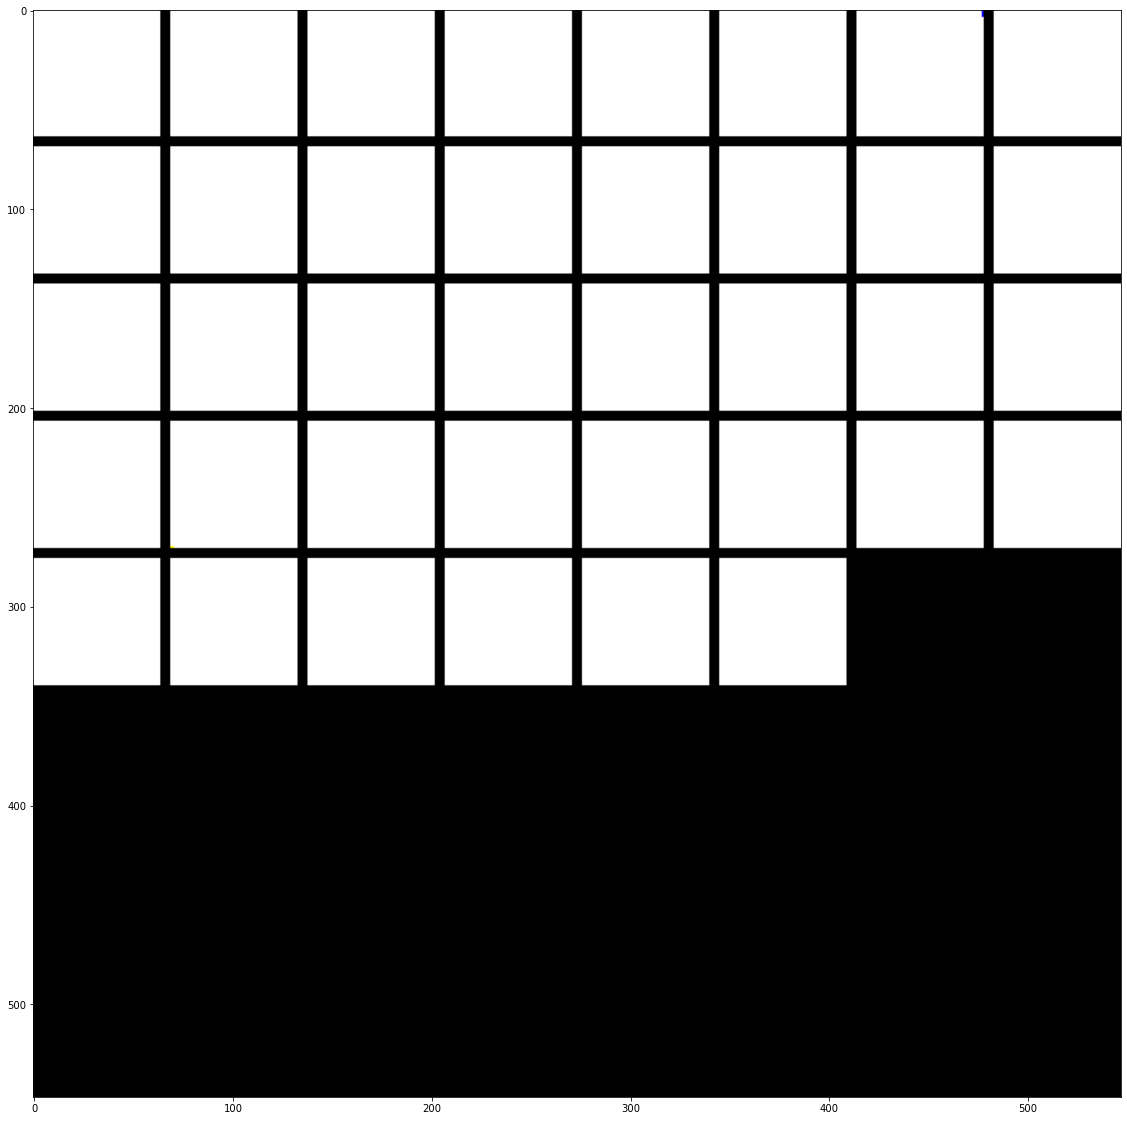

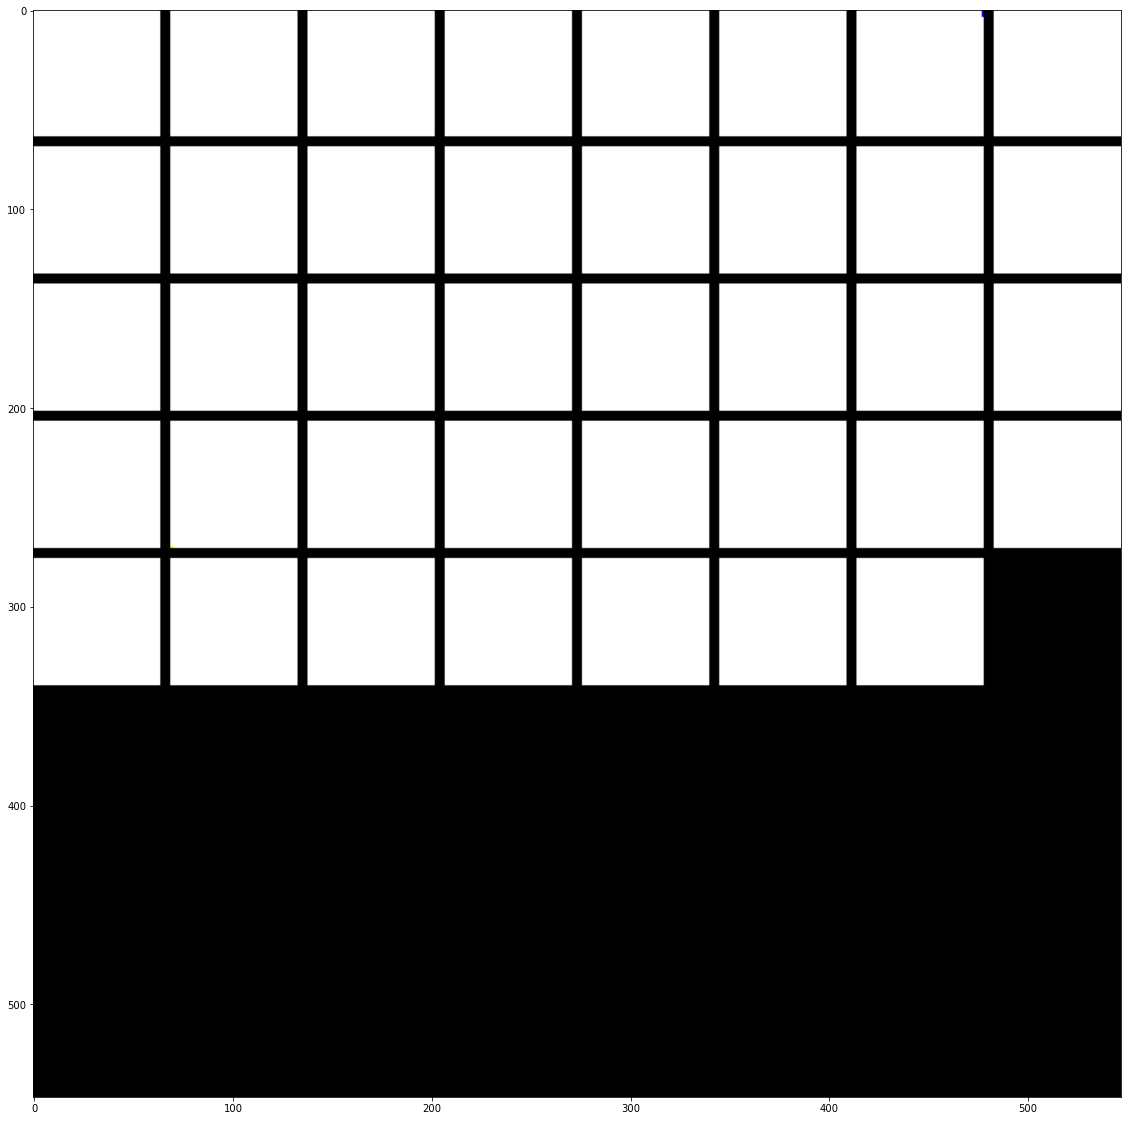

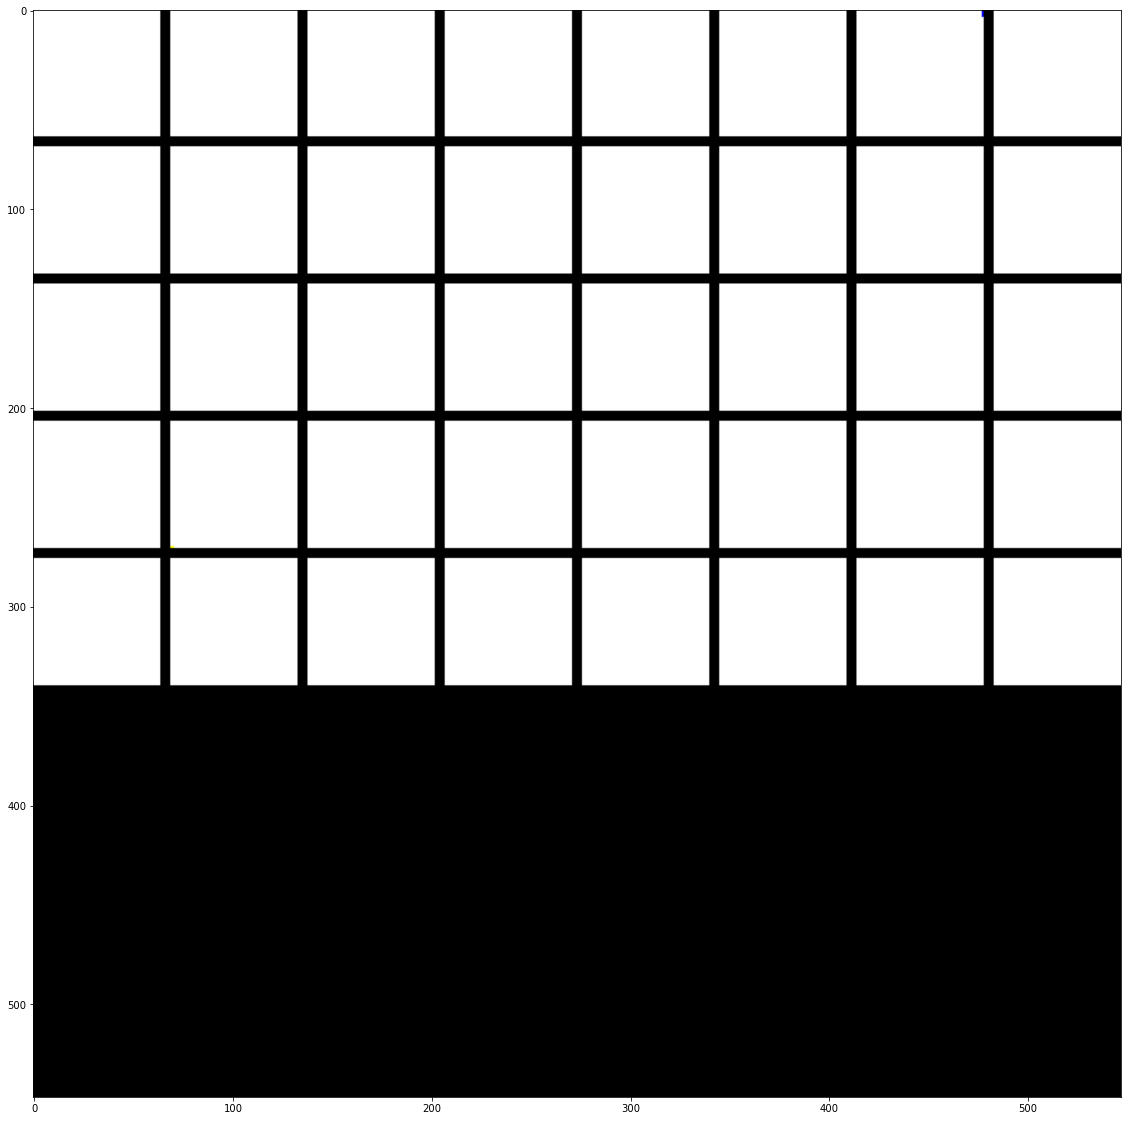

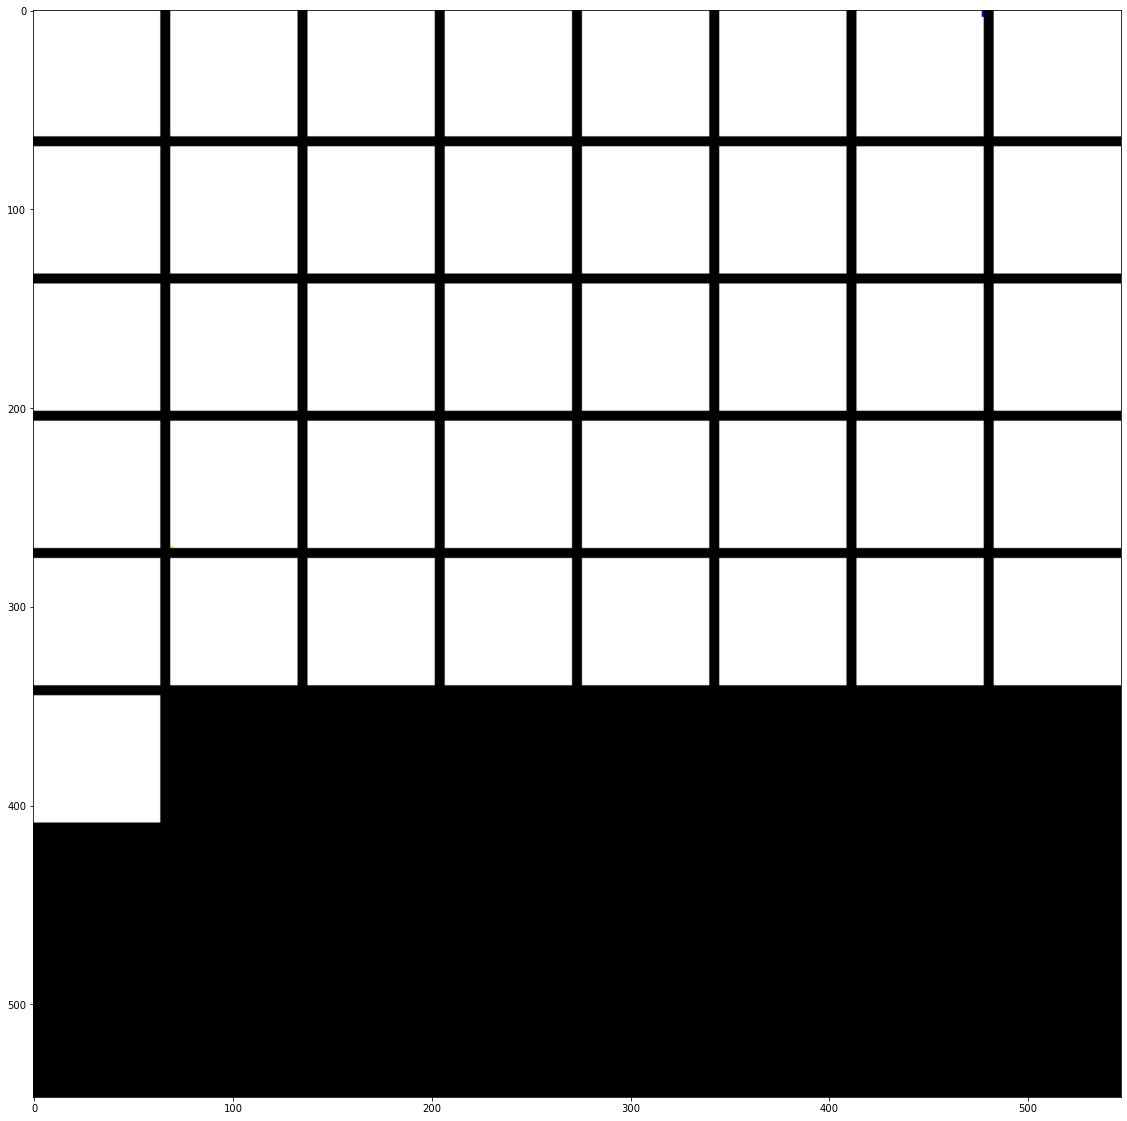

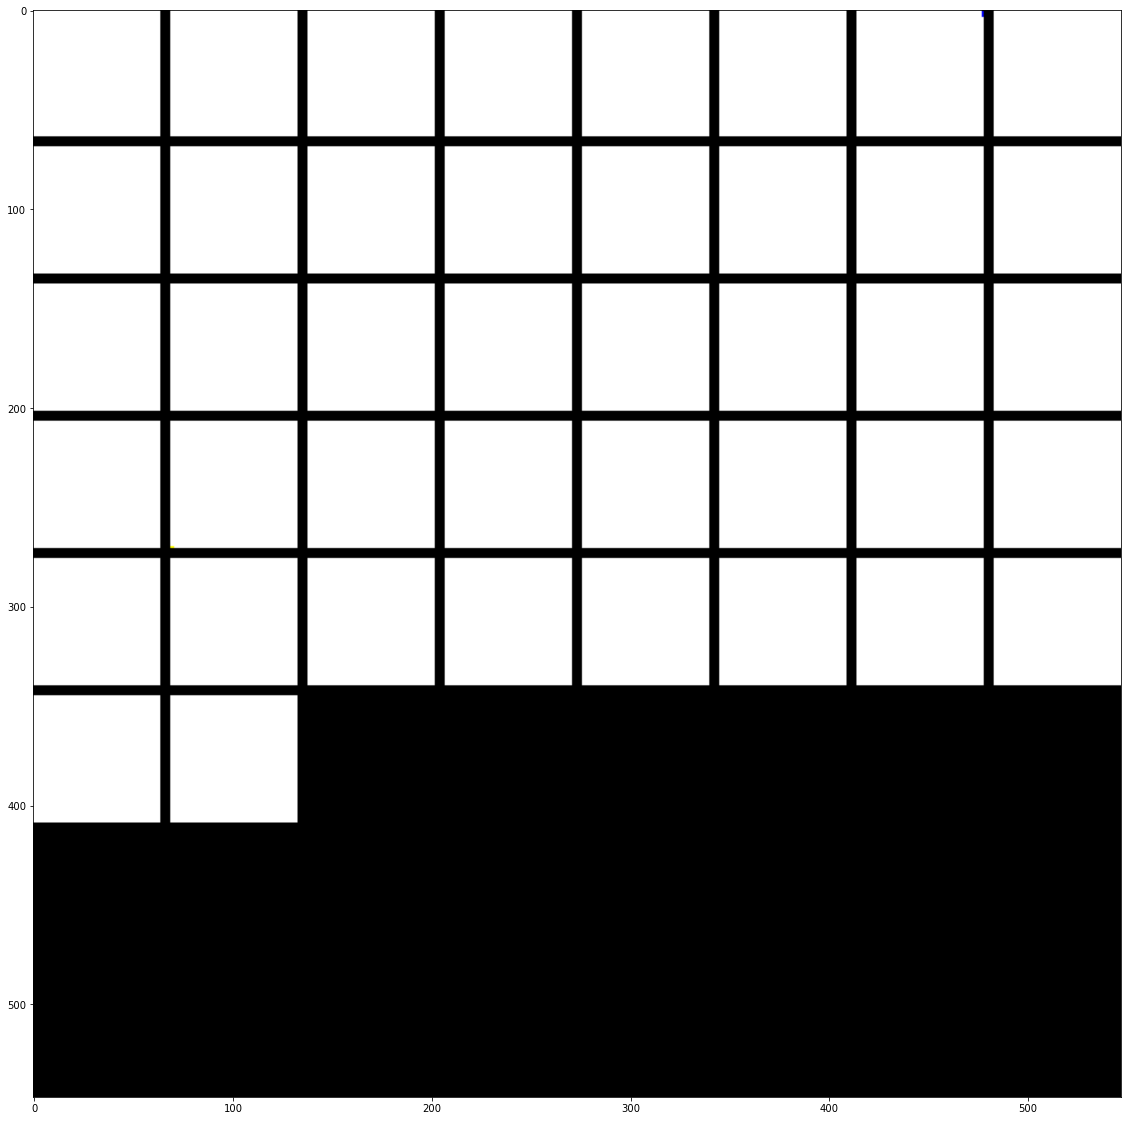

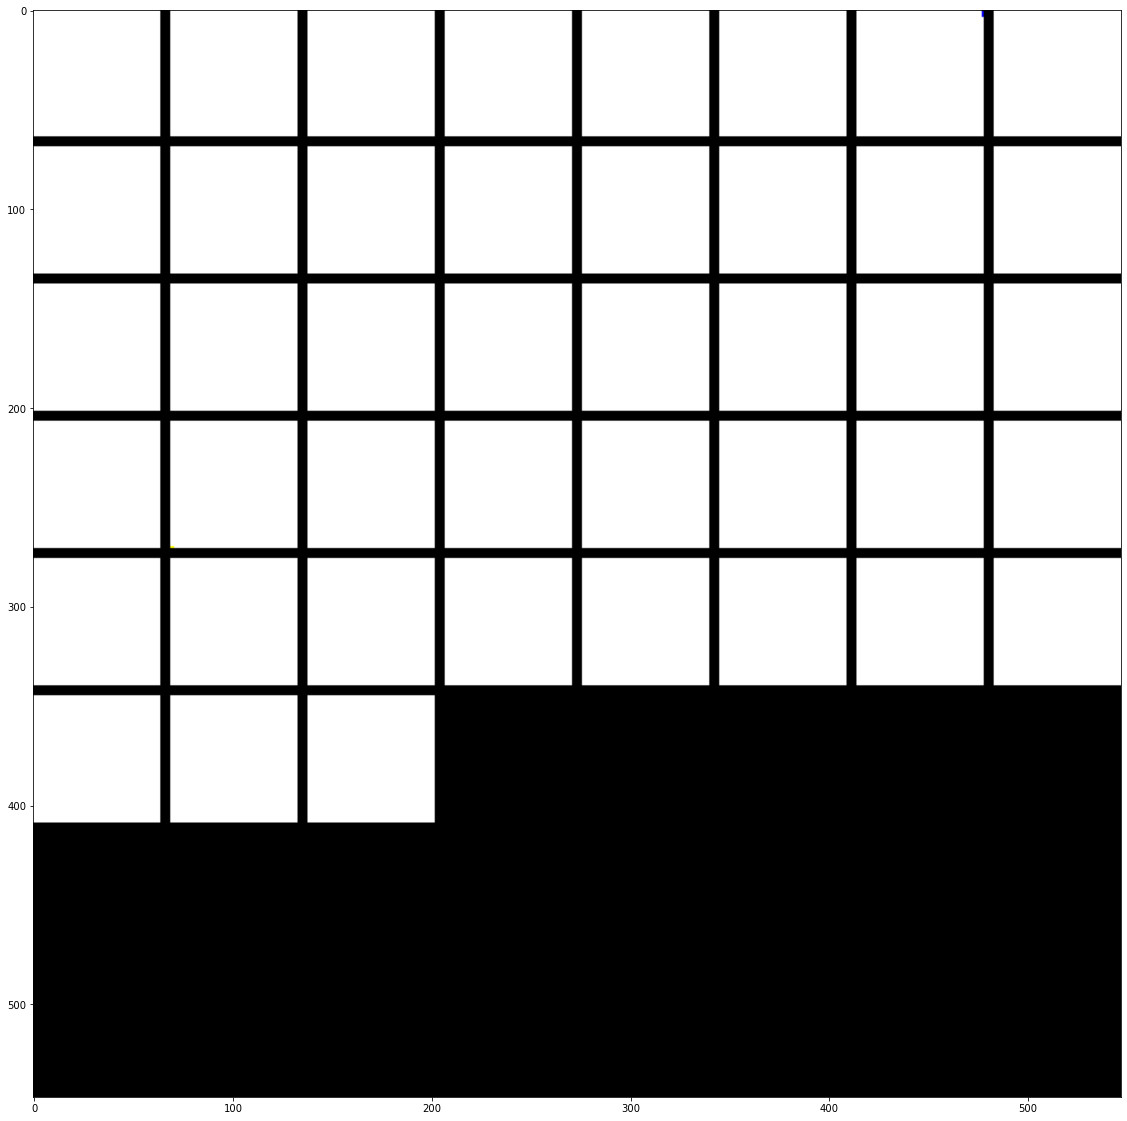

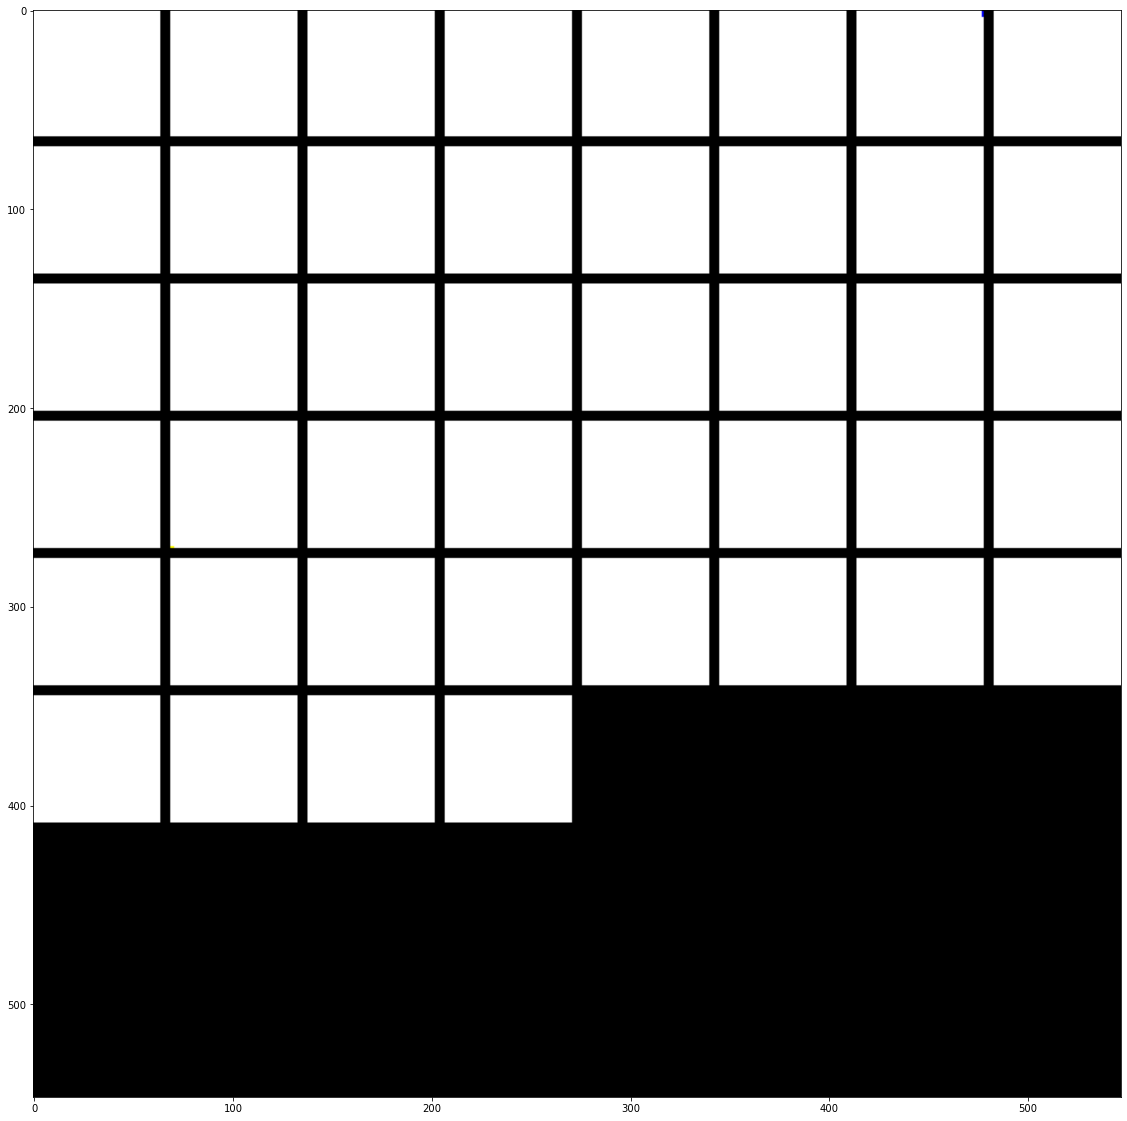

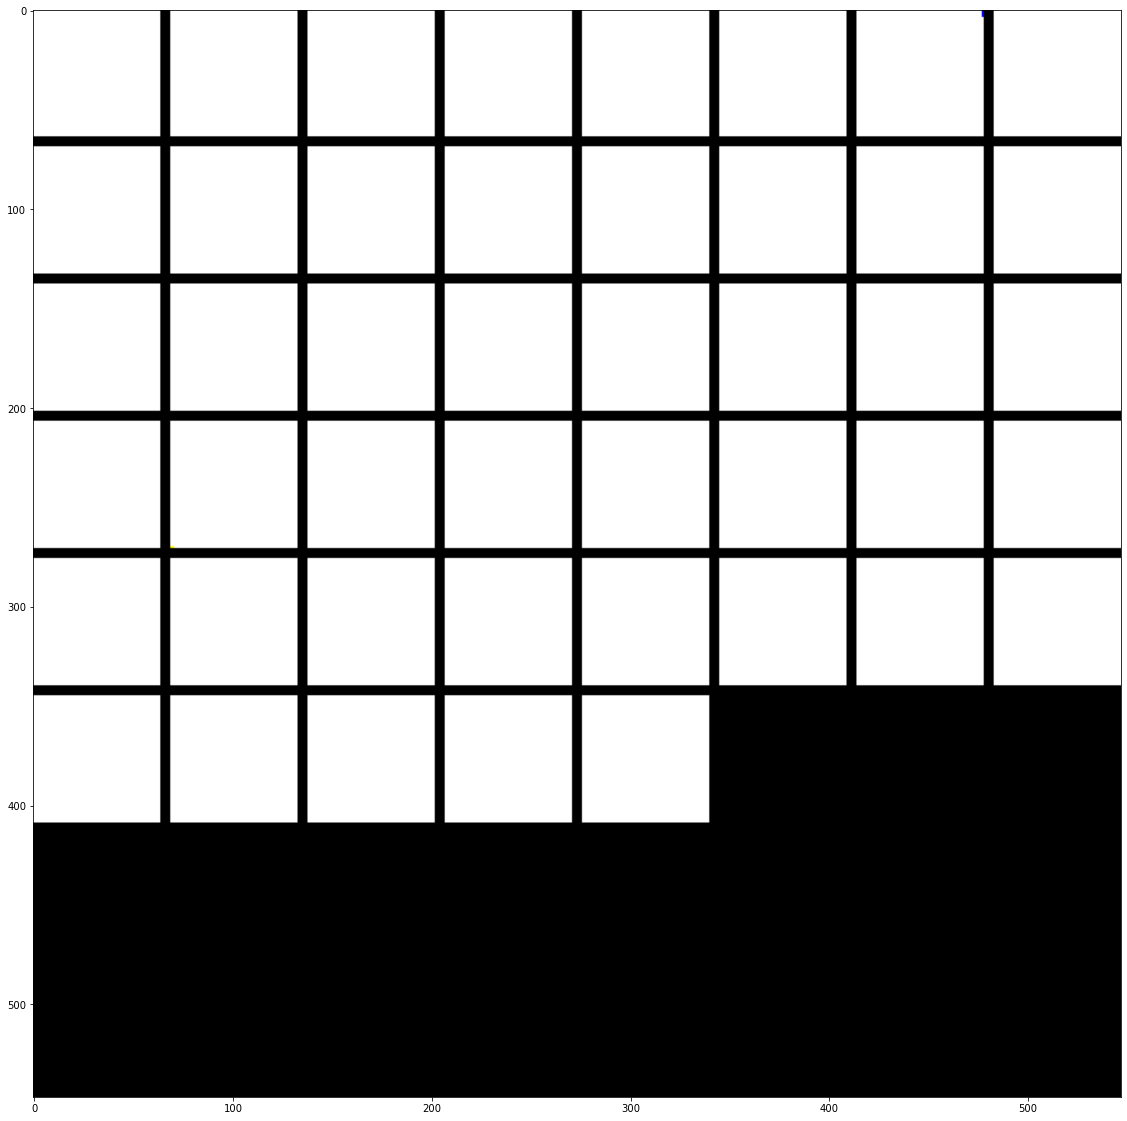

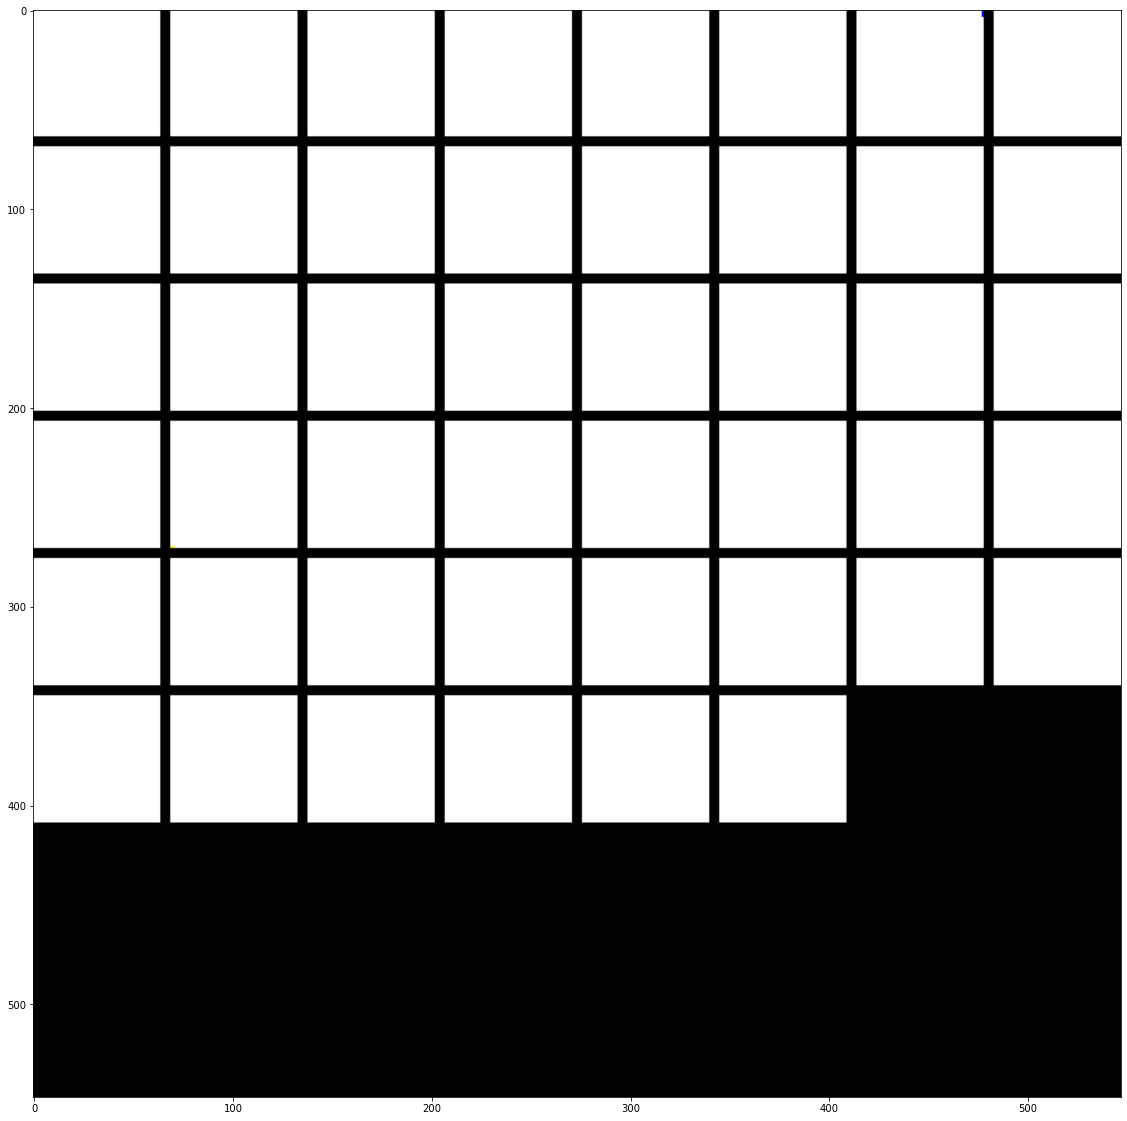

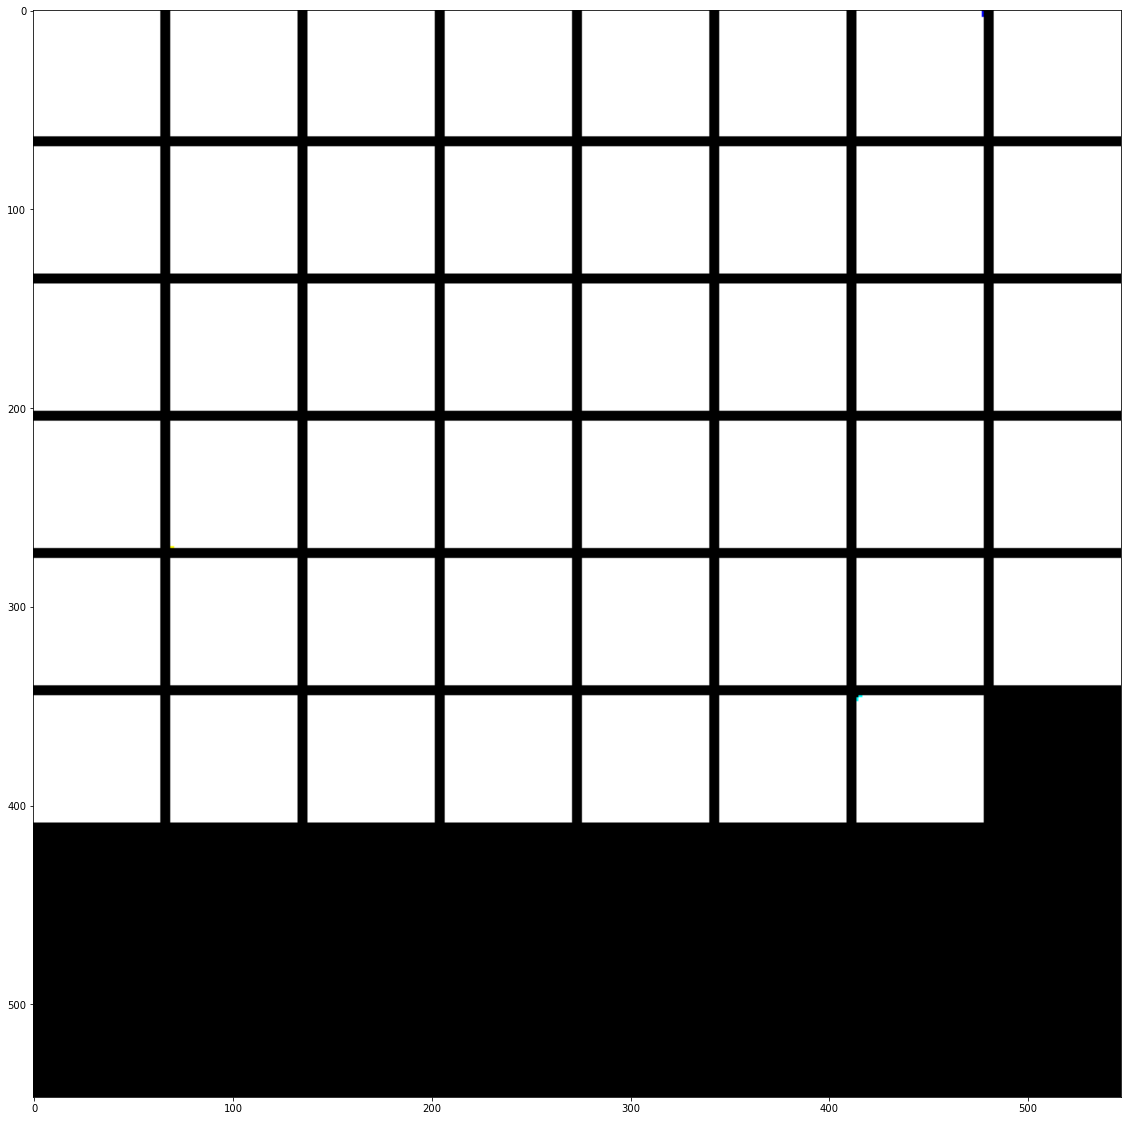

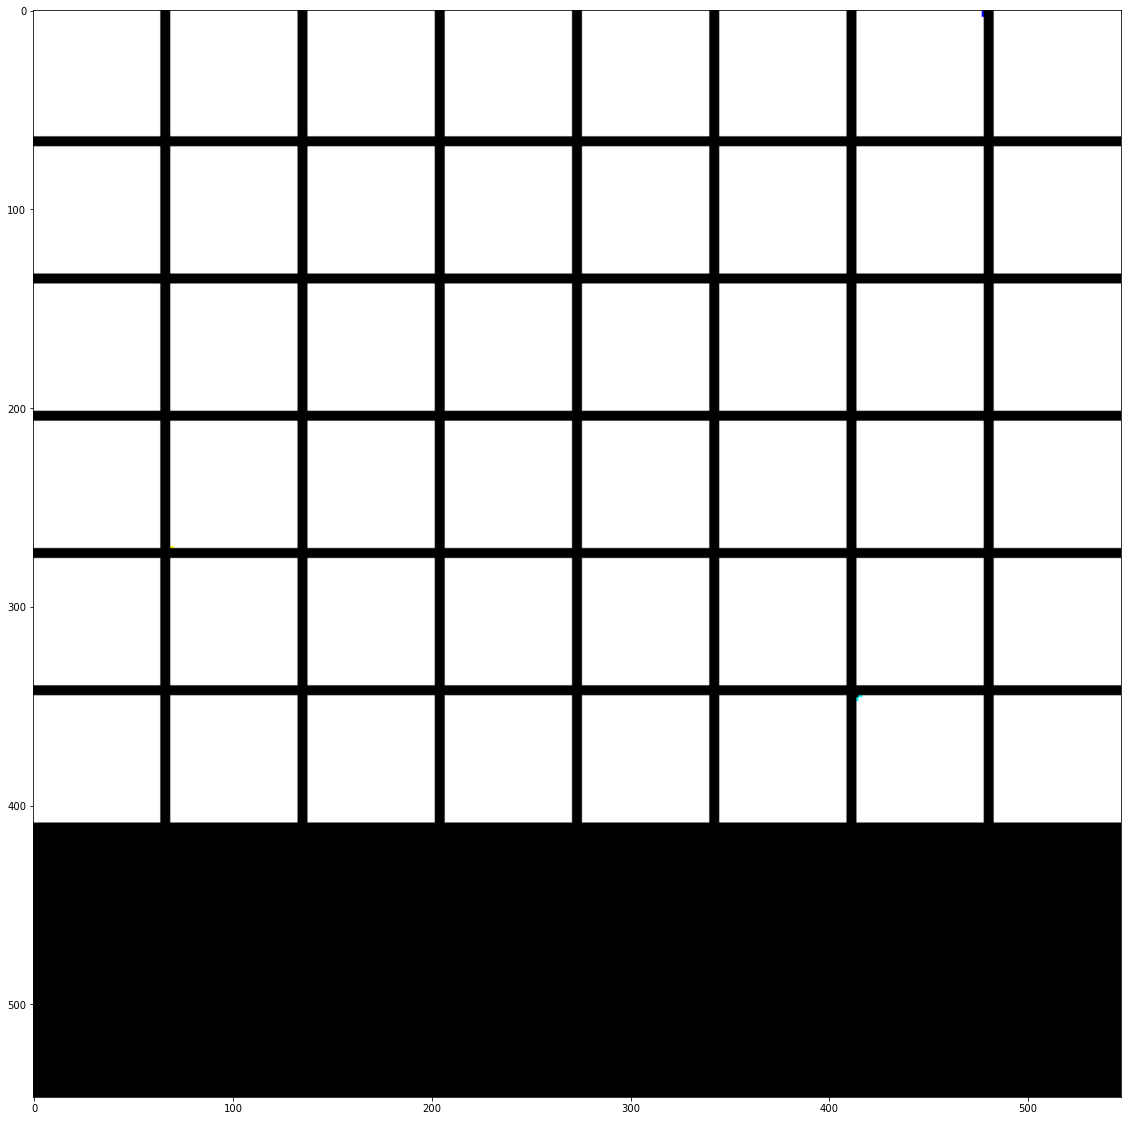

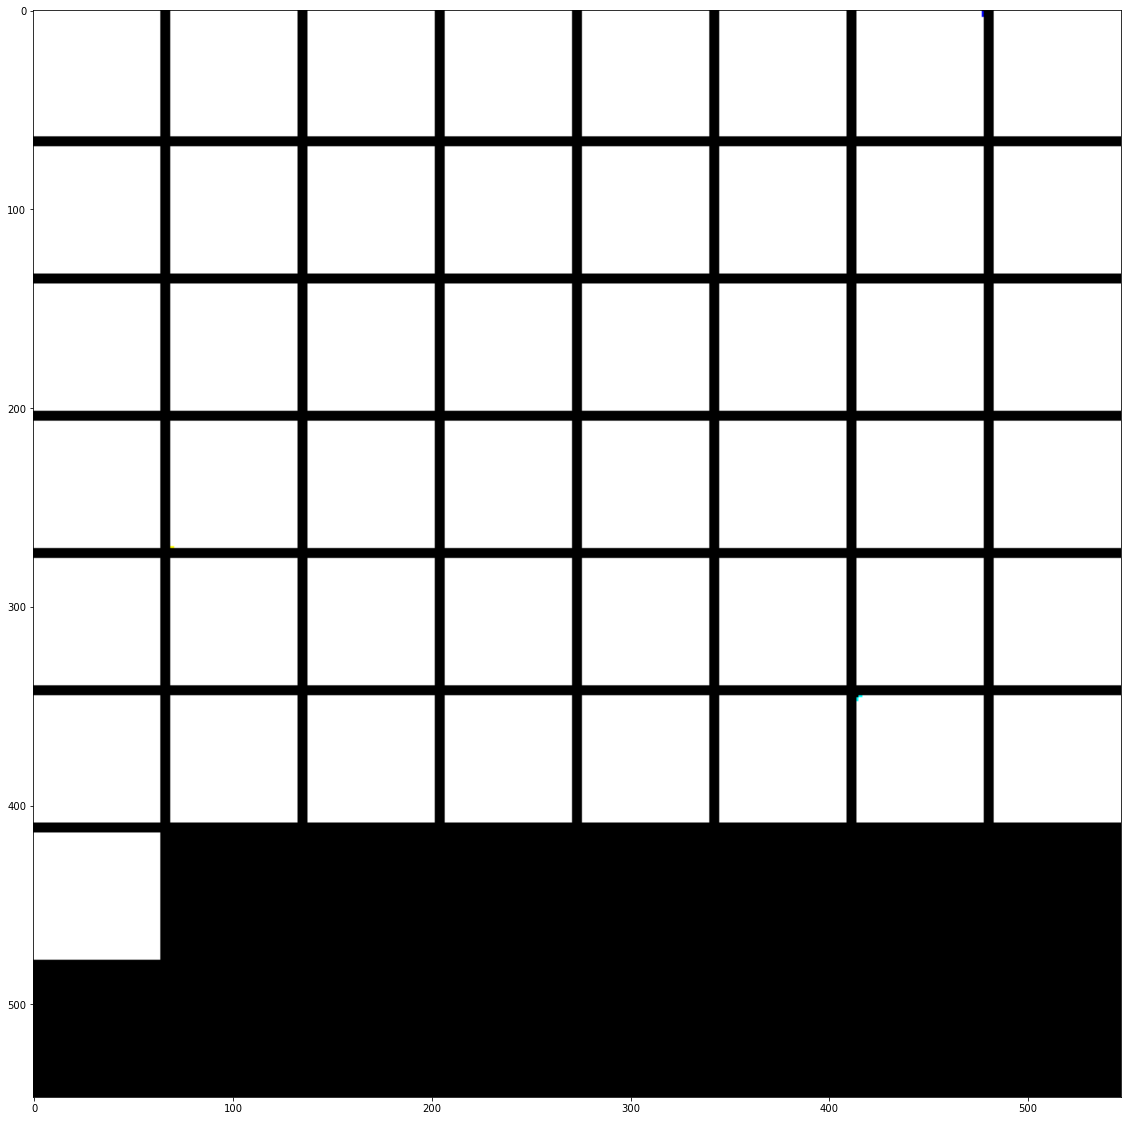

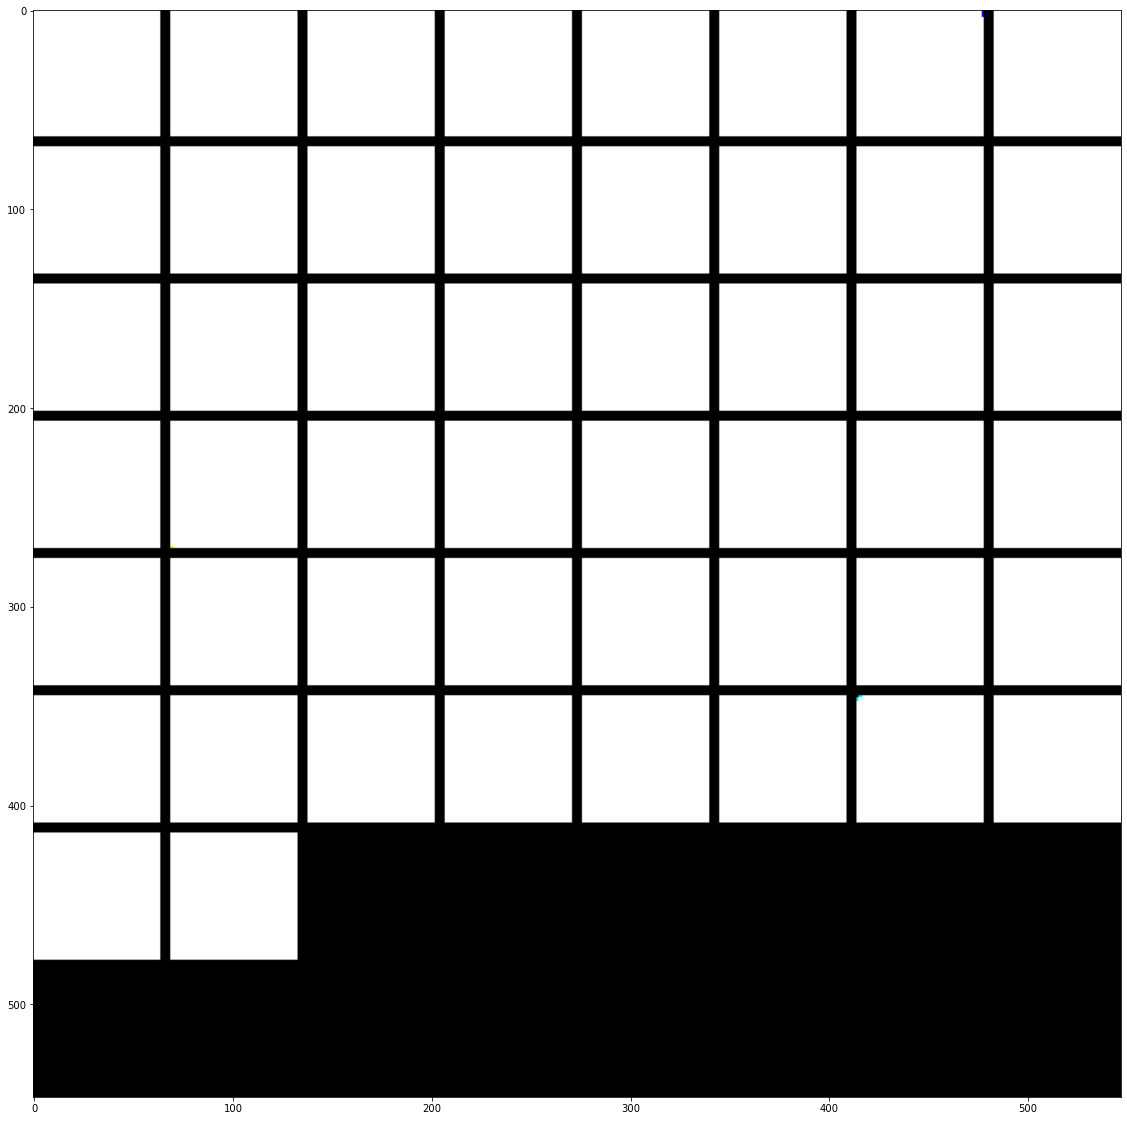

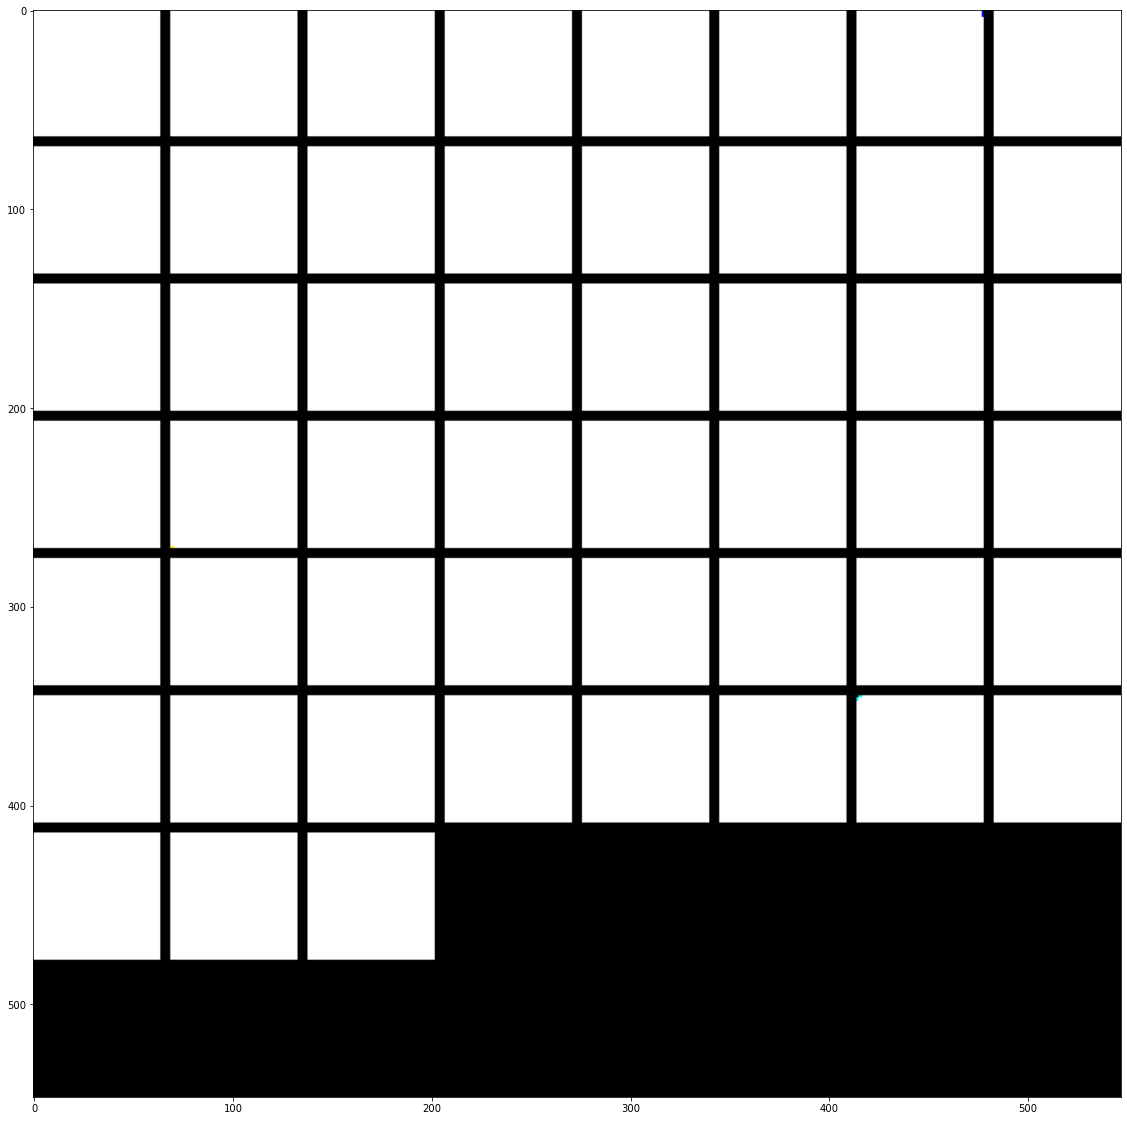

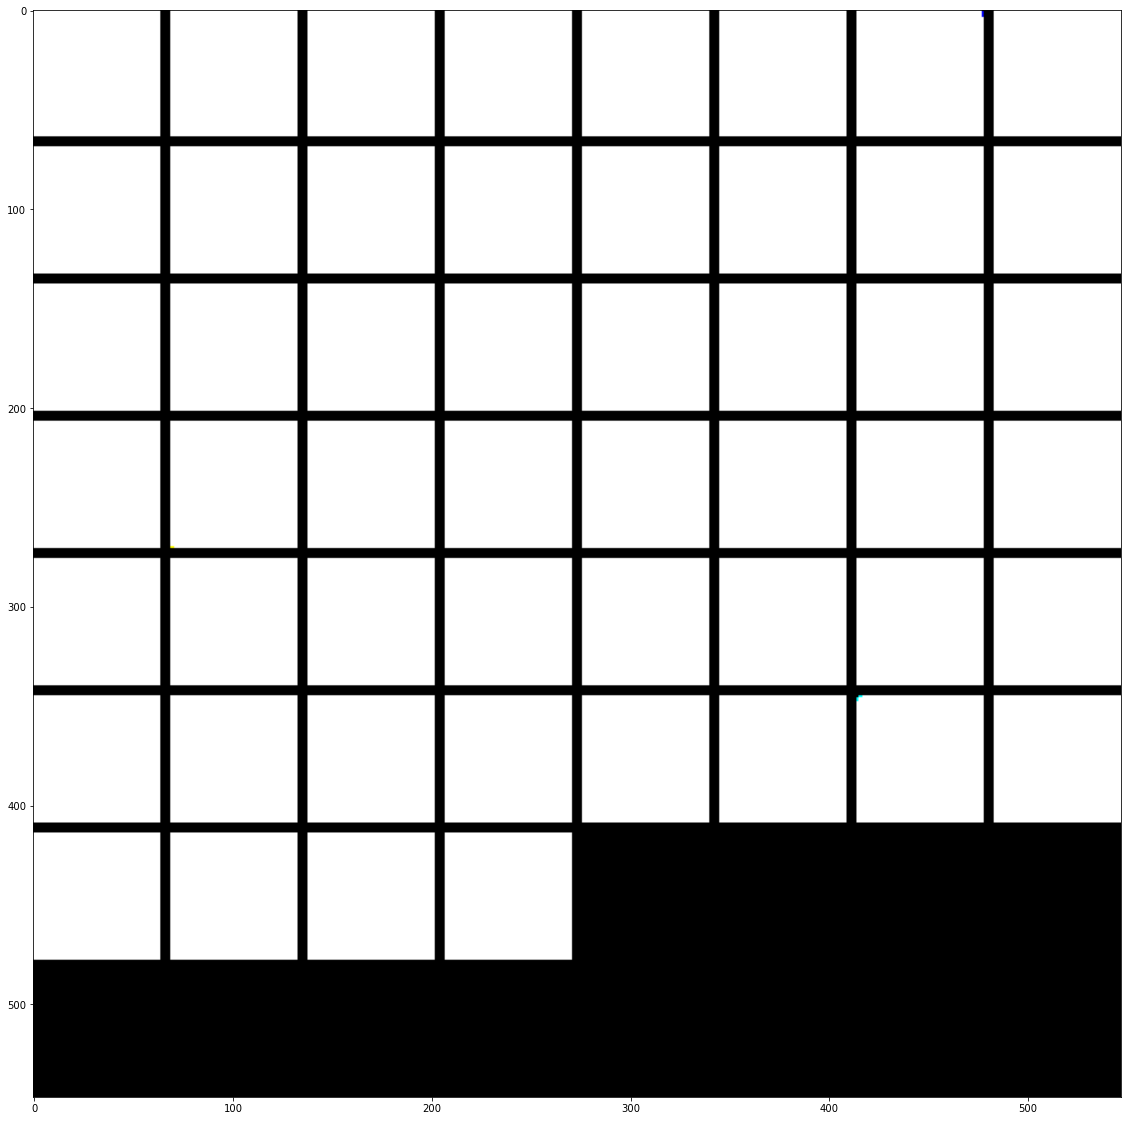

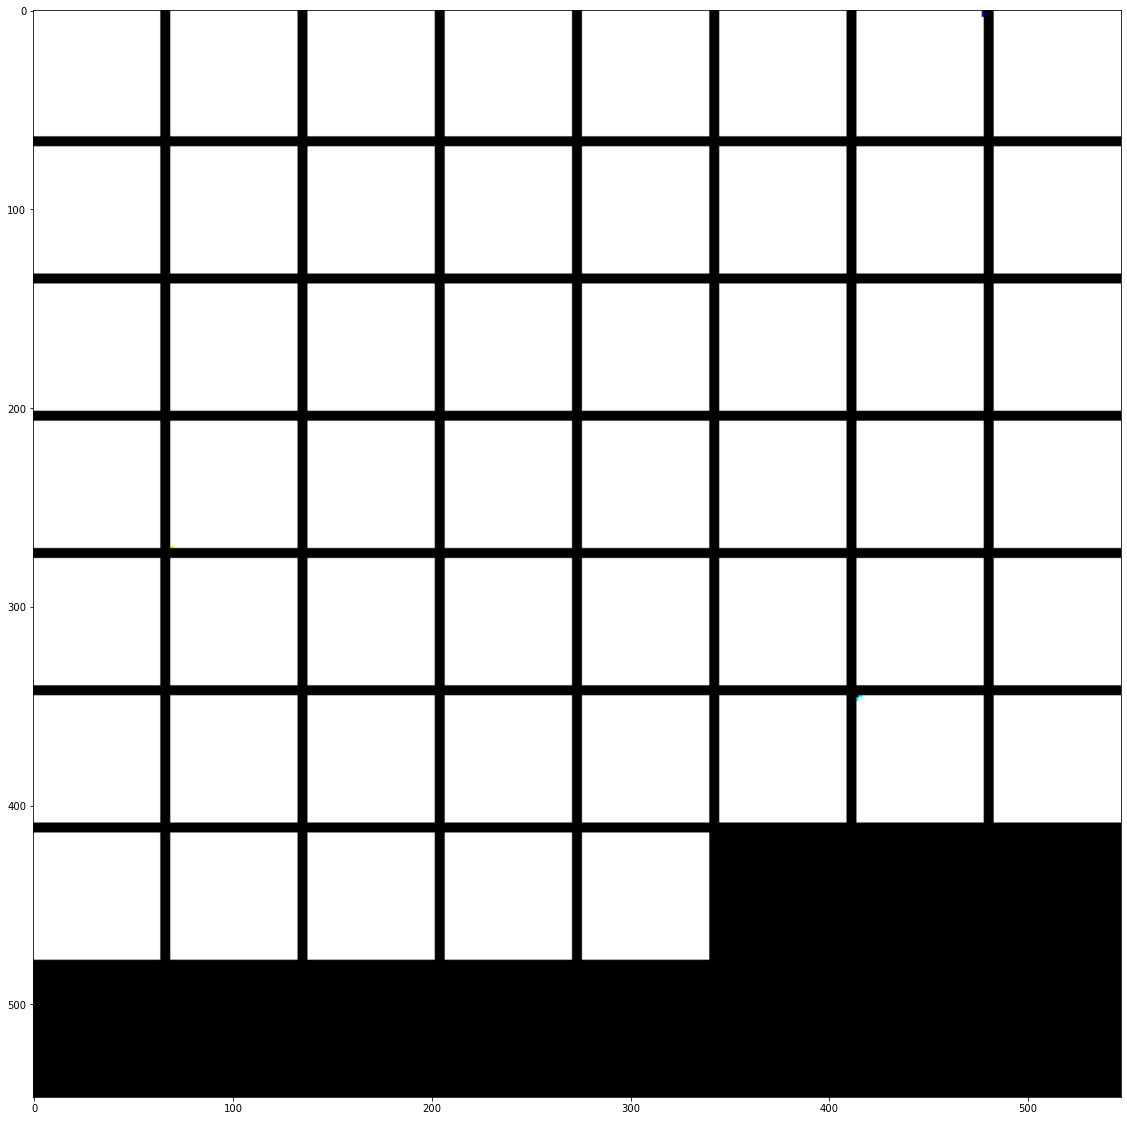

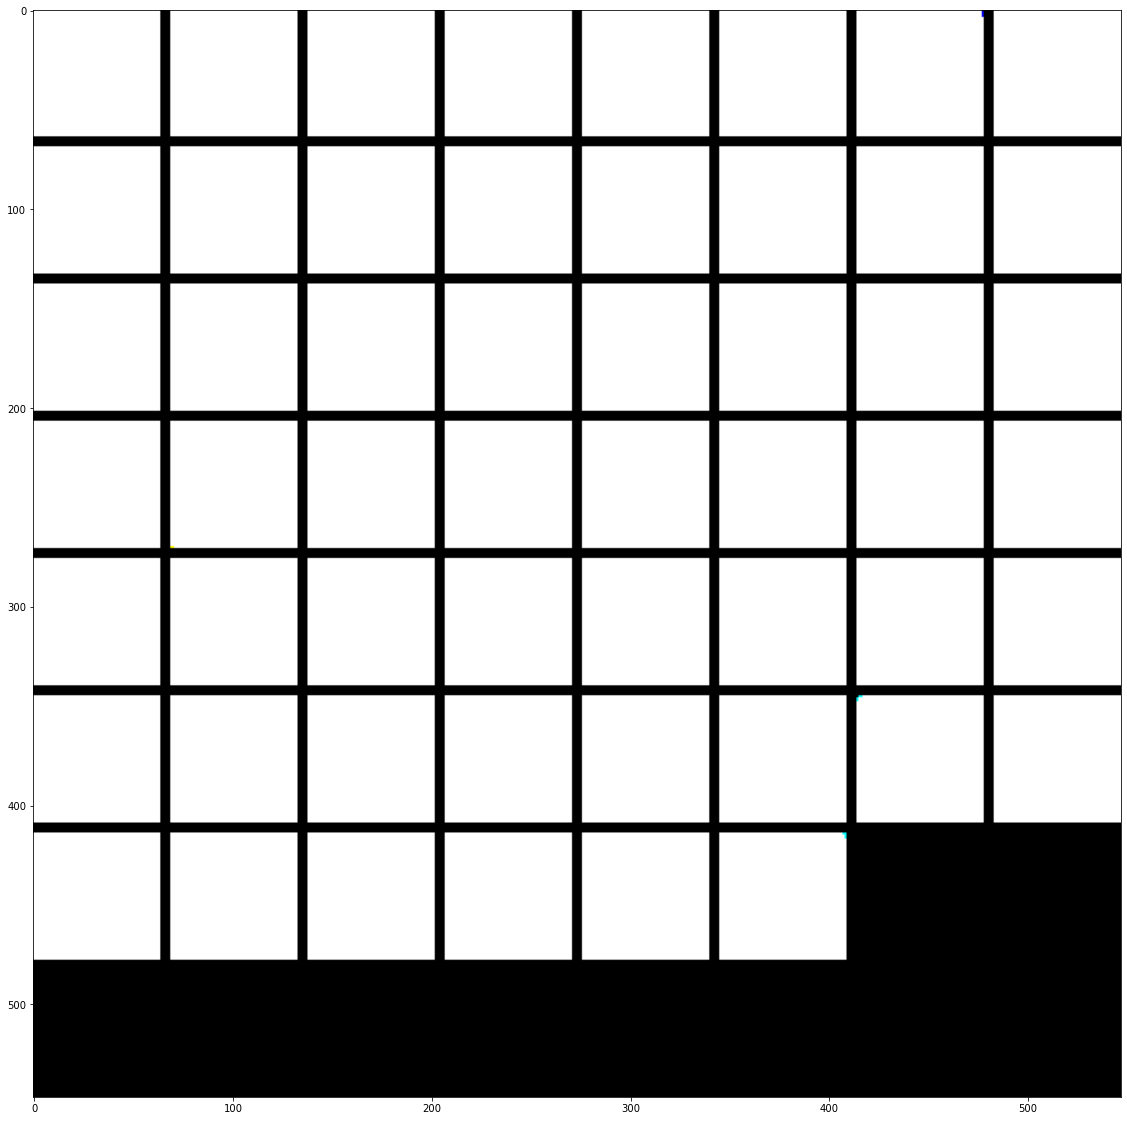

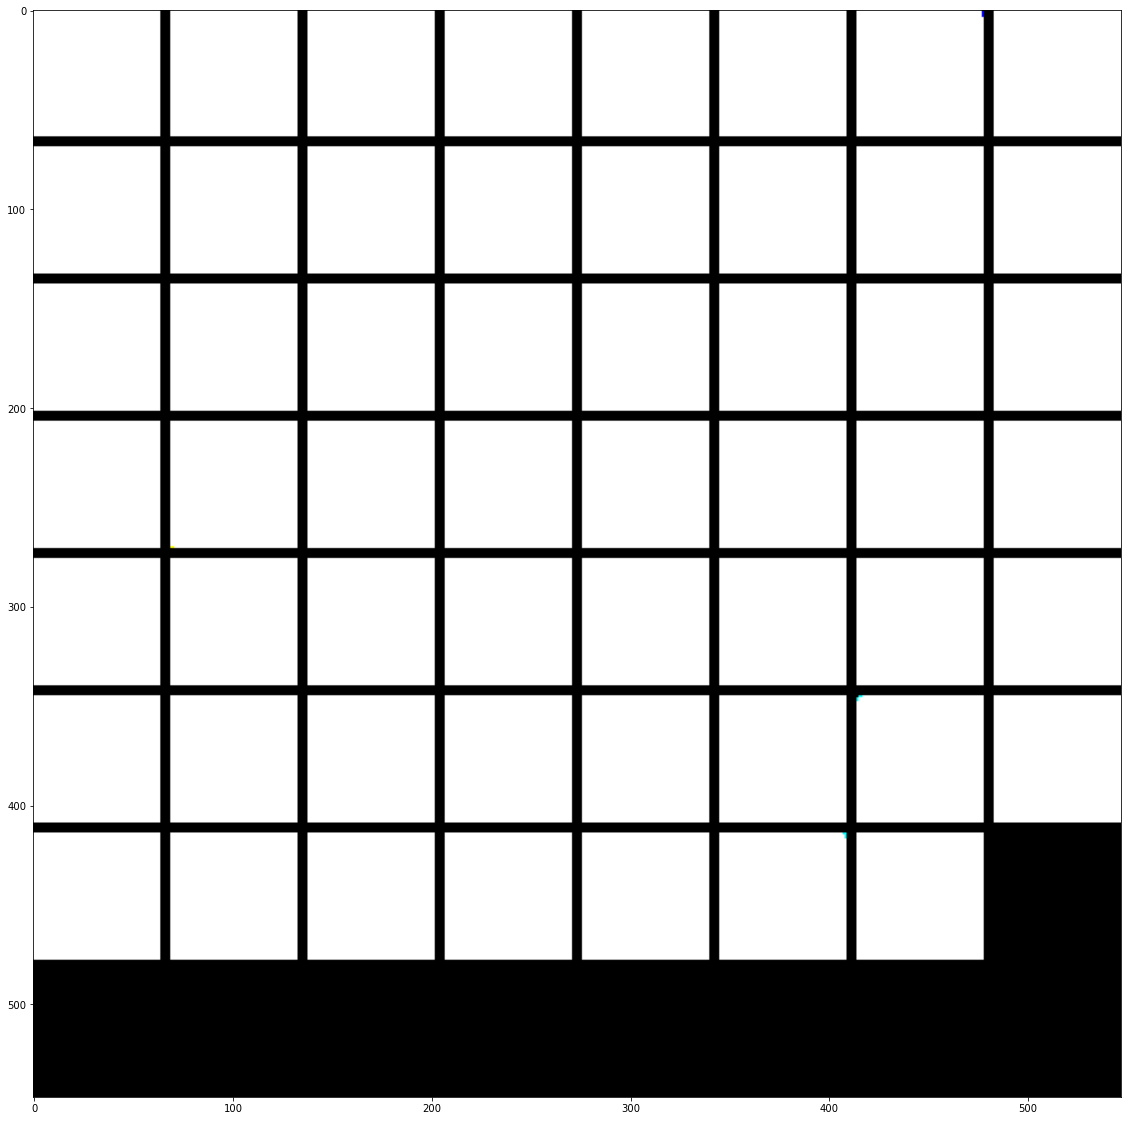

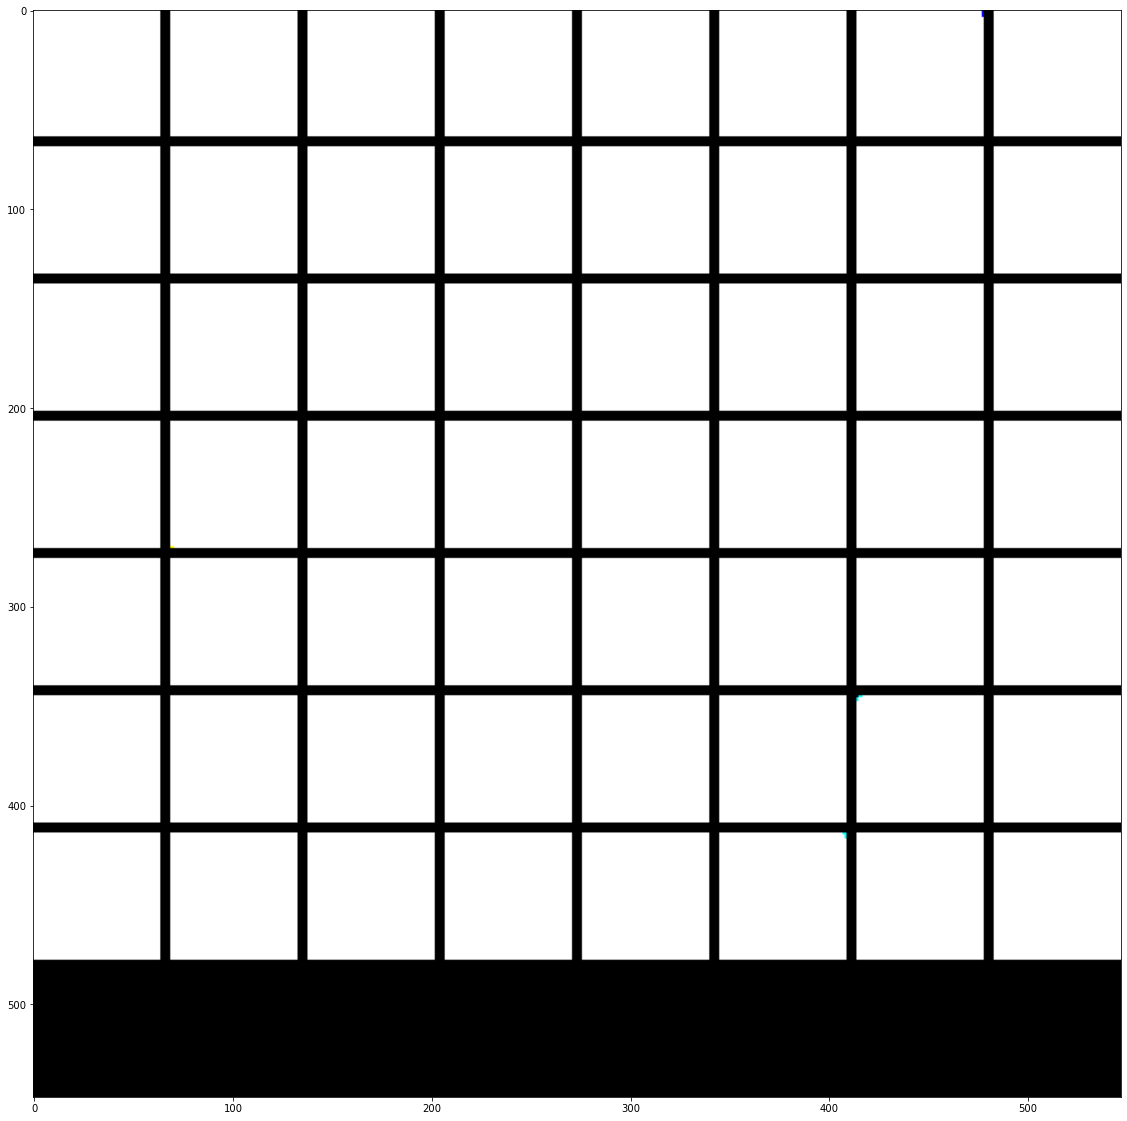

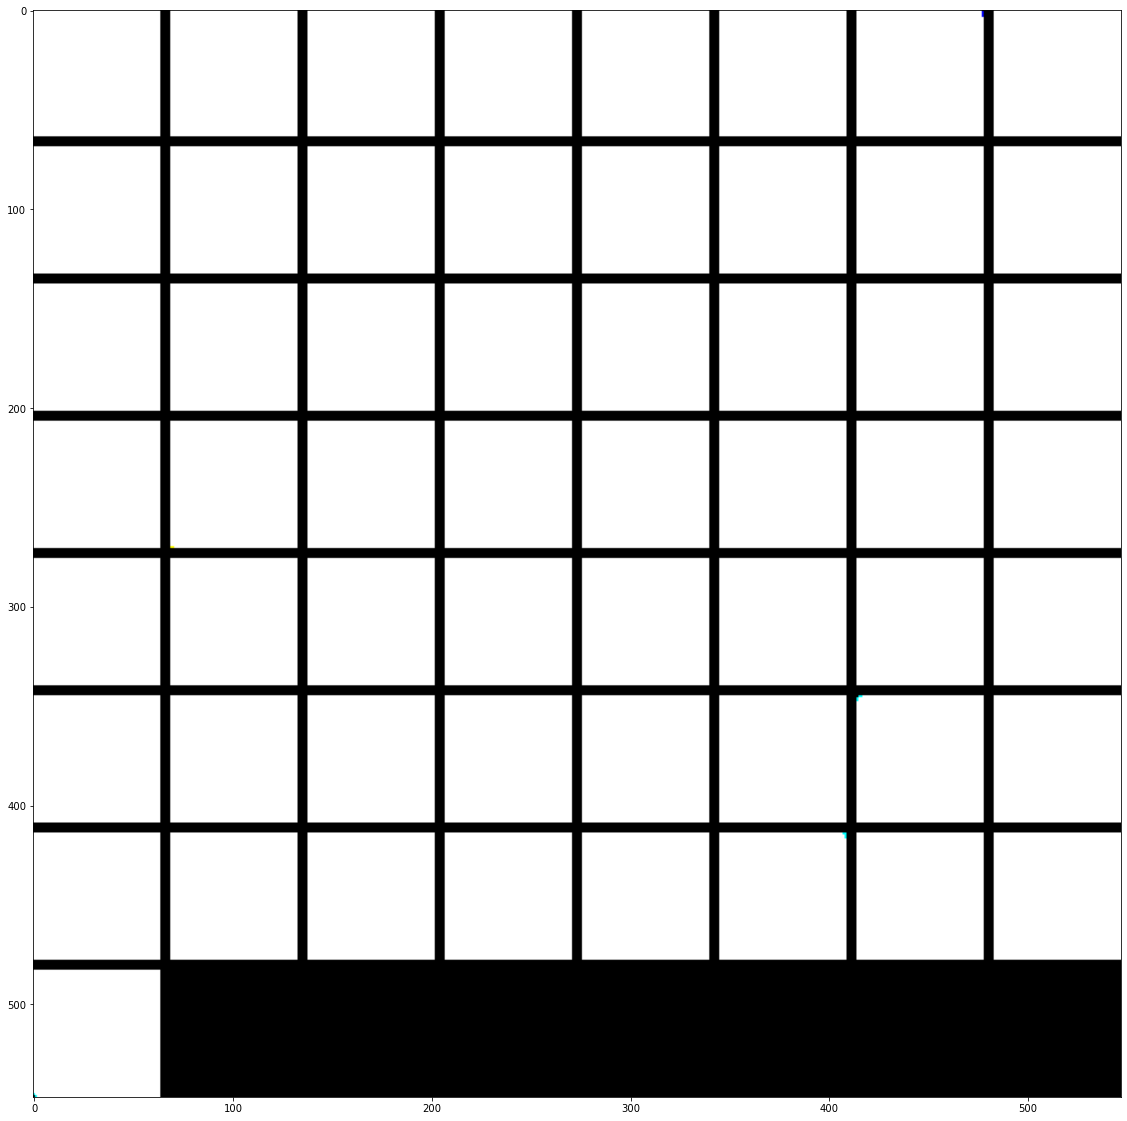

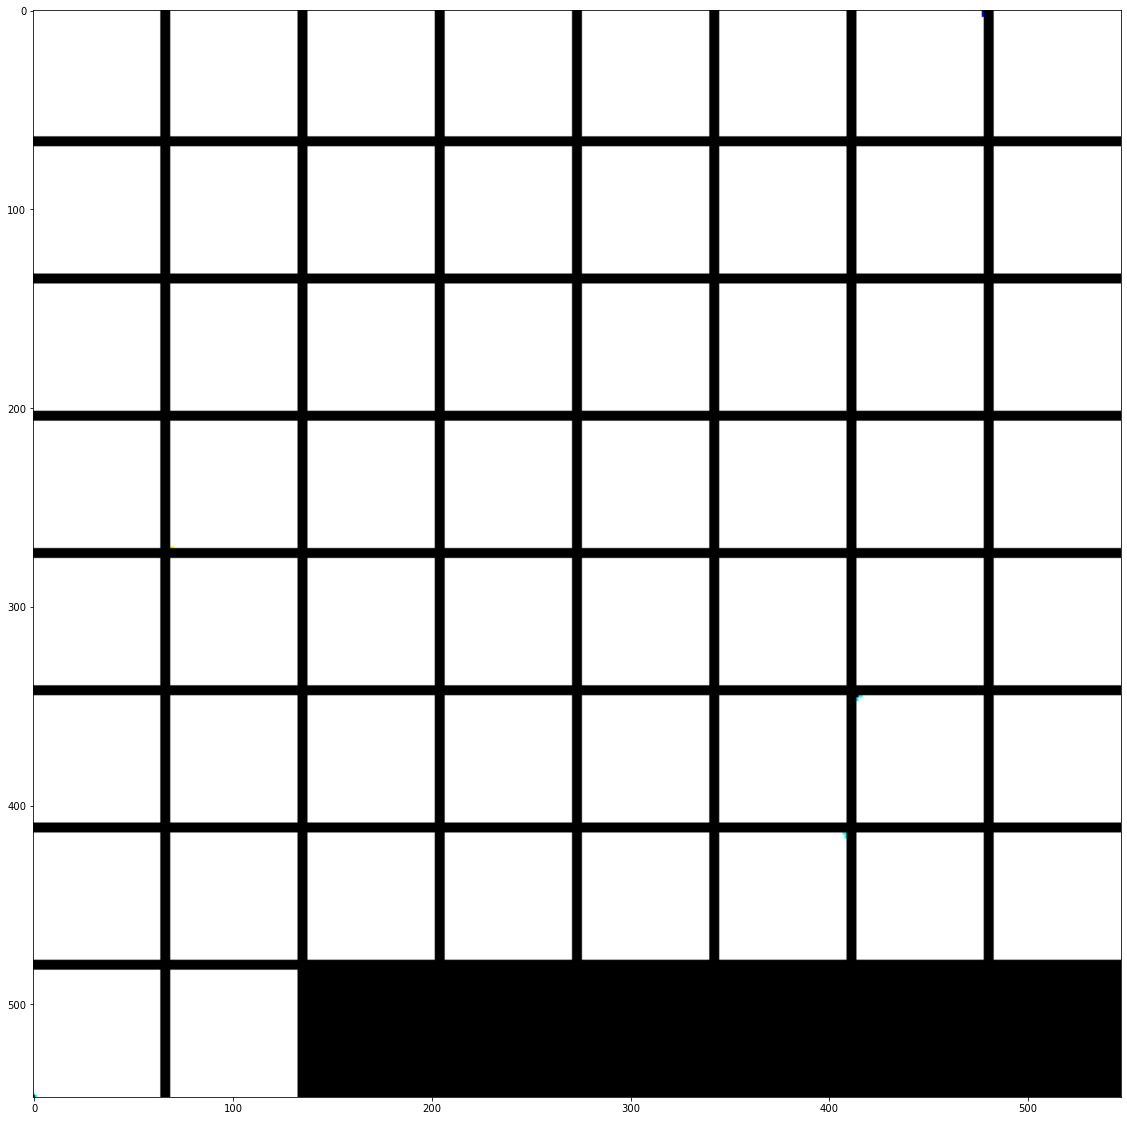

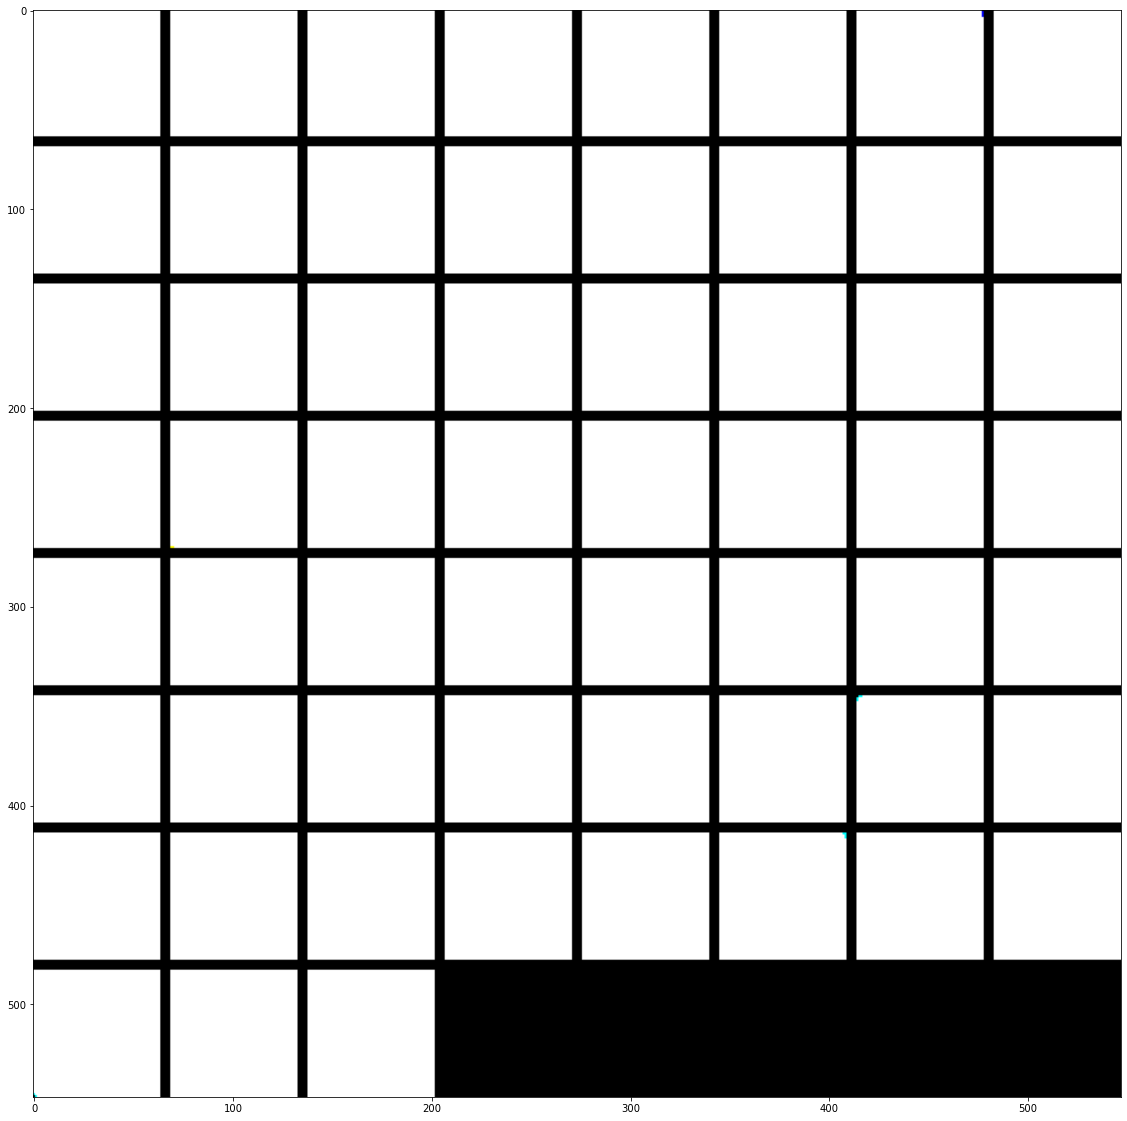

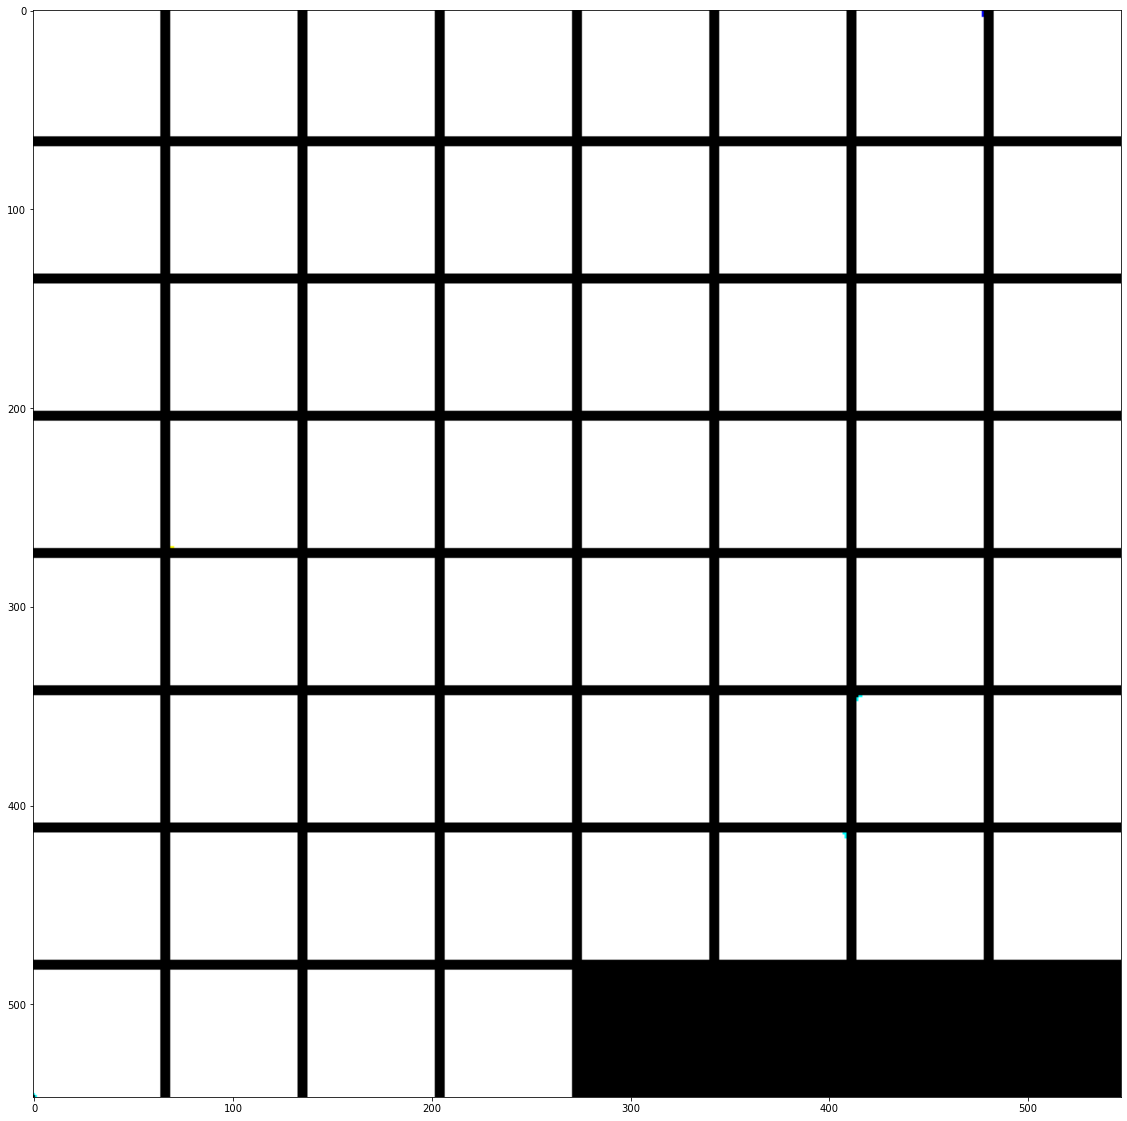

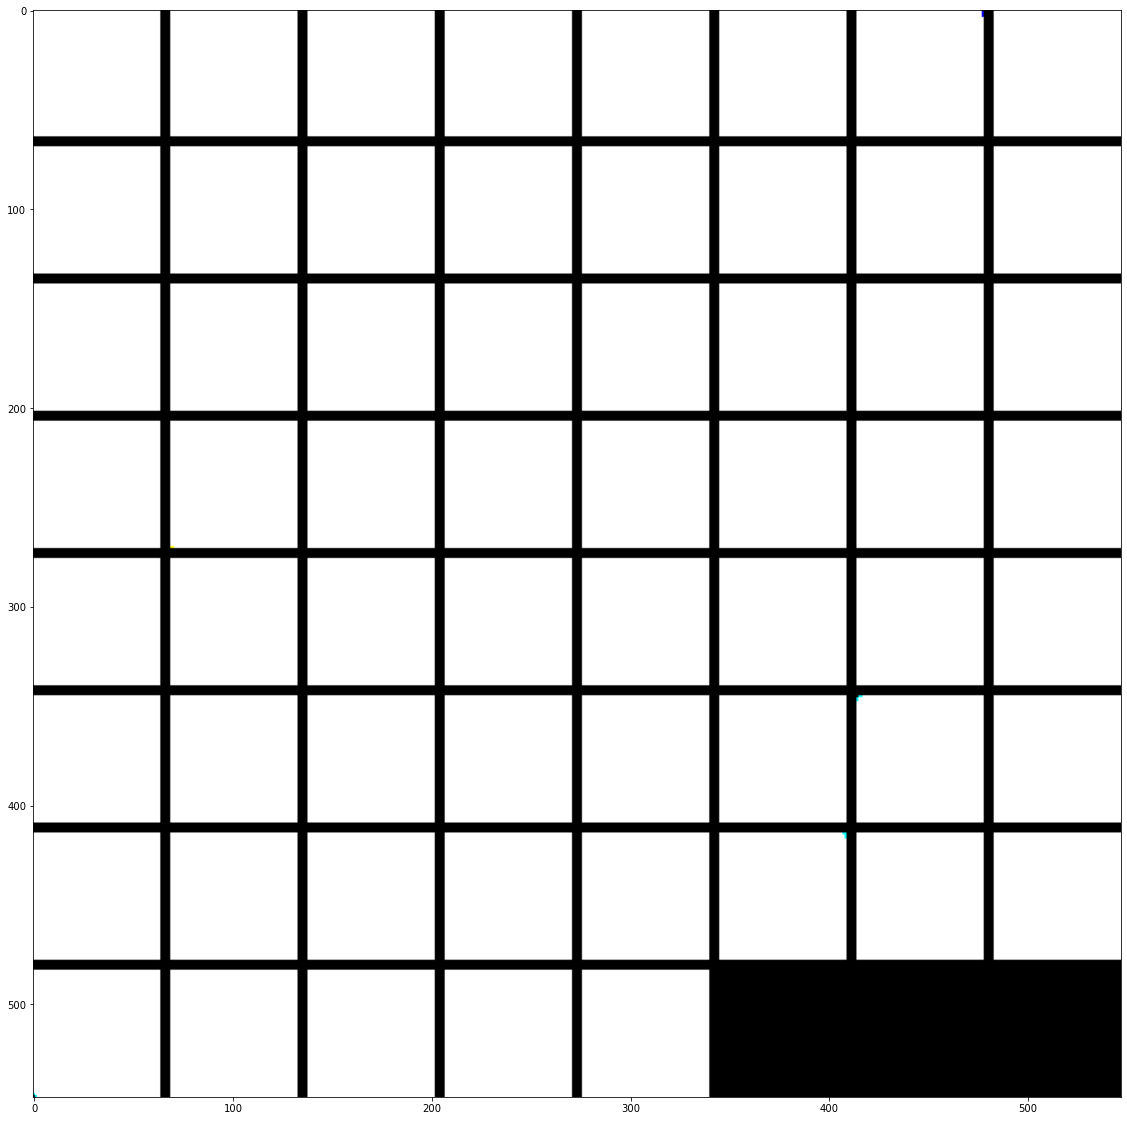

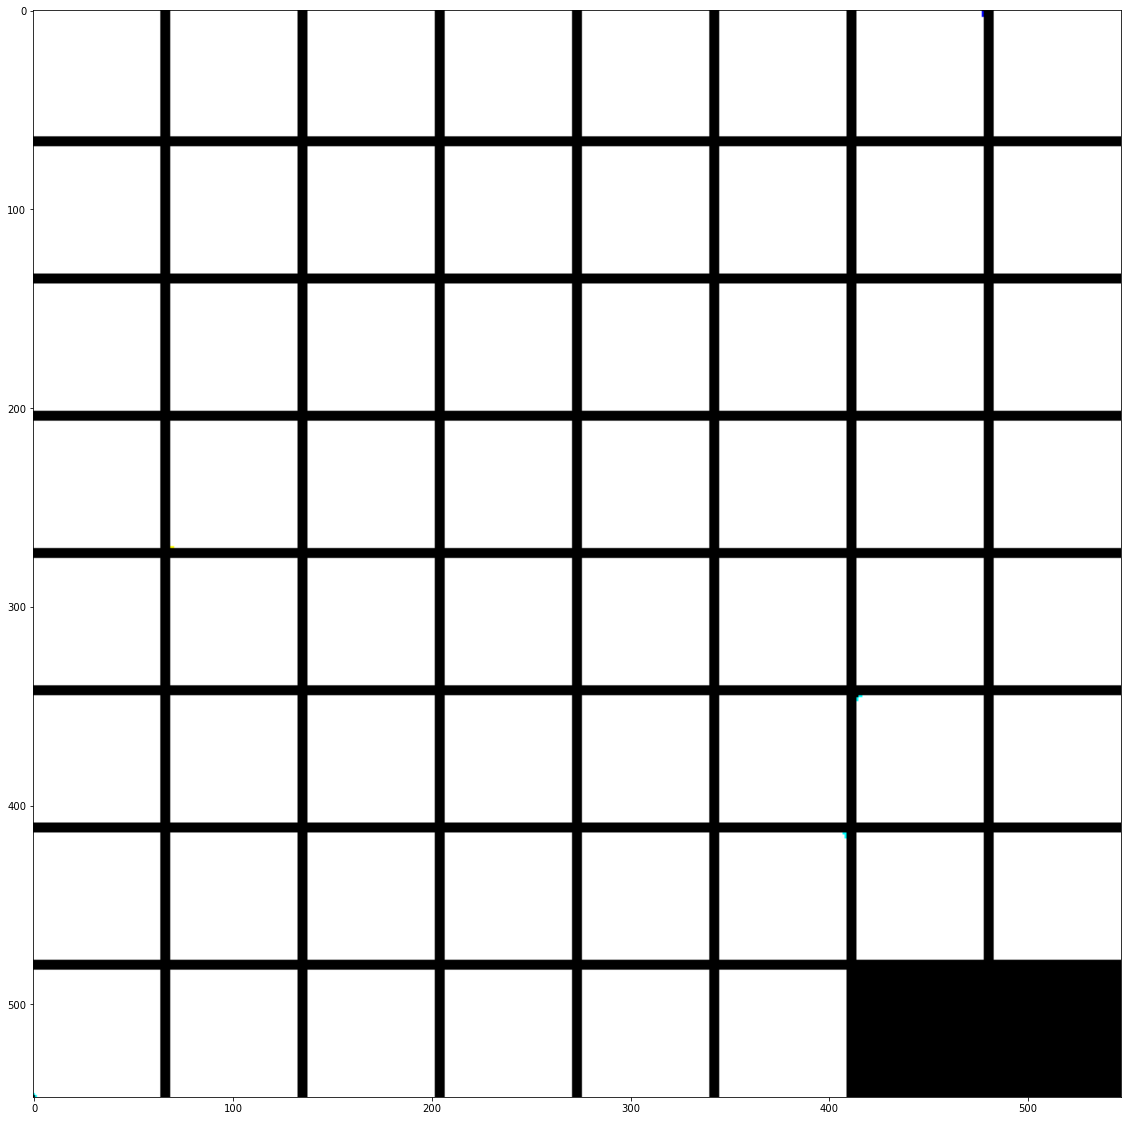

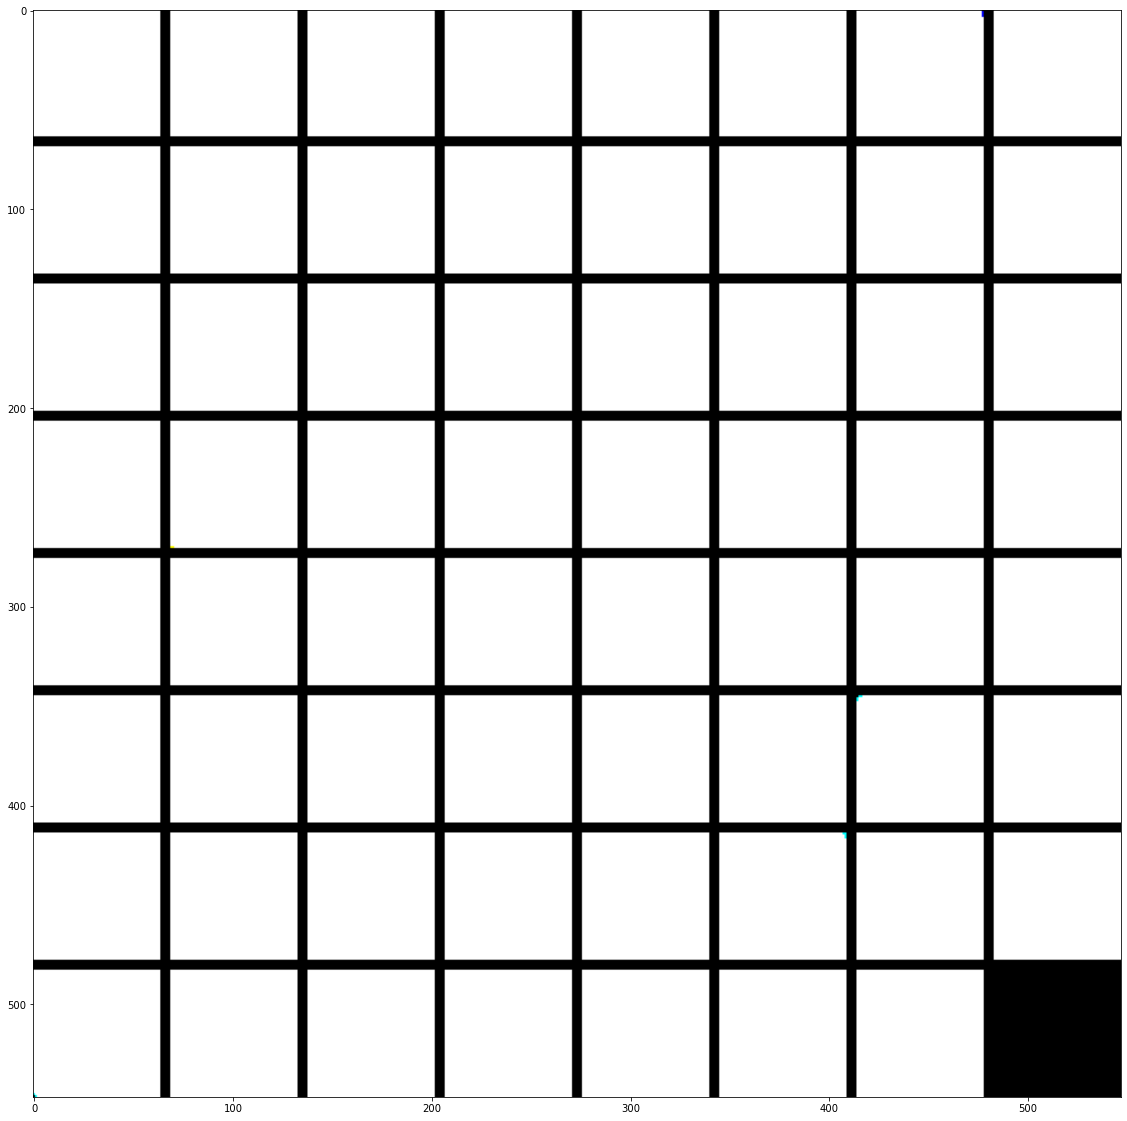

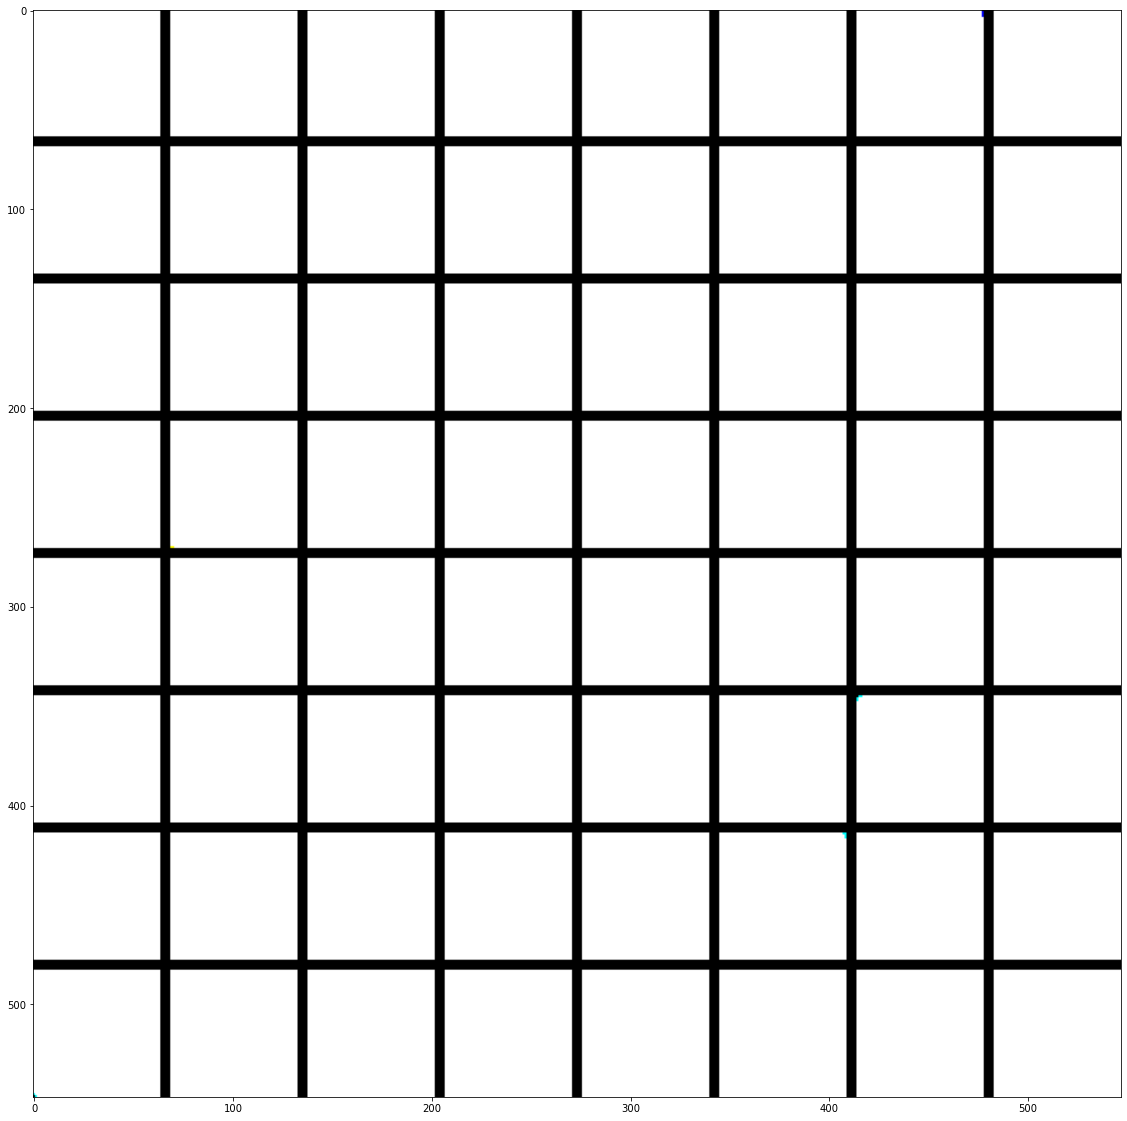

In [114]:
# -------------------------------------------------------------
# GENERATING A GRID OF ALL FILTER RESPONSE PATTERNS IN A LAYER |
# -------------------------------------------------------------

layer_name = 'block1_conv1'
size = 64
margin = 5

# Empty (black) image to store results
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):  # Iterate over the rows of the results grid
    for j in range(8):  # iterates over the columns of the results grid
        # Generates the pattern for filter i+(j*8) in layer_name
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
        
        # Displays the results grid
        plt.figure(figsize=(20, 20))
        plt.imshow(results)